In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
import transformers
import bitsandbytes as bnb
import networkx as nx

random_state = 1

In [2]:
def euclid(list1, list2):
    return sum((p-q)**2 for p, q in zip(list1, list2)) ** .5

In [4]:
with open('df_annotations_embeddings.pkl', 'rb') as f:
    df = pickle.load(f)
df

Document  Split  Name   Id  \
0     A2008_Commission of the European Communities v...      1  prem   A1   
1     A2008_Commission of the European Communities v...      1  prem   A2   
2     A2008_Commission of the European Communities v...      1  prem   A3   
3     A2008_Commission of the European Communities v...      1  prem   A4   
4     A2008_Commission of the European Communities v...      1  prem   A5   
...                                                 ...    ...   ...  ...   
2530                            R2021_World Duty Free v      5  prem   H7   
2531                            R2021_World Duty Free v      5  prem   H8   
2532                            R2021_World Duty Free v      5  prem   H9   
2533                            R2021_World Duty Free v      5  prem  H10   
2534                            R2021_World Duty Free v      5  conc  H11   

                                                   Text Type  \
0     must held first Article 4c CS prohibits granti...    L   
1     Also clear consistent caselaw Articles 4 CS 67...    L   
2     Court deduces Article 67 CS covers general mea...    L   
3     Court also held action taken Article 67 CS can...    L   
4     Court held particular inconceivable authors EC...    L   
...                                                 ...  ...   
2530  question matter dialogue Spanish authorities C...    F   
2531  present case action first instance WDFG compla...    F   
2532  regard General Court recalled paragraph 212 ju...    F   
2533  General Court err law concluding therefrom par...    F   
2534  Consequently sixth part WDFG’s single ground a...  NaN   

                  Scheme                                         embeddings  
0                   Rule  [-0.01507568359375, -1.73828125, 1.4287109375,...  
1     [Itpr, Prec, Rule]  [0.93017578125, -1.0146484375, 0.0575256347656...  
2           [Prec, Rule]  [0.195556640625, -1.734375, -0.1546630859375, ...  
3           [Prec, Rule]  [0.404296875, -0.2352294921875, 0.34326171875,...  
4     [Itpr, Prec, Rule]  [1.0849609375, -0.98828125, 0.39453125, 0.8774...  
...                  ...                                                ...  
2530                 NaN  [2.109375, -1.3642578125, -0.62744140625, 2.50...  
2531                 NaN  [0.880859375, -0.65966796875, -0.67626953125, ...  
2532                 NaN  [2.0234375, -1.150390625, -0.70947265625, 1.59...  
2533                 NaN  [1.6494140625, -1.5732421875, -0.857421875, 1....  
2534                 NaN  [0.853515625, -0.2034912109375, 0.038696289062...  

[2535 rows x 8 columns]

In [5]:
df_train = df[df['Split'] != 2]
df_train = df_train.dropna(subset = ['Scheme'])
df_train

Document  Split  Name     Id  \
0     A2008_Commission of the European Communities v...      1  prem     A1   
1     A2008_Commission of the European Communities v...      1  prem     A2   
2     A2008_Commission of the European Communities v...      1  prem     A3   
3     A2008_Commission of the European Communities v...      1  prem     A4   
4     A2008_Commission of the European Communities v...      1  prem     A5   
...                                                 ...    ...   ...    ...   
2520                            R2021_World Duty Free v      5  prem     G4   
2521                            R2021_World Duty Free v      5  prem     G5   
2526                            R2021_World Duty Free v      5  prem     H4   
2528                            R2021_World Duty Free v      5  prem     H6   
2529                            R2021_World Duty Free v      5  prem  H6bis   

                                                   Text    Type  \
0     must held first Article 4c CS prohibits granti...       L   
1     Also clear consistent caselaw Articles 4 CS 67...       L   
2     Court deduces Article 67 CS covers general mea...       L   
3     Court also held action taken Article 67 CS can...       L   
4     Court held particular inconceivable authors EC...       L   
...                                                 ...     ...   
2520  accordance settled caselaw appeal plea directe...       L   
2521  present case even fifth part single ground app...       L   
2526  pointed paragraph 146 appeal plea directed gro...  [F, L]   
2528  regard true decision adopts end examination Co...       L   
2529  hand General Court rightly pointed paragraph 2...       L   

                  Scheme                                         embeddings  
0                   Rule  [-0.01507568359375, -1.73828125, 1.4287109375,...  
1     [Itpr, Prec, Rule]  [0.93017578125, -1.0146484375, 0.0575256347656...  
2           [Prec, Rule]  [0.195556640625, -1.734375, -0.1546630859375, ...  
3           [Prec, Rule]  [0.404296875, -0.2352294921875, 0.34326171875,...  
4     [Itpr, Prec, Rule]  [1.0849609375, -0.98828125, 0.39453125, 0.8774...  
...                  ...                                                ...  
2520                Prec  [0.5693359375, -1.30078125, 0.0073127746582031...  
2521                Prec  [0.484130859375, -0.362548828125, -0.387695312...  
2526                Itpr  [0.34423828125, -0.83349609375, -0.04077148437...  
2528               Princ  [1.3798828125, -0.8056640625, 0.01039886474609...  
2529                Itpr  [1.4169921875, -1.34765625, -0.240234375, 1.42...  

[779 rows x 8 columns]

In [6]:
df_test = df[df['Split'] == 2]
df_test = df_test.dropna(subset = ['Scheme'])
df_test


Document  Split  Name   Id  \
172   A2010_NDSHT Nya Destination Stockholm Hotell &...      2  prem   A2   
177   A2010_NDSHT Nya Destination Stockholm Hotell &...      2  prem   B2   
178   A2010_NDSHT Nya Destination Stockholm Hotell &...      2  prem   B3   
179   A2010_NDSHT Nya Destination Stockholm Hotell &...      2  prem   B4   
180   A2010_NDSHT Nya Destination Stockholm Hotell &...      2  prem   B5   
...                                                 ...    ...   ...  ...   
2123       R2017_European Commission v Frucona Košice a      2  prem  D13   
2124       R2017_European Commission v Frucona Košice a      2  prem  D14   
2126       R2017_European Commission v Frucona Košice a      2  prem  D16   
2130       R2017_European Commission v Frucona Košice a      2  prem  D20   
2135       R2017_European Commission v Frucona Košice a      2  prem  D25   

                                                   Text    Type        Scheme  \
172   regard must observed follows Article 58 Statut...       L  [Prec, Rule]   
177   regard Court repeatedly held action annulment ...       L  [Prec, Rule]   
178   follows also settled caselaw concerning admiss...       L          Prec   
179   contrast form act decision adopted principle i...       L          Itpr   
180   therefore principle irrelevant classification ...       L          Itpr   
...                                                 ...     ...           ...   
2123  connection also borne mind lawfulness decision...       L          Prec   
2124  However information ‘available’ Commission inc...       L  [Itpr, Prec]   
2126  Paragraphs 180 213 235 judgment appeal Commiss...       F          Itpr   
2130  Advocate General noted paragraphs 125 131 Opin...       F           Aut   
2135  considerations far concern information normall...  [F, L]          Prec   

                                             embeddings  
172   [0.5068359375, -1.6494140625, -0.43408203125, ...  
177   [1.076171875, -0.91064453125, -0.53271484375, ...  
178   [0.90185546875, -1.087890625, -0.5048828125, 1...  
179   [0.92431640625, -0.471435546875, -0.3063964843...  
180   [0.7216796875, -0.82373046875, 0.39501953125, ...  
...                                                 ...  
2123  [0.83251953125, -0.8701171875, -0.16796875, 1....  
2124  [1.4931640625, -1.1728515625, -0.70751953125, ...  
2126  [0.55419921875, -1.5498046875, -0.5234375, 1.4...  
2130  [1.2119140625, -1.08984375, 0.0924072265625, -...  
2135  [0.62255859375, -1.1865234375, -0.74951171875,...  

[129 rows x 8 columns]

In [7]:
device = torch.device('cuda')
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

In [8]:
pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16,
                  "quantization_config": {"load_in_4bit": True}},
    device_map="cuda:0"
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Device set to use cuda:0


In [8]:
Training_graph = pickle.load(open('R15_task3.pickle', 'rb'))


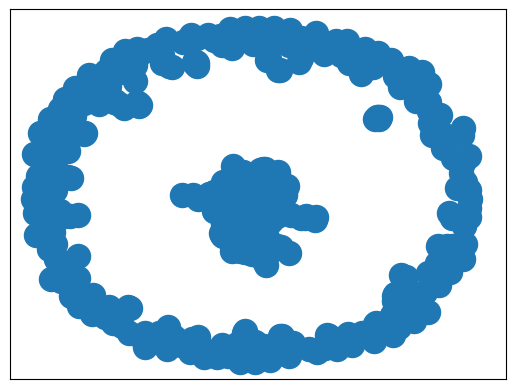

In [9]:
nx.draw_networkx(Training_graph, with_labels = False)

In [10]:
average_deg = sum([Training_graph.degree[i] for i in Training_graph])/len(Training_graph)
average_deg

15.029525032092426

In [11]:
def test(template, nexamples):

    count = 0
    autTP = 0
    autFN = 0
    autFP = 0
    classTP = 0
    classFN = 0
    classFP = 0
    itprTP = 0
    itprFN = 0
    itprFP = 0
    precTP = 0
    precFN = 0
    precFP = 0
    #princTP = 0
    #princFN = 0
    #princFP = 0
    ruleTP = 0
    ruleFN = 0
    ruleFP = 0
    

    for i in range(len(df_test)):

        subgraph_radius = 41.78              #SET MANUALLY

        query = 'Text: '+ df_test.iloc[i]['Text']+'\n'+'Answer: '

        test_graph = Training_graph.copy()      

        for j in range(len(df_train)):
            if euclid(df_train.iloc[j]['embeddings'], df_test.iloc[i]['embeddings']) > subgraph_radius:
                test_graph.remove_node(j)


        while(len(test_graph) < nexamples):     #If the subgraph doesn't have enough nodes, increment the radius
            subgraph_radius *= 1.1
            test_graph = Training_graph.copy()
            for j in range(len(df_train)):
                if euclid(df_train.iloc[j]['embeddings'], df_test.iloc[i]['embeddings']) > subgraph_radius:
                    test_graph.remove_node(j)
            #print(subgraph_radius)

        
        selected_nodes = []
        communities = nx.community.louvain_communities(test_graph, seed = random_state)
        sorted_communities = sorted(communities, key = lambda x: len(x), reverse = True)
        #print(sorted_communities)
        #print(len(sorted_communities))

        if len(sorted_communities) >= nexamples:    #If there are enough communities:
            for l in range(nexamples):
                subgraph = test_graph.subgraph(sorted_communities[l])
                selected_nodes.append(sorted(nx.pagerank(subgraph).items(), key=lambda kv: kv[1], reverse = True )[0][0])
                #print(sorted(nx.pagerank(subgraph).items(), key=lambda kv: kv[1], reverse = True ))
        else:                                       #If there are less communities than nodes to choose:
            numberofelements = 2
            while len(selected_nodes) < nexamples:
                selected_nodes = []
                for element in sorted_communities:
                    subgraph = test_graph.subgraph(element)
                    selected_nodes += [foo[0] for foo in sorted(nx.pagerank(subgraph).items(), key=lambda kv: kv[1], reverse = True )][:numberofelements]
                    numberofelements += 1
            #print(sorted(nx.pagerank(subgraph).items(), key=lambda kv: kv[1], reverse = True ))
        
        selected_nodes = selected_nodes[:nexamples]     #The final chosen demonstrations
        #print('Selected Nodes:', selected_nodes)
        
        text_examples = ''      #Building text examples

        for el in selected_nodes:
            text_examples += 'Text: '+ df_train.iloc[el]['Text'] + '\n'
            text_examples += 'Answer: '+ str(df_train.iloc[el]['Scheme'])+'\n\n'
        
        print('query:\n'+ query,'\n')
        print('retrieved examples:\n\n'+ text_examples,'\n\n')

        messages = [{'role': 'system', 'content': template},{"role": "user", "content": text_examples},{"role": "user", "content": query}]

        outputs = pipeline(
            messages,
            max_new_tokens=10,
            do_sample = False
        )
        final_output = outputs[0]['generated_text'][-1]['content']
        print('LLM output:', final_output)
        print('ground truth:', df_test.iloc[i]['Scheme'])
        print(200*'-')

        if 'Aut' in final_output and 'Aut' in df_test.iloc[i]['Scheme']:
            autTP += 1
        if 'Aut' in final_output and 'Aut' not in df_test.iloc[i]['Scheme']:
            autFP += 1
        if 'Aut' not in final_output and 'Aut' in df_test.iloc[i]['Scheme']:
            autFN += 1
        
        if 'Class' in final_output and 'Class' in df_test.iloc[i]['Scheme']:
            classTP += 1
        if 'Class' in final_output and 'Class' not in df_test.iloc[i]['Scheme']:
            classFP += 1
        if 'Class' not in final_output and 'Class' in df_test.iloc[i]['Scheme']:
            classFN += 1

        if 'Itpr' in final_output and 'Itpr' in df_test.iloc[i]['Scheme']:
            itprTP += 1
        if 'Itpr' in final_output and 'Itpr' not in df_test.iloc[i]['Scheme']:
            itprFP += 1
        if 'Itpr' not in final_output and 'Itpr' in df_test.iloc[i]['Scheme']:
            itprFN += 1

        if 'Prec' in final_output and 'Prec' in df_test.iloc[i]['Scheme']:
            precTP += 1
        if 'Prec' in final_output and 'Prec' not in df_test.iloc[i]['Scheme']:
            precFP += 1
        if 'Prec' not in final_output and 'Prec' in df_test.iloc[i]['Scheme']:
            precFN += 1

        if 'Rule' in final_output and 'Rule' in df_test.iloc[i]['Scheme']:
            ruleTP += 1
        if 'Rule' in final_output and 'Rule' not in df_test.iloc[i]['Scheme']:
            ruleFP += 1
        if 'Rule' not in final_output and 'Rule' in df_test.iloc[i]['Scheme']:
            ruleFN += 1

    if autTP == 0:
        autF1 = 0
    else:
        autPREC = autTP/(autTP+autFP)
        autREC = autTP/(autTP+autFN)
        autF1 = 2/((1/autPREC)+(1/autREC))

    if classTP == 0:
        classF1 = 0
    else:
        classPREC = classTP/(classTP+classFP)
        classREC = classTP/(classTP+classFN)
        classF1 = 2/((1/classPREC)+(1/classREC))

    if itprTP == 0:
        itprF1 = 0
    else:
        itprPREC = itprTP/(itprTP+itprFP)
        itprREC = itprTP/(itprTP+itprFN)
        itprF1 = 2/((1/itprPREC)+(1/itprREC))

    if precTP == 0:
        precF1 = 0
    else:
        precPREC = precTP/(precTP+precFP)
        precREC = precTP/(precTP+precFN)
        precF1 = 2/((1/precPREC)+(1/precREC))

    if ruleTP == 0:
        ruleF1 = 0
    else:
        rulePREC = ruleTP/(ruleTP+ruleFP)
        ruleREC = ruleTP/(ruleTP+ruleFN)
        ruleF1 = 2/((1/rulePREC)+(1/ruleREC))

    print('Authoritative F1:', autF1)
    print('Verbal Classification F1:', classF1)
    print('Interpretation F1:', itprF1)
    print('Precedent F1:', precF1)
    print('Rule F1:', ruleF1)
    print()


    print('macro F1:', (autF1 + classF1 + itprF1 + precF1 + ruleF1)/5)
    print('macro F1 (reliable):', (autF1 + precF1 + ruleF1)/3)
            


In [12]:
template = '''Classify the following legal premise as one or more of the following argumentative schemes: Rule, Prec, Class, Itpr, Princ. Rule: whether there is an explicit or implicit reference to an article of law or citation of the text of a certain article. Prec: whether there is a reference to a previous ruling of the Supreme Court or the Court of Justice of the European Union. Class: if there is a definition of a legal concept or its constituent elements. Itpr: if there is reference to one of the interpretative criteria contained in Article 12 of the prelegislations (literal, teleological, psychological, systematic) to the Civil Code. Princ: if there is a reference to a general principle of law (e.g. principle of proportionality). The expected output is a list with all applicable labels. For example: ['Prec', 'Princ', 'Rule']. Only reply with the list of labels.'''

In [29]:
test(template, 5)

C:\Users\alfio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\alfio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard must observed follows Article 58 Statute Court Justice conjunction Article 1132 Rules Procedure Court Justice appeal appellant may put forward relevant argument provided subjectmatter proceedings General Court changed appeal Case C‑22905 P PKK KNK v Council 2007 ECR I‑439 paragraph 66 Case C‑806 P Herrero Romeu v Commission 2007 ECR I‑10333 paragraph 32
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard Court repeatedly held action annulment purposes Article 230 EC must available acts adopted institutions whatever nature form intended legal effects capable affecting interests applicant bringing distinct change legal position see inter alia Athinaïki Techniki v Commission paragraph 29 caselaw cited Case C‑36208 P Internationaler Hilfsfonds v Commission 2010 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part show

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows also settled caselaw concerning admissibility actions annulment necessary look actual substance acts challenged order classify see particular Case 6081 IBM v Commission 1981 ECR 2639 paragraph 9 Case C‑14796 Netherlands v Commission 2000 ECR I‑4723 paragraph 27
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 D

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrast form act decision adopted principle irrelevant right challenge acts decisions way action annulment
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also gene

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore principle irrelevant classification act question whether satisfies certain formal requirements namely particular duly identified author mentions provisions providing legal basis
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: Lastly rules must make r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore irrelevant act may described ‘decision’ refer Article 42 3 4 Regulation 6591999
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition judgment 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 54 caselaw cited
Answer: Prec

Text: Article 45 thereof provides applied appropriate account taken time obj

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also importance Member State concerned notified act issue Commission infringing Article 25 regulation error capable altering substance act see Athinaïki Techniki v Commission paragraphs 43 44 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore principle measures definitively determine position Commission upon conclusion administrative procedure intended legal effects capable affecting interests complainant constitute acts open challenge purposes Article 230 EC intermediate measures whose purpose prepare final decision effects see Athinaïki Techniki v Commission paragraph 42 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard possible definitive actionable nature measures taken Commission procedure reviewing State aid noted first Commission must Article 101 Regulation 6591999 carry examination possession information whatever source regarding allegedly unlawful aid
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons meas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination complaint basis provision gives rise initiation preliminary examination stage Article 883 EC obliges Commission examine immediately possible existence aid compatibility common market see effect Athinaïki Techniki v Commission paragraph 37
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 131 Regulation 6591999 applicable context examination complaint alleging unlawful aid obliges Commission close preliminary examination stage adopting decision pursuant Article 42 3 4 regulation say decision finding aid exist raising objections initiating formal investigation procedure since institution authorised persist failure act preliminary examination stage
Answer:  

retrieved examples:

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without suggesting Commission alternative methods implementing decision would allow difficulties overcome see effect judgments 13 November 2008 Commission v France C‑21407 EUC2008619 paragraph 50 12 February 2015 Commission v France C‑3714 published EUC201590 paragr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: stage procedure completed Commission bound consequently either initiate next stage procedure provided Article 882 EC adopt definitive decision rejecting complaint see effect Athinaïki Techniki v Commission paragraph 40 caselaw cited
Answer:  

retrieved examples:

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Gener

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission finds following examination complaint investigation revealed grounds concluding State aid within meaning Article 87 EC refuses implication initiate procedure provided Article 882 EC see effect Case C‑36795 P Commission v Sytraval Brink’s France 1998 ECR I‑1719 paragraph 47
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 P Comitato ‘Venezia vuole vivere’ Others v Commission 2011 ECR I4727 paragraph 94 caselaw cited
Answer: ['Prec', 'Rule']

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted pro

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards Commission’s finding measures complained constituted existing aid noted existing aid course subject constant review provided Article 881 EC must regarded lawful long Commission found incompatible common market see Case C‑4493 NamurLes assurances du crédit 1994 ECR I‑3829 paragraph 34 Case C‑40099 Italy v Commission 2001 ECR I‑7303 paragraph 48
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However receives complaint relating allegedly unlawful aid Commission classifying measure existing aid subjects procedure provided Article 881 EC thus refuses implication initiate procedure provided Article 882 EC see effect CIRFS Others v Commission paragraphs 25 26 Case C‑32199 P ARAP Others v Commission 2002 ECR I‑4287 paragraph 61
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely ef

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: decision refusing initiate procedure provided Article 882 EC definitive cannot characterised mere provisional measure CIRFS Others v Commission paragraph 26 effect Athinaïki Techniki v Commission paragraphs 54 58
Answer:  

retrieved examples:

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: situation persons intended benefit procedural guarantees afforded provision may secure compliance therewith able challenge decision question European Union judicature fourth paragraph Article 230 EC
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: principle applies equally whether ground decision taken Commission regards aid compatible common market view existence aid must discounted Commission v Sytraval Brink’s France paragraph 47 considers existing aid see effect CIRFS Others v Commission paragraph 27 ARAP Others v Commission paragraph 62
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: finding corroborated Article 20 Regulation 6591999 governs rights interested parties
Answer:  

retrieved examples:

Text: Fourth must distort threaten distort competition see inter alia judgment 16 July 2015 BVVG C‑3914 EUC2015470 paragraph 24
Answer: ['Class', 'Prec']

Text: apparent Court’s caselaw cited paragraphs 89 90 recovery unlawful aid different purpose Directive 2014104
Answer: ['Prec', 'Rule']

Text: finding follows examination wording context aim Article 1c Regulation 6591999
Answer: ['Itpr', 'Rule']

Text: examination carried time Article 931 Treaty particularly event complaints Commission may receive
Answer: Rule

Text: apparent Article 152 regulation limitation period begin run day unlawful aid awarded beneficiary
Answer: Rule

 


LLM output: ['Itpr', 'Rule']
ground truth: Rule
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According second third sentences Article 202 thereof obtaining interested party information concerning alleged unlawful aid alleged misuse aid Commission either consider insufficient grounds taking view case inform interested party thereof take decision case concerning subjectmatter information supplied
Answer:  

retrieved examples:

Text: follows aid granted ECSC Treaty without notified delay Commission exercising supervisory powers ordering recovery aid render recovery decision unlawful except exceptional cases show Commission manifestly failed act clearly breached duty diligence
Answer: ['Itpr', 'Rule']

Text: Consequently Council decision authorising Member State accordance Article 84 Directive 9281 introduce exemption excise duties could effect preventing Commission exercising powers conferred Treaty consequently setting motion procedure laid Article 88 EC order review whether exemption constituted State aid conclusion procedure appropriate adopt decision contested d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows Commission examined information taken position takes decision
Answer:  

retrieved examples:

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: examination carried time Article 931 Treaty particularly event complaints Commission may receive
Answer: Rule

Text: second place contrary Commission’s contentions measure benefits one economic sector undertakings sector necessarily selective
Answer: Itpr

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: Secondly also apparent caselaw examination selectivity must carried within context ‘a particular legal regime
Answer: Prec

 


LLM output: ['Rule', 'Itpr']
ground truth: Itpr
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Therefore action annulment decision initiate procedure pursuant Article 882 EC brought party concerned within meaning article must considered admissible party seeks thereby safeguard procedural rights available latter provision see Athinaïki Techniki v Commission paragraph 36 caselaw cited
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appellant undertaking competition company benefiting measures complained without doubt interested party purposes Article 882 EC see Commission v Sytraval Brink’s France paragraph 41 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 32 regard definition term Article 1h Regulation 6591999
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem do

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances Commission’s complaint reference notice relating State aid field taxation ineffective see effect Case C18299 P Salzgitter v Commission 2003 ECR I10761 paragraphs 54 55 unnecessary consider content scope notice stage
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade concei

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw definition aid general subsidy given includes positive benefits subsidies also State measures various forms mitigate charges normally included budget undertaking thus without subsidies strict sense word similar character effect see Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 38 Joined Cases C‑7808 C8008 Paint Graphos Others 2011 ECR I‑0000 paragraph 45 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceed

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Consequently measure public authorities grant certain undertakings favourable tax treatment although involving transfer State resources places recipients favourable financial position taxpayers amounts State aid within meaning Article 871 EC see Case C38792 Banco Exterior de España 1994 ECR I877 paragraph 14 Paint Graphos Others paragraph 46 caselaw cited
Answer:  

retrieved examples:

Text: Furthermore tax specifically intended finance aid proves contrary provisions Treaty Commission cannot declare aid scheme charge forms part compatible internal market see effect judgment 21 October 2003 van Calster Others C‑26101 C‑26201 EUC2003571 paragraphs 47 48 caselaw cited
Answer: ['Prec', 'Rule']

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC199750

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: hand advantages resulting general measure applicable without distinction economic operators constitute State aid within meaning Article 87 EC see effect Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 22 Joined Cases C‑39304 C‑4105 Air Liquide Industries Belgium 2006 ECR I‑5293 paragraph 32 caselaw cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore necessary determine whether proposed tax reform selective selectivity constituent factor concept State aid see Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 54
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards appraisal condition selectivity clear settled caselaw Article 871 EC requires assessment whether particular legal regime national measure favour ‘certain undertakings production certain goods’ comparison others light objective pursued regime comparable factual legal situation AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 41 Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 82 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: measure issue conceived aid scheme individual aid Commission establish measure althou

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: noted paragraph 73 selective advantages advantages resulting general measure applicable without distinction economic operators fall within concept State aid
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: hand appears measure clearly severable general system cannot ruled reference framework taken account may limited ge

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First appropriate recall Court consistently held Article 871 EC distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see British Aggregates v Commission paragraphs 85 89 caselaw cited Case C‑27908 P Commission v Netherlands 2011 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court admittedly held paragraph 56 Portugal v Commission determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appea

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However contrary General Court’s reasoning proposition put forward Government Gibraltar United Kingdom caselaw make classification tax system ‘selective’ conditional upon system designed way undertakings might enjoy selective advantage general liable tax burden undertakings benefit derogating provisions selective advantage may identified difference normal tax burden borne former undertakings
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: interpretation selectivity criterion would require contrary caselaw cited paragraph 87 order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgment 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 60
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertakin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence would national tax rules fall outset outside scope control State aid merely adopted different regulatory technique although produce effects law andor fact
Answer:  

retrieved examples:

Text: must observed outset Advocate General stated point 47 Opinion requirement selectivity Article 1071 TFEU must clearly distinguished concomitant detection economic advantage Commission identified advantage understood broad sense arising directly indirectly particular measure also required establish advantage specifically benefits one undertakings
Answer: ['Aut', 'Class', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: true absence European Union rules governing matter falls within competence Member States infra‑State bodies fiscal autonomy designate bases assessment spread tax burden across different factors production economic sectors General Court held paragraph 146 judgment appeal
Answer:  

retrieved examples:

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demonstrate tax measure issue derogation ordinary system far differentiates operators light objective pursued ordinary tax system comparable factual legal situation see effect inter alia judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 57 caselaw cited
Answer: ['Class', 'Prec']

Text: regards second condition set Article 230 EC borne mind fact disputed provision nature scope provision general application inasmuch applies traders concerned general preve

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly according caselaw cited paragraph 73 different tax burden resulting application ‘general’ tax regime sufficient establish selectivity taxation purposes Article 871 EC
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus criteria forming basis assessment adopted tax system must also order capable recognised conferring selective advantages characterise recipient undertakings virtue properties specific privileged category thus permitting regime described favouring ‘certain’ undertakings production ‘certain’ goods within meaning Article 871 EC
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: regards particular national measures confer tax advantage mus

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent judgment appeal documents included file appellants submitted General Court contrary Commission stated point 97 grounds contested decision normal tax rules company profits could used valid basis comparison thus reference framework assessment selectivity tax scheme issue
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards condition relating

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Even case tax scheme issue confer economic advantage general realignment scheme
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: regard clear Court’s caselaw necessary financial balance economic viability undertaking entrusted operation service general economic interest threatened
Answer: Prec

Text: Similarly basis obliged engage new tariff negotiations supplier sign new agreement order put effect Commission’s decision
Answer: Prec

Text: Since provision established broad terms capable covering alteration also aid concerned alteration
Answer: Itpr

 


LLM output: ['Prec', 'Class']
ground truth: Itpr
---------------------------------------------------------------------------------------------------------------

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court Justice stated determination reference framework purpose determining whether measure selective particular importance case tax measures since existence advantage may established compared “normal” taxation Case C8803 Portugal v Commission 2006 ECR I7115 paragraph 56 say taxation normally applicable undertakings light objective pursued scheme question factual legal situation comparable undertakings benefiting scheme Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 41
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Com

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Commission examining scheme light rules State aid envisage subjective choices might made beneficiaries scheme absence scheme examine scheme order determine whether entails objective standpoint economic advantage reference tax provisions derogates would normally applicable absence scheme see effect Case C14804 Unicredito Italiano 2005 ECR I11137 paragraph 118
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According Court’s caselaw however State aid defined Treaty Functioning European Union legal concept must interpreted basis objective factors
Answer:  

retrieved examples:

Text: contrary settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 87 caselaw cited
Answer: Prec

Text: regards second limb fourth paragraph Article 263 TFEU Court repeatedly held field State aid decisions Commission authorising prohibiting national scheme general application
Answer: ['Prec', 'Rule']

Text: First must recalled according Court’s settled caselaw classification national measure ‘State aid’ within meaning Article 1071 TFEU requires following conditions fulfilled
Answer: ['Class', 'Prec', 'Rule']

Text: Advocate General observed points 40 41 Opinion concept ‘regulatory 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reason European Union judicature must principle regard specific features case technical complex nature Commission’s assessments carry comprehensive review whether measure falls within scope Article 1071 TFEU see inter alia Case C8398 P France v Ladbroke Racing Commission 2000 ECR I3271 paragraph 25 Case C48706 P British Aggregates v Commission 2008 ECR I10515 paragraph 111
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdic

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover according equally wellestablished caselawthe concept State aid refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature general scheme system form part see effect inter alia AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 42 Portugal v Commission paragraph 52 British Aggregates v Commission paragraph 83 Joined Cases C10609 P C10709 P Commission Spain v Government Gibraltar United Kingdom 2011 ECR I11113 paragraph 145
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent considerations carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation undertakings arising scheme due nature general scheme tax system formed part
Answer:  

retrieved examples:

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54 caselaw cited
Answer: ['Class', 'Prec']

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicabi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly Court Justice held judicial review limited regard whether measure comes within scope Article 1071 TFEU case appraisals Commission technical complex nature see inter alia France v Ladbroke Racing Commission paragraph 25 British Aggregates v Commission paragraph 114
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circums

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance rightly observed measure vitiated misuse powers appears basis objective relevant consistent evidence taken exclusive main purpose achieving end stated see inter alia Case C‑11097 Netherlands v Council 2001 ECR I‑8763 paragraph 137 cases cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Ag

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance undertook assessment facts unless clear sense evidence produced distorted constitute question law subject review Court Justice see inter alia Joined Cases C‑28099 P C‑28299 P Moccia Irme Others v Commission 2001 ECR I‑4717 paragraph 78 Joined Cases C‑23899 P C‑24499 P C‑24599 P C‑24799 P C‑25099 P C‑25299 P C‑25499 P Limburgse Vinyl Maatschappij Others v Commission 2002 ECR I‑8375 paragraph 285
Answer:  

retrieved examples:

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmineraria Others v Commission 1993 ECR I‑6357 paragraph 14 Joined Cases C‑1598 C‑10599 Italy Sardegna Lines v Commission 2000 ECR I‑8855 paragraph 33
Answer: Prec

Text: requirement satisfied plea complains General Court reached certain conclusion

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: must borne mind allow party put forward first time Court Justice plea law raised Court First Instance would allow bring Court whose jurisdiction appeals limited case wider ambit came Court First Instance
Answer:  

retrieved examples:

Text: Lastly regards argument General Court failed regard obligation state reasons relation principle limitation settled caselaw court thereby required provide account follows exhaustively point point reasoning articulated parties case
Answer: Prec

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: party entitled put forward pleas arguments arising judgment appeal seek criticise law correctness
Answer: Itpr

Text: party entitled put forward pleas argument

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appeal Court’s jurisdiction confined review findings law pleas argued Court First Instance see particular Case C13692 P Commission v Brazzelli Lualdi Others 1994 ECR I1981 paragraph 59 Case C‑795 P John Deere v Commission 1998 ECR I‑3111 paragraph 62 Case C‑21701 P Hendrickx v Cedefop 2003 ECR I‑3701 paragraph 37
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: According judgment applicant individually concerned decision addressed another person decision affects reason certain attributes peculiar reason circumstances differentiated persons see also field State aid judgments 19 October 2000 Italy Sardegna Lines v Commission C‑1598 C‑10599 EUC2000570 paragra

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: respect borne mind pursuant Article 58 Statute Court Justice appeal Court Justice limited points law lie grounds particular infringement Community law Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement re

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General states point 20 Opinion Commission’s appeal based precisely upon allegation Court First Instance infringed Community law failing follow apply interpretation Articles 87 EC 253 EC laid caselaw Court Justice
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Regarding Wam’s argument Commission’s appeal invites Court Justice first review substance judgment appeal rather limited review ‘essential procedural requirement’ laid Article 230 EC second carry review substance Court Justice jurisdiction appeal stage noted Article 230 EC gives Court Justice jurisdiction review acts Community institutions Court First Instance
Answer:  

retrieved examples:

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicable General Court virtue first paragraph Article 53 Statute Article 117 Rules Procedure General Court order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 27
Answer: ['

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Appeals judgments Court First Instance governed however terms Article 2251 EC Statute Court Justice
Answer:  

retrieved examples:

Text: Court Justice General Court cannot therefore circumstances substitute reasoning author contested act judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 4 June 2020 Hungary v Commission C‑45618 P EUC2020421 paragraph 70 caselaw cited
Answer: Prec

Text: must recalled case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents case file judgment 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 20 caselaw cited
Answer: Prec

Text: present case Court First Instance held paragraph 94 judgment appeal clear Article 2 contested decision Netherlands Authorities obliged without discretion whatsoever matter reject pending request first GFA authorisation undertakings beneficiaries GFA

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next must noted obligation provide statement reasons essential procedural requirement must distinguished question whether reasoning well founded latter concerned substantive legality measure issue see effect Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 48
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Comm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw statement reasons required Article 253 EC must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable Court carry review
Answer:  

retrieved examples:

Text: General Court recalled paragraph 185 judgment appeal according settled caselaw statement reasons required Article 296 TFEU must appropriate act issue must disclose clear unequivocal fashion reasoning followed institution adopted measure question way enable persons concerned ascertain reasons measure enable Court European Union exercise power review
Answer: ['Prec', 'Rule']

Text: settled caselaw statement reasons required Article 296 TFEU must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable competent Court European Union exercise jurisdiction review legality judgme

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 253 EC must assessed regard wording also context legal rules governing matter question Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 88 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Co

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: hand application authorisation system competent authorities latitude limited objective criteria unrelated tax system established legislation question could principle regarded selective see effect judgment 18 July 2013 P C‑612 EUC2013525 paragraphs 26 27
Answer: Prec

Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 1071 TFEU
A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard even cases apparent circumstances granted aid liable affect trade Member States distort threaten distort competition Commission must least set circumstances statement reasons decision see Portugal v Commission paragraph 89 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards condition r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: context noted also according settled caselaw purpose categorising national measure State aid necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition Case C22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraph 140 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard specifically condition trade Member States affected follows caselaw grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently meeting condition taxable persons perform economic activity field trade conceivable competition operators established Member States see Portugal v Commission paragraph 91 Case C‑17203 Heiser 2005 ECR I‑1627 paragraph 35
Answer:  

retrieved examples:

Text: borne mind first view mandatory nature review State aid Commission Article 93 Treaty undertakings aid granted may principle entertain legitimate expectation aid lawful unless granted compliance procedure laid article second diligent businessman normally able determine whether procedure followed Case C589 Commission v Germany 1990 ECR I3437 paragraph 14 Case C16995 Spain v Commission 1997 ECR I135 paragraph 51 Case C2495 Alcan Deutschland 1997 ECR I1591 paragraph 25
Answer: ['Prec', 'Rule']

Text: observed essence Advocate General points 133 136 O

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore Court held aid granted Member State strengthens position undertaking compared undertakings competing intraCommunity trade latter must regarded influenced aid Cassa di Risparmio di Firenze Others paragraph 141 caselaw cited
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 EC

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard fact economic sector liberalised Community level may serve determine aid real potential effect competition affects trade Member States Cassa di Risparmio di Firenze Others paragraph 142 caselaw cited
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: regards argument FT could interpreted context La Poste decision adopted definition Commission’s opinion tax regime issue must noted General Court without erring law rejected argument paragraphs 265 269 judgment appeal
Answer:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard condition distortion competition borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition see Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 30 Heiser paragraph 55
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: findings examination interdependence EU Far Eastern markets relate possibility indirect effect trade intraCommunity competition referred principally Tubemeuse judgement
Answer:  

retrieved examples:

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: Court also held compatibility aid common market assessed context Steel Aid Codes light rules force date actually paid Falck A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law General Court obliged reject inadmissible head claim application brought essential matters law fact head claim based indicated coherently intelligibly application Case C‑21405 P Rossi v OHIM 2006 ECR I‑7057 paragraph 37 order 13 March 2007 Case C‑15006 P Arizona Chemical Others v Commission published ECR paragraph 45
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court entitled pointing Article 441c Rules Procedure application must state subject‑matter proceedings summary pleas law application based manner sufficiently clear precise enable defendant prepare defence General Court give ruling reject argument alleging infringement Article 88 EC Regulation 6591999 inadmissible ground satisfy conditions
Answer:  

retrieved examples:

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicable General Court virtue first paragraph Article 53 Statute Article 117 Rules Procedure General Court order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 27
Answer: ['Prec', 'Rule'

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According established case‑law Court following restructuring entailing transfer production facilities one company newly constituted manufacturing companies since former company continues interest newly constituted manufacturing companies companies may far aid granted concerned together form single group notwithstanding fact newly constituted manufacturing companies legal personality separate former company see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 11
Answer:  

retrieved examples:

Text: also follows function repayment aid general rule save exceptional circumstances Commission exceed bounds discretion recognised caselaw Court asks Member State recover sums granted way unlawful aid since restoring previous situation see Case C‑7597 Belgium v Commission 1999 ECR I‑3671 paragraph 66 Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 99
Answer: Prec

Text: According settled caselaw order tax regarded forming integral part aid measure must hyp

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: former company new operating companies form economic unit inter alia restructuring carried constitutes indivisible whole industrial economic point view see effect Intermills v Commission paragraph 12
Answer:  

retrieved examples:

Text: concept aid embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect Case C20097 Ecotrade 1998 ECR I7907 paragraph 34 Case C697 Italy v Commission 1999 ECR I2981 paragraph 15
Answer: Prec

Text: hand irrelevant financing mechanism issue strictly speaking fall within category fiscal levies national law see effect order 22 October 2014 Elcogás C‑27513 published EUC20142314 paragraph 31
Answer: ['Itpr', 'Prec']

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also apparent Court’s case‑law entity owning controlling shareholdings company actually exercises control involving directly indirectly management thereof must regarded taking part economic activity carried controlled undertaking Case C‑22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraphs 112 118
Answer:  

retrieved examples:

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 88 2 December 2009 Commission v Ireland Others C‑8908 P EUC2009742 paragraph 77
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner see judgments 19 October 2000 Italy Sardegna Li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case simple separation undertaking two different entities first pursues directly former economic activity second controls first fully involved management would sufficient deprive rules European Union relating State aid practical effect
Answer:  

retrieved examples:

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: would enable second entity benefit subsidies advantages granted State means State resources use whole part benefit former interest also economic unit formed two entities Cassa di Risparmio di Firenze Others paragraph 114
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: may reveal possible exercise functions relating control direction financial support – going beyond simple placing capital investor – illustrate existence organic functional links entity owning controlling shareholding company controlled company fact members management committee controlling body entity appointed equivalent bodies controlled company see effect Cassa di Risparmio di Firenze Others paragraphs 116 117
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: Since determination reference system constitutes starting point comparative examination carried context assessment selectivity aid scheme error made de

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law duty incumbent upon General Court Article 36 first paragraph Article 53 Statute Court Justice state reasons judgments require General Court provide account follows exhaustively one one arguments articulated parties case
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led di

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reasoning may therefore implicit condition enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 42 order 21 January 2010 Case C‑15009 P Iride Iride Energia v Commission published ECR paragraph 42
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: According judgment applicant individually concerned decision addressed another person decision affects reason certain attributes peculiar reason circumstances 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next clear Court’s case‑law need prevent cumulative effect aid repaid aid planned regardless whether individual aid aid covered aid scheme issue TWD v Commission caselaw allows Commission make compatibility aid conditional upon prior repayment earlier unlawful aid see effect order Iride Iride Energia v Commission paragraphs 49 50 70
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant benefici

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First Commission must appropriate take account cumulative effect earlier unlawful aid repaid new aid see effect Case C‑35595 P TWD v Commission paragraphs 26 27 second find new aid compatible common market evidence disposal enables reach conclusion see effect order Iride Iride Engergia v Commission paragraph 70
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 Fran

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court correctly pointed paragraph 187 judgment appeal apparent TWD v Commission caselaw Commission decides initiate formal investigation procedure Member State potential beneficiary new aid provide Commission evidence capable showing aid compatible common market obligation also extends need establish new aid earlier unlawful aid incompatible common market repaid cumulative effect
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: addition obligation state reasons require General Court provide account follows exhaustively onebyone arguments put forward parties case General Court’s reasoning may therefore implicit condition enables persons concerned kn

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Lastly since clear Court’s case‑law sufficient Commission establish aid issue capable affecting trade Member States distorting competition order Iride Iride Energia v Commission paragraph 72 General Court acted correctly finding Commission required circumstances case carry specific detailed examination advantages derived aid issue referring specifically position AEP ACEA market question relative competitors trends Community trade
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: pointed paragraph 77 duty incumbent upon General Court state reasons judgments require address expressly arguments articulated parties reasoning sufficient enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review
Answer:  

retrieved examples:

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal situation therefore represents discrimination undertakings excluded
Answer: Itpr

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distingu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover clear paragraphs 186 188 judgment appeal General Court set therein interpretation TWD v Commission caselaw
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard se

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Articles 482 Rules Procedure General Court provides new plea law may introduced course proceedings unless based matters law fact come light course procedure see effect judgment 12 November 2009 Case C‑56408 P SGL Carbon v Commission published ECR paragraphs 20 34
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 Janu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place regards plea alleging breach conditions laid fourth paragraph Article 230 EC made clear outset Article 4 Regulation 6591999 provides stage aid measures notified undergo preliminary examination purpose enable Commission form initial view whether aid notified compatible common market
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without su

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: second intervention must liable affect trade Member States
Answer: Cla

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination Commission finds notwithstanding fact measure notified falls within scope Article 871 EC raise doubts compatibility common market Commission adopt decision raise objections Article 43 Regulation 6591999
Answer:  

retrieved examples:

Text: respect must held regards State aid falling within scope EC Treaty Article 101 Council Regulation EC 6591999 22 March 1999 laying detailed rules application Article 93 EC Treaty OJ 1999 L 83 p 1 provides Commission possession information whatever source regarding alleged unlawful aid examine information without delay
Answer: Rule

Text: Commission preliminary examination finds doubts raised compatibility common market notified measure far falls within scope Article 871 EC adopt decision raise objections Article 43 Regulation 6591999 Commission v Kronoply Kronotex paragraph 44 TF1 v Commission paragraph 48 Austria v ScheucherFleisch Others paragraph 41
Answer: ['Prec', 'Rule']

Text: Consequently Council

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission adopts decision raise objections declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: Commission preliminary examination finds doubts raised compatibility common market notified measure far falls within scope Article 871 EC adopt decision raise objections Article 43 Regulation 6591999 Commission v Kronoply Kronotex paragraph 44 TF1 v Commission paragraph 48 Austria v ScheucherFleisch Others paragraph 41
Answer: ['Prec', 'Rule']

Text: Commission adopts decision declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999 Commission v Kronoply Kronotex paragraph 45 Austria v ScheucherFleisch Others paragraph 42
Answer: ['Prec', 'Rule']

Text: respect must held regards State aid falling within scope EC Treaty Article 101 C

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination finds measure notified raises doubts compatibility common market Commission required adopt basis Article 44 Regulation 6591999 decision initiating formal investigation procedure Article 882 EC Article 61 regulation
Answer:  

retrieved examples:

Text: Commission preliminary examination finds doubts raised compatibility common market notified measure far falls within scope Article 871 EC adopt decision raise objections Article 43 Regulation 6591999 Commission v Kronoply Kronotex paragraph 44 TF1 v Commission paragraph 48 Austria v ScheucherFleisch Others paragraph 41
Answer: ['Prec', 'Rule']

Text: respect must held regards State aid falling within scope EC Treaty Article 101 Council Regulation EC 6591999 22 March 1999 laying detailed rules application Article 93 EC Treaty OJ 1999 L 83 p 1 provides Commission possession information whatever source regarding alleged unlawful aid examine information without delay
Answer: Rule

Text: Accordin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: latter provision decision call upon Member State concerned upon interested parties submit comments within prescribed period must rule exceed one month
Answer:  

retrieved examples:

Text: Thus present case Member State concerned already claims formal investigation procedure recovery absolutely impossible principle sincere cooperation requires Member State stage submit Commission assessment reasons underlying claim requires Commission examine scrupulously
Answer: Princ

Text: Commission take account factors put forward Member State concerned generally carry examination rigorous sufficiently reasoned manner order enable full judicial review
Answer: Itpr

Text: follows caselaw could applicable within limits specified Court actions annulment either Commission decision closing procedure initiated Article 882 EC decision raise objections hence initiate formal review procedure provision
Answer: ['Itpr', 'Rule']

Text: cases cited preceding paragraph concern rules State aid objec

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Since doubts must trigger initiation formal investigation procedure interested parties referred Article 1h Regulation 6591999 participate must held interested party within meaning latter provision directly individually concerned decision
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: However accordance second sentence Article 141 Regulation 6591999 Commission shall require recovery aid would contrary general principle EU law
Answer: Rule

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis ob

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: beneficiaries procedural guarantees provided Article 882 EC Article 61 Regulation 6591999 able ensure guarantees respected must possible challenge European Union judicature decision raise objections see effect Case C‑7803 P Commission v Aktionsgemeinschaft Recht und Eigentum 2005 ECR I‑10737 paragraph 35 caselaw cited Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 28 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 31 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: According judgment applicant individually concerned decision addre

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly specific status ‘interested party’ within meaning Article 1h Regulation 6591999 conjunction specific subjectmatter action sufficient distinguish individually purposes fourth paragraph Article 230 EC applicant contesting decision raise objections
Answer:  

retrieved examples:

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circumstances differentiated persons virtue factors distinguishes individually case person addressedjudgments 15 July 1963 Plaumann v Commission 2562 EUC196317 107 3 October 2013 Inuit Tapiriit Kanatami Others v Parliament Council C‑58311 P EUC2013625 paragraph 72 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 46
Answer: Rule

Text: Advocate General observed points 40 41 Opinion concept ‘regulatory act … entail implementing measures’ within m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard although applicant contests Commission decision initiate formal investigation procedure must accordance Article 441c Rules Procedure General Court define subjectmatter action application initiating proceedings requirement satisfied requisite legal standard applicant identifies decision seeks annulled
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: settled caselaw statement reasons required Article 296 TFEU must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable competent Court European Union exercise jurisdiction review legality judgment 29 Septem

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: matters little whether application initiating proceedings states seeking annulment ‘a decision raise objections’ – term used Article 43 Regulation 6591999 – decision initiate formal investigation procedure since Commission takes position aspects question means single decision
Answer:  

retrieved examples:

Text: settled caselaw statement reasons required Article 296 TFEU must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable competent Court European Union exercise jurisdiction review legality judgment 29 September 2011 Elf Aquitaine v Commission C‑52109 P EUC2011620 paragraph 147 caselaw cited
Answer: ['Prec', 'Rule']

Text: Advocate General observed points 40 41 Opinion concept ‘regulatory act … entail implementing measures’ within meaning final limb fourth paragraph Article 263 TFEU interpreted light provision’s objective clear origin consists preventing 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard first third pleas General Court thus rightly pointed paragraph 81 judgment appeal according settled caselaw General Court interpret action challenging exclusively merits aid assessment decision seeking reality ensure respect procedural rights available applicant Article 882 EC applicant expressly raised plea effect
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: addition obligat

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances interpretation plea would tantamount redefining subjectmatter action see effect judgment 29 November 2007 Case C‑17606 P Stadtwerke Schwäbisch Hall Others v Commission paragraph 25
Answer:  

retrieved examples:

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 55 60 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraphs 88 89
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: use arguments nothing however bring change subjectmatter action conditions admissibility see effect 3F v Commission paragraph 35
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: event must borne mind mere fact measure issue general nature may priori benefit undertakings subject corporate tax mean cannot selective
Answer: Itpr

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: stated recital 14 preamble regulation limitation period established reasons legal certainty
Answer: Rule

 


LLM output

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrary existence doubts concerning compatibility precisely evidence must adduced order show Commission required initiate formal investigation procedure Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activit

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 1h Regulation 6591999 ‘interested party’ means inter alia person undertaking association undertakings whose interests might affected granting aid say particular competing undertakings beneficiary aid
Answer:  

retrieved examples:

Text: Last situation issue present case comparable situation case gave rise judgment 13 March 2001 PreussenElektra C‑37998 EUC2001160 Court held obligation imposed private electricity supply undertakings purchase electricity produced renewable energy sources fixed minimum prices involve direct indirect transfer State resources undertakings produced type electricity see judgments 13 March 2001 PreussenElektra C‑37998 EUC2001160 paragraph 59 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 74 19 December 2013 Association Vent De Colère Others C‑26212 EUC2013851 paragraph 34
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national meas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: words term covers indeterminate group persons see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 16
Answer:  

retrieved examples:

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 2008 Commission v Infront WM C‑12506 P EUC2008159 paragraph 71 caselaw cited 27 February 2014 Stichting Woonpunt Others v Commission C‑13212 P EUC2014100 paragraph 59
Answer: Prec

Text: case funds issue could regarded State resource since time public control see judgment 19 December 2013 Association Vent De Colère Others C‑26212 EUC2013851 paragraph 36 order 22 October 2014 Elcogás C‑27513 published EUC20142314 paragraph 32
Answer: Prec

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑5591

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence provision rule possibility undertaking direct competitor beneficiary aid requires raw material production process categorised interested party provided undertaking demonstrates interests could adversely affected grant aid
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: purpose necessary undertaking establish requisite legal standard aid likely specific effect situation see effect 3F v Commission paragraph 33
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: paragraphs 70 71 jud

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw Court classification ‘State aid’ within meaning Article 1071 TFEU requires conditions set provision fulilled
Answer:  

retrieved examples:

Text: First must recalled according Court’s settled caselaw classification national measure ‘State aid’ within meaning Article 1071 TFEU requires following conditions fulfilled
Answer: ['Class', 'Prec', 'Rule']

Text: accordance Court’s settled caselaw classification ‘aid’ within meaning Article 1071 TFEU requires conditions set provision fulfilled see judgment 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 63 caselaw cited
Answer: ['Class', 'Prec', 'Rule']

Text: Consequently must considered concept ‘regulatory act’ within meaning third limb fourth paragraph Article 263 TFEU extends nonlegislative acts general application
Answer: ['Itpr', 'Rule']

Text: According settled caselaw Court expression ‘does entail implementing measures’ within meaning third limb fourth paragraph Article 263 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus first must intervention State State resources
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: purpose must like interest bringing proceedings continue exist final decision failing need adjudicate
Answer: Prec

 


LLM output: ['Class']
ground truth: Class
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second intervention must liable affect trade Member States
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: Third must confer selective advantage recipient
Answer: Class

Text: Since provision established broad terms capable covering alteration also aid concerned alteration
Answer: Itpr

 


LLM output: ['Class']
ground truth: Class
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: third must confer selective advantage recipient
Answer:  

retrieved examples:

Text: Third must confer selective advantage recipient
Answer: Prec

Text: Third must confer selective advantage recipient
Answer: Class

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Prec

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Itpr

Text: latter case may measure raise doubts compatibility common market
Answer: Itpr

 


LLM output: ['Class']
ground truth: Class
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fourth must distort threaten distort competition judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 40 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 53
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: concept ‘aid’ embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 30
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 Septe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However conditions measure must meet order treated ‘aid’ purposes Article 107 TFEU met recipient undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70 caselaw cited
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect j

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: public creditor grants payment facilities respect debt payable undertaking assessment made applying principle private creditor test judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal st

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly private creditor test exception applies Member State requests constituent elements State aid incompatible common market laid Article 1071 TFEU exist
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fact test applicable among factors Commission required take account purposes establishing whether aid exists see effect judgments 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 103 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: result appears private creditor test might applicable Commission ask Member State concerned provide relevant information enabling determine whether conditions applying test satisfied judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 33
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place clear caselaw Court appears private creditor test might applicable Commission examine possibility irrespective request effect
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining referenc

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly Advocate General noted points 72 76 Opinion nothing prevents recipient aid invoking applicability test recipient invoke test falls Commission assess whether test needs applied assess application
Answer:  

retrieved examples:

Text: Consequently Advocate General observed points 32 34 Opinion even apparent paragraphs 185 188 judgment appeal response fourth plea law action annulment General Court rule existence 2009 serious disturbance Greek economy Hellenic Republic entitled claim Court General Court erred law rejecting argument disturbance justified application Article 1073b TFEU facts present case
Answer: Aut

Text: noted regard paragraphs 46 48 judgment 23 March 2016 Enirisorse C‑23704 EUC2006197 Court held national legislation offers advantage neither shareholders company company far merely prevents budget burdened charge normal situation would existed therefore simply regulates exceptional right without seeking reduce charge company would normally bear cann

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second place regards relevance subjective state mind must noted Advocate General pointed point 74 Opinion starting point determining whether private operator test applied must economic nature Member State’s action Member State subjectively speaking thought acting alternative courses action considered adopting measure question
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case private creditor test intended determine whether recipient undertaking would manifestly obtained comparable facilities private creditor situation close possible public creditor sought recover sums due debtor financial difficulty judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 72 accordingly whether undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70
Answer:  

retrieved examples:

Text: must borne mind according settled caselaw concept ‘State aid’ refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature overall structure system part judgments Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 145 caselaw cited BNP Paribas BNL v Commission C‑45210 P EUC2012366 paragraph 101
Answer: Prec

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Second must noted Commission doubt applicability test clear paragraph 24 present judgment asked Slovak State relevant information regard carried overall assessment evidence see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 86
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑1649

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: accordance Court’s settled caselaw applying private creditor test Commission must carry overall assessment taking account relevant evidence case enabling determine whether recipient company would manifestly obtained comparable facilities private creditor see effect judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 73 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 47
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard information liable significant influence decisionmaking process normally prudent diligent private creditor situation close possible public creditor seeking recover sums due debtor experiencing difficulty making payments must regarded relevant judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 78 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 54
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment in

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover purposes applying private creditor test relevant evidence information available developments foreseeable time decision taken see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 105
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards criterion trade affected General Cour

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination Commission whether particular measures classified State aid public authorities act way private creditor requires complex economic assessment judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 74 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 48
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection must observed context review Courts European Union complex economic assessments made Commission field State aid Courts substitute economic assessment Commission judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 75 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 49
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid con

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Courts European Union must inter alia establish whether evidence relied factually accurate reliable consistent also whether evidence contains relevant information must taken account order assess complex situation whether capable substantiating conclusions drawn judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 76 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 50
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed cas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection also borne mind lawfulness decision concerning State aid falls assessed European Union judicature light information available Commission time decision adopted judgment 2 September 2010 Commission v Scott C‑29007 P EUC2010480 paragraph 91 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR Inte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However information ‘available’ Commission includes seemed relevant assessment carried accordance caselaw referred paragraphs 59 61 present judgment could obtained upon request Commission administrative procedure
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: Thus General Court stated paragraphs 302 303 judgment appeal range based estimates provided French authorities administrative procedure since Member State una

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Paragraphs 180 213 235 judgment appeal Commission’s objections referred paragraph 64 present judgment directed read legal context referred General Court imply new requirements incompatible caselaw Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: obligation state reasons require General Court provide account follows exhaustively one one arguments pu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General noted paragraphs 125 131 Opinion General Court merely noted paragraphs 191 195 198 199 judgment appeal internal contradictions decision issue made findings fact according none evidence administrative file able substantiate liquidation factors used Commission
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: considerations far concern information normally prudent diligent private creditor situation close possible local tax office could priori ignore capable justifying General Court’s decision Commission failed take consideration relevant information see effect judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraphs 77 78 81
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure app

In [30]:
test(template, 10)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard must observed follows Article 58 Statute Court Justice conjunction Article 1132 Rules Procedure Court Justice appeal appellant may put forward relevant argument provided subjectmatter proceedings General Court changed appeal Case C‑22905 P PKK KNK v Council 2007 ECR I‑439 paragraph 66 Case C‑806 P Herrero Romeu v Commission 2007 ECR I‑10333 paragraph 32
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard Court repeatedly held action annulment purposes Article 230 EC must available acts adopted institutions whatever nature form intended legal effects capable affecting interests applicant bringing distinct change legal position see inter alia Athinaïki Techniki v Commission paragraph 29 caselaw cited Case C‑36208 P Internationaler Hilfsfonds v Commission 2010 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part show

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows also settled caselaw concerning admissibility actions annulment necessary look actual substance acts challenged order classify see particular Case 6081 IBM v Commission 1981 ECR 2639 paragraph 9 Case C‑14796 Netherlands v Commission 2000 ECR I‑4723 paragraph 27
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 D

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrast form act decision adopted principle irrelevant right challenge acts decisions way action annulment
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also gene

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore principle irrelevant classification act question whether satisfies certain formal requirements namely particular duly identified author mentions provisions providing legal basis
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore irrelevant act may described ‘decision’ refer Article 42 3 4 Regulation 6591999
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition judgment 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 54 caselaw cited
Answer: Prec

Text: Article 45 thereof provides applied appropriate account taken time obj

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also importance Member State concerned notified act issue Commission infringing Article 25 regulation error capable altering substance act see Athinaïki Techniki v Commission paragraphs 43 44 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore principle measures definitively determine position Commission upon conclusion administrative procedure intended legal effects capable affecting interests complainant constitute acts open challenge purposes Article 230 EC intermediate measures whose purpose prepare final decision effects see Athinaïki Techniki v Commission paragraph 42 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard possible definitive actionable nature measures taken Commission procedure reviewing State aid noted first Commission must Article 101 Regulation 6591999 carry examination possession information whatever source regarding allegedly unlawful aid
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons meas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination complaint basis provision gives rise initiation preliminary examination stage Article 883 EC obliges Commission examine immediately possible existence aid compatibility common market see effect Athinaïki Techniki v Commission paragraph 37
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 131 Regulation 6591999 applicable context examination complaint alleging unlawful aid obliges Commission close preliminary examination stage adopting decision pursuant Article 42 3 4 regulation say decision finding aid exist raising objections initiating formal investigation procedure since institution authorised persist failure act preliminary examination stage
Answer:  

retrieved examples:

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without suggesting Commission alternative methods implementing decision would allow difficulties overcome see effect judgments 13 November 2008 Commission v France C‑21407 EUC2008619 paragraph 50 12 February 2015 Commission v France C‑3714 published EUC201590 paragr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: stage procedure completed Commission bound consequently either initiate next stage procedure provided Article 882 EC adopt definitive decision rejecting complaint see effect Athinaïki Techniki v Commission paragraph 40 caselaw cited
Answer:  

retrieved examples:

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Gener

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission finds following examination complaint investigation revealed grounds concluding State aid within meaning Article 87 EC refuses implication initiate procedure provided Article 882 EC see effect Case C‑36795 P Commission v Sytraval Brink’s France 1998 ECR I‑1719 paragraph 47
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 P Comitato ‘Venezia vuole vivere’ Others v Commission 2011 ECR I4727 paragraph 94 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decisi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards Commission’s finding measures complained constituted existing aid noted existing aid course subject constant review provided Article 881 EC must regarded lawful long Commission found incompatible common market see Case C‑4493 NamurLes assurances du crédit 1994 ECR I‑3829 paragraph 34 Case C‑40099 Italy v Commission 2001 ECR I‑7303 paragraph 48
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However receives complaint relating allegedly unlawful aid Commission classifying measure existing aid subjects procedure provided Article 881 EC thus refuses implication initiate procedure provided Article 882 EC see effect CIRFS Others v Commission paragraphs 25 26 Case C‑32199 P ARAP Others v Commission 2002 ECR I‑4287 paragraph 61
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely ef

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: decision refusing initiate procedure provided Article 882 EC definitive cannot characterised mere provisional measure CIRFS Others v Commission paragraph 26 effect Athinaïki Techniki v Commission paragraphs 54 58
Answer:  

retrieved examples:

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: situation persons intended benefit procedural guarantees afforded provision may secure compliance therewith able challenge decision question European Union judicature fourth paragraph Article 230 EC
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: principle applies equally whether ground decision taken Commission regards aid compatible common market view existence aid must discounted Commission v Sytraval Brink’s France paragraph 47 considers existing aid see effect CIRFS Others v Commission paragraph 27 ARAP Others v Commission paragraph 62
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: finding corroborated Article 20 Regulation 6591999 governs rights interested parties
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: result aid cannot considered separately method financing see effect judgment 14 April 2005 AEM AEM Torino C‑12803 C‑12903 EUC2005224 paragraph 45
Answer: ['Itpr', 'Prec']

Text: Article 45 thereof provides applied appropriate account taken time objectives set Articles 39 EC Treaty Article 33 EC
Answer: Rule

Text: apparent Article 152 regulation limitation period begin run day unlawful aid awarded beneficiary
Answer: Rule

Text: examination carried time Article 931 Treaty particularly event complaints Commission may receive
Answer: Rule

Text: stated recital 14 preamble regulation limitation period established reasons legal certainty
Answer: Rule

Text: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According second third sentences Article 202 thereof obtaining interested party information concerning alleged unlawful aid alleged misuse aid Commission either consider insufficient grounds taking view case inform interested party thereof take decision case concerning subjectmatter information supplied
Answer:  

retrieved examples:

Text: follows aid granted ECSC Treaty without notified delay Commission exercising supervisory powers ordering recovery aid render recovery decision unlawful except exceptional cases show Commission manifestly failed act clearly breached duty diligence
Answer: ['Itpr', 'Rule']

Text: Consequently Council decision authorising Member State accordance Article 84 Directive 9281 introduce exemption excise duties could effect preventing Commission exercising powers conferred Treaty consequently setting motion procedure laid Article 88 EC order review whether exemption constituted State aid conclusion procedure appropriate adopt decision contested d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows Commission examined information taken position takes decision
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: Court also held compatibility aid common 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Therefore action annulment decision initiate procedure pursuant Article 882 EC brought party concerned within meaning article must considered admissible party seeks thereby safeguard procedural rights available latter provision see Athinaïki Techniki v Commission paragraph 36 caselaw cited
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appellant undertaking competition company benefiting measures complained without doubt interested party purposes Article 882 EC see Commission v Sytraval Brink’s France paragraph 41 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 32 regard definition term Article 1h Regulation 6591999
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances Commission’s complaint reference notice relating State aid field taxation ineffective see effect Case C18299 P Salzgitter v Commission 2003 ECR I10761 paragraphs 54 55 unnecessary consider content scope notice stage
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade concei

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw definition aid general subsidy given includes positive benefits subsidies also State measures various forms mitigate charges normally included budget undertaking thus without subsidies strict sense word similar character effect see Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 38 Joined Cases C‑7808 C8008 Paint Graphos Others 2011 ECR I‑0000 paragraph 45 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determine

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Consequently measure public authorities grant certain undertakings favourable tax treatment although involving transfer State resources places recipients favourable financial position taxpayers amounts State aid within meaning Article 871 EC see Case C38792 Banco Exterior de España 1994 ECR I877 paragraph 14 Paint Graphos Others paragraph 46 caselaw cited
Answer:  

retrieved examples:

Text: Furthermore tax specifically intended finance aid proves contrary provisions Treaty Commission cannot declare aid scheme charge forms part compatible internal market see effect judgment 21 October 2003 van Calster Others C‑26101 C‑26201 EUC2003571 paragraphs 47 48 caselaw cited
Answer: ['Prec', 'Rule']

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC199750

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: hand advantages resulting general measure applicable without distinction economic operators constitute State aid within meaning Article 87 EC see effect Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 22 Joined Cases C‑39304 C‑4105 Air Liquide Industries Belgium 2006 ECR I‑5293 paragraph 32 caselaw cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore necessary determine whether proposed tax reform selective selectivity constituent factor concept State aid see Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 54
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards appraisal condition selectivity clear settled caselaw Article 871 EC requires assessment whether particular legal regime national measure favour ‘certain undertakings production certain goods’ comparison others light objective pursued regime comparable factual legal situation AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 41 Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 82 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: measure issue conceived aid scheme individual aid Commission establish measure althou

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: noted paragraph 73 selective advantages advantages resulting general measure applicable without distinction economic operators fall within concept State aid
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: hand appears measure clearly severable general system cannot ruled reference framework taken account may limited ge

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First appropriate recall Court consistently held Article 871 EC distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see British Aggregates v Commission paragraphs 85 89 caselaw cited Case C‑27908 P Commission v Netherlands 2011 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court admittedly held paragraph 56 Portugal v Commission determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appea

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However contrary General Court’s reasoning proposition put forward Government Gibraltar United Kingdom caselaw make classification tax system ‘selective’ conditional upon system designed way undertakings might enjoy selective advantage general liable tax burden undertakings benefit derogating provisions selective advantage may identified difference normal tax burden borne former undertakings
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: interpretation selectivity criterion would require contrary caselaw cited paragraph 87 order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgment 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 60
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertakin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence would national tax rules fall outset outside scope control State aid merely adopted different regulatory technique although produce effects law andor fact
Answer:  

retrieved examples:

Text: must observed outset Advocate General stated point 47 Opinion requirement selectivity Article 1071 TFEU must clearly distinguished concomitant detection economic advantage Commission identified advantage understood broad sense arising directly indirectly particular measure also required establish advantage specifically benefits one undertakings
Answer: ['Aut', 'Class', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: true absence European Union rules governing matter falls within competence Member States infra‑State bodies fiscal autonomy designate bases assessment spread tax burden across different factors production economic sectors General Court held paragraph 146 judgment appeal
Answer:  

retrieved examples:

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demonstrate tax measure issue derogation ordinary system far differentiates operators light objective pursued ordinary tax system comparable factual legal situation see effect inter alia judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 57 caselaw cited
Answer: ['Class', 'Prec']

Text: regards second condition set Article 230 EC borne mind fact disputed provision nature scope provision general application inasmuch applies traders concerned general preve

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly according caselaw cited paragraph 73 different tax burden resulting application ‘general’ tax regime sufficient establish selectivity taxation purposes Article 871 EC
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus criteria forming basis assessment adopted tax system must also order capable recognised conferring selective advantages characterise recipient undertakings virtue properties specific privileged category thus permitting regime described favouring ‘certain’ undertakings production ‘certain’ goods within meaning Article 871 EC
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: regards particular national measures confer tax advantage mus

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent judgment appeal documents included file appellants submitted General Court contrary Commission stated point 97 grounds contested decision normal tax rules company profits could used valid basis comparison thus reference framework assessment selectivity tax scheme issue
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards condition relating

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Even case tax scheme issue confer economic advantage general realignment scheme
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: regard clear Court’s caselaw necessary financial balance economic viability undertaking entrusted operation service general economic interest threatened
Answer: Prec

Text: second place contrary Commission’s contentions measure benefits one economic sector undertakings sector necessarily selective
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court Justice stated determination reference framework purpose determining whether measure selective particular importance case tax measures since existence advantage may established compared “normal” taxation Case C8803 Portugal v Commission 2006 ECR I7115 paragraph 56 say taxation normally applicable undertakings light objective pursued scheme question factual legal situation comparable undertakings benefiting scheme Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 41
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Com

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Commission examining scheme light rules State aid envisage subjective choices might made beneficiaries scheme absence scheme examine scheme order determine whether entails objective standpoint economic advantage reference tax provisions derogates would normally applicable absence scheme see effect Case C14804 Unicredito Italiano 2005 ECR I11137 paragraph 118
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According Court’s caselaw however State aid defined Treaty Functioning European Union legal concept must interpreted basis objective factors
Answer:  

retrieved examples:

Text: contrary settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 87 caselaw cited
Answer: Prec

Text: regards second limb fourth paragraph Article 263 TFEU Court repeatedly held field State aid decisions Commission authorising prohibiting national scheme general application
Answer: ['Prec', 'Rule']

Text: First must recalled according Court’s settled caselaw classification national measure ‘State aid’ within meaning Article 1071 TFEU requires following conditions fulfilled
Answer: ['Class', 'Prec', 'Rule']

Text: Advocate General observed points 40 41 Opinion concept ‘regulatory 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reason European Union judicature must principle regard specific features case technical complex nature Commission’s assessments carry comprehensive review whether measure falls within scope Article 1071 TFEU see inter alia Case C8398 P France v Ladbroke Racing Commission 2000 ECR I3271 paragraph 25 Case C48706 P British Aggregates v Commission 2008 ECR I10515 paragraph 111
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdic

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover according equally wellestablished caselawthe concept State aid refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature general scheme system form part see effect inter alia AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 42 Portugal v Commission paragraph 52 British Aggregates v Commission paragraph 83 Joined Cases C10609 P C10709 P Commission Spain v Government Gibraltar United Kingdom 2011 ECR I11113 paragraph 145
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent considerations carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation undertakings arising scheme due nature general scheme tax system formed part
Answer:  

retrieved examples:

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54 caselaw cited
Answer: ['Class', 'Prec']

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicabi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly Court Justice held judicial review limited regard whether measure comes within scope Article 1071 TFEU case appraisals Commission technical complex nature see inter alia France v Ladbroke Racing Commission paragraph 25 British Aggregates v Commission paragraph 114
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circums

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance rightly observed measure vitiated misuse powers appears basis objective relevant consistent evidence taken exclusive main purpose achieving end stated see inter alia Case C‑11097 Netherlands v Council 2001 ECR I‑8763 paragraph 137 cases cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Ag

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance undertook assessment facts unless clear sense evidence produced distorted constitute question law subject review Court Justice see inter alia Joined Cases C‑28099 P C‑28299 P Moccia Irme Others v Commission 2001 ECR I‑4717 paragraph 78 Joined Cases C‑23899 P C‑24499 P C‑24599 P C‑24799 P C‑25099 P C‑25299 P C‑25499 P Limburgse Vinyl Maatschappij Others v Commission 2002 ECR I‑8375 paragraph 285
Answer:  

retrieved examples:

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmineraria Others v Commission 1993 ECR I‑6357 paragraph 14 Joined Cases C‑1598 C‑10599 Italy Sardegna Lines v Commission 2000 ECR I‑8855 paragraph 33
Answer: Prec

Text: According judgment applicant individually concerned decision addressed anothe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: must borne mind allow party put forward first time Court Justice plea law raised Court First Instance would allow bring Court whose jurisdiction appeals limited case wider ambit came Court First Instance
Answer:  

retrieved examples:

Text: Lastly regards argument General Court failed regard obligation state reasons relation principle limitation settled caselaw court thereby required provide account follows exhaustively point point reasoning articulated parties case
Answer: Prec

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: party entitled put forward pleas arguments arising judgment appeal seek criticise law correctness
Answer: Itpr

Text: party entitled put forward pleas argument

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appeal Court’s jurisdiction confined review findings law pleas argued Court First Instance see particular Case C13692 P Commission v Brazzelli Lualdi Others 1994 ECR I1981 paragraph 59 Case C‑795 P John Deere v Commission 1998 ECR I‑3111 paragraph 62 Case C‑21701 P Hendrickx v Cedefop 2003 ECR I‑3701 paragraph 37
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC201145

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: respect borne mind pursuant Article 58 Statute Court Justice appeal Court Justice limited points law lie grounds particular infringement Community law Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement re

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General states point 20 Opinion Commission’s appeal based precisely upon allegation Court First Instance infringed Community law failing follow apply interpretation Articles 87 EC 253 EC laid caselaw Court Justice
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Regarding Wam’s argument Commission’s appeal invites Court Justice first review substance judgment appeal rather limited review ‘essential procedural requirement’ laid Article 230 EC second carry review substance Court Justice jurisdiction appeal stage noted Article 230 EC gives Court Justice jurisdiction review acts Community institutions Court First Instance
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: noted Advocate General point 219 Opinion provision falls within context limits established intervention procedure must read light Article 129 regulation states intervention limited supporting whole part form order sought one parties ancillary main proceedings in

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Appeals judgments Court First Instance governed however terms Article 2251 EC Statute Court Justice
Answer:  

retrieved examples:

Text: Court Justice General Court cannot therefore circumstances substitute reasoning author contested act judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 4 June 2020 Hungary v Commission C‑45618 P EUC2020421 paragraph 70 caselaw cited
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: appeal amounts reality request reexamination application submitted General Court Court Justice juri

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next must noted obligation provide statement reasons essential procedural requirement must distinguished question whether reasoning well founded latter concerned substantive legality measure issue see effect Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 48
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Comm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw statement reasons required Article 253 EC must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable Court carry review
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: relation first condition set therein settled caselaw person directly concerned Community measure measure must directly affect legal situation individual leave discretion addressees entrusted task implementing implementation purely automatic resulting Community rules without application intermediate rules Case C‑38696 P Dreyfus v Commission 1998 ECR I‑2309 paragraph 4

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 253 EC must assessed regard wording also context legal rules governing matter question Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 88 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Co

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition judgment 30 April 2009 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard even cases apparent circumstances granted aid liable affect trade Member States distort threaten distort competition Commission must least set circumstances statement reasons decision see Portugal v Commission paragraph 89 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards condition r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: context noted also according settled caselaw purpose categorising national measure State aid necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition Case C22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraph 140 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard specifically condition trade Member States affected follows caselaw grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently meeting condition taxable persons perform economic activity field trade conceivable competition operators established Member States see Portugal v Commission paragraph 91 Case C‑17203 Heiser 2005 ECR I‑1627 paragraph 35
Answer:  

retrieved examples:

Text: borne mind first view mandatory nature review State aid Commission Article 93 Treaty undertakings aid granted may principle entertain legitimate expectation aid lawful unless granted compliance procedure laid article second diligent businessman normally able determine whether procedure followed Case C589 Commission v Germany 1990 ECR I3437 paragraph 14 Case C16995 Spain v Commission 1997 ECR I135 paragraph 51 Case C2495 Alcan Deutschland 1997 ECR I1591 paragraph 25
Answer: ['Prec', 'Rule']

Text: observed essence Advocate General points 133 136 O

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore Court held aid granted Member State strengthens position undertaking compared undertakings competing intraCommunity trade latter must regarded influenced aid Cassa di Risparmio di Firenze Others paragraph 141 caselaw cited
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 EC

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard fact economic sector liberalised Community level may serve determine aid real potential effect competition affects trade Member States Cassa di Risparmio di Firenze Others paragraph 142 caselaw cited
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable eviden

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard condition distortion competition borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition see Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 30 Heiser paragraph 55
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Articl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: findings examination interdependence EU Far Eastern markets relate possibility indirect effect trade intraCommunity competition referred principally Tubemeuse judgement
Answer:  

retrieved examples:

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: Court also held compatibility aid common market assessed context Steel Aid Codes light rules force date actually paid Falck A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law General Court obliged reject inadmissible head claim application brought essential matters law fact head claim based indicated coherently intelligibly application Case C‑21405 P Rossi v OHIM 2006 ECR I‑7057 paragraph 37 order 13 March 2007 Case C‑15006 P Arizona Chemical Others v Commission published ECR paragraph 45
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court entitled pointing Article 441c Rules Procedure application must state subject‑matter proceedings summary pleas law application based manner sufficiently clear precise enable defendant prepare defence General Court give ruling reject argument alleging infringement Article 88 EC Regulation 6591999 inadmissible ground satisfy conditions
Answer:  

retrieved examples:

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicable General Court virtue first paragraph Article 53 Statute Article 117 Rules Procedure General Court order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 27
Answer: ['Prec', 'Rule'

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According established case‑law Court following restructuring entailing transfer production facilities one company newly constituted manufacturing companies since former company continues interest newly constituted manufacturing companies companies may far aid granted concerned together form single group notwithstanding fact newly constituted manufacturing companies legal personality separate former company see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 11
Answer:  

retrieved examples:

Text: Furthermore General Court stated paragraphs 186 187 judgment appeal Court also consistently held adopting rules conduct announcing publishing henceforth apply cases relate Commission imposes limit exercise aforementioned discretion principle cannot depart rules without found appropriate breach general principles law equal treatment protection legitimate expectations judgments Holland Malt v Commission C‑46409 P EUC2010733 paragraph 46 Banco Privado Português Mas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: former company new operating companies form economic unit inter alia restructuring carried constitutes indivisible whole industrial economic point view see effect Intermills v Commission paragraph 12
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also apparent Court’s case‑law entity owning controlling shareholdings company actually exercises control involving directly indirectly management thereof must regarded taking part economic activity carried controlled undertaking Case C‑22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraphs 112 118
Answer:  

retrieved examples:

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 88 2 December 2009 Commission v Ireland Others C‑8908 P EUC2009742 paragraph 77
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner see judgments 19 October 2000 Italy Sardegna Li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case simple separation undertaking two different entities first pursues directly former economic activity second controls first fully involved management would sufficient deprive rules European Union relating State aid practical effect
Answer:  

retrieved examples:

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: would enable second entity benefit subsidies advantages granted State means State resources use whole part benefit former interest also economic unit formed two entities Cassa di Risparmio di Firenze Others paragraph 114
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: may reveal possible exercise functions relating control direction financial support – going beyond simple placing capital investor – illustrate existence organic functional links entity owning controlling shareholding company controlled company fact members management committee controlling body entity appointed equivalent bodies controlled company see effect Cassa di Risparmio di Firenze Others paragraphs 116 117
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: sufficient absence rights issue would possible undertaking perform particular tasks entrusted maintenance rights necessary enable holder perform tasks 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law duty incumbent upon General Court Article 36 first paragraph Article 53 Statute Court Justice state reasons judgments require General Court provide account follows exhaustively one one arguments articulated parties case
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led di

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reasoning may therefore implicit condition enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 42 order 21 January 2010 Case C‑15009 P Iride Iride Energia v Commission published ECR paragraph 42
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs autho

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next clear Court’s case‑law need prevent cumulative effect aid repaid aid planned regardless whether individual aid aid covered aid scheme issue TWD v Commission caselaw allows Commission make compatibility aid conditional upon prior repayment earlier unlawful aid see effect order Iride Iride Energia v Commission paragraphs 49 50 70
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant benefici

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First Commission must appropriate take account cumulative effect earlier unlawful aid repaid new aid see effect Case C‑35595 P TWD v Commission paragraphs 26 27 second find new aid compatible common market evidence disposal enables reach conclusion see effect order Iride Iride Engergia v Commission paragraph 70
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 Fran

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court correctly pointed paragraph 187 judgment appeal apparent TWD v Commission caselaw Commission decides initiate formal investigation procedure Member State potential beneficiary new aid provide Commission evidence capable showing aid compatible common market obligation also extends need establish new aid earlier unlawful aid incompatible common market repaid cumulative effect
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: addition obligation state reasons require General Court provide account follows exhaustively onebyone arguments put forward parties case General Court’s reasoning may therefore implicit condition enables persons concerned kn

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Lastly since clear Court’s case‑law sufficient Commission establish aid issue capable affecting trade Member States distorting competition order Iride Iride Energia v Commission paragraph 72 General Court acted correctly finding Commission required circumstances case carry specific detailed examination advantages derived aid issue referring specifically position AEP ACEA market question relative competitors trends Community trade
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: pointed paragraph 77 duty incumbent upon General Court state reasons judgments require address expressly arguments articulated parties reasoning sufficient enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review
Answer:  

retrieved examples:

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal situation therefore represents discrimination undertakings excluded
Answer: Itpr

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distingu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover clear paragraphs 186 188 judgment appeal General Court set therein interpretation TWD v Commission caselaw
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard se

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Articles 482 Rules Procedure General Court provides new plea law may introduced course proceedings unless based matters law fact come light course procedure see effect judgment 12 November 2009 Case C‑56408 P SGL Carbon v Commission published ECR paragraphs 20 34
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 Janu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place regards plea alleging breach conditions laid fourth paragraph Article 230 EC made clear outset Article 4 Regulation 6591999 provides stage aid measures notified undergo preliminary examination purpose enable Commission form initial view whether aid notified compatible common market
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without su

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: second intervention must liable affect trade Member States
Answer: Cla

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination Commission finds notwithstanding fact measure notified falls within scope Article 871 EC raise doubts compatibility common market Commission adopt decision raise objections Article 43 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: third place according settled caselaw fact Member State seeks approximate unilateral measures conditions competition particular sector economy prevailing Member States cannot deprive measures question character aid Joined Cases 669 1169 Commission v France 1969 ECR 523 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission adopts decision raise objections declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination finds measure notified raises doubts compatibility common market Commission required adopt basis Article 44 Regulation 6591999 decision initiating formal investigation procedure Article 882 EC Article 61 regulation
Answer:  

retrieved examples:

Text: Commission preliminary examination finds doubts raised compatibility common market notified measure far falls within scope Article 871 EC adopt decision raise objections Article 43 Regulation 6591999 Commission v Kronoply Kronotex paragraph 44 TF1 v Commission paragraph 48 Austria v ScheucherFleisch Others paragraph 41
Answer: ['Prec', 'Rule']

Text: Commission adopts decision declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999 Commission v Kronoply Kronotex paragraph 45 Austria v ScheucherFleisch Others paragraph 42
Answer: ['Prec', 'Rule']

Text: respect must held regards State aid 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: latter provision decision call upon Member State concerned upon interested parties submit comments within prescribed period must rule exceed one month
Answer:  

retrieved examples:

Text: Thus present case Member State concerned already claims formal investigation procedure recovery absolutely impossible principle sincere cooperation requires Member State stage submit Commission assessment reasons underlying claim requires Commission examine scrupulously
Answer: Princ

Text: Thus Member State stage procedure encounters difficulties recovering aid concerned must submit difficulties Commission consideration cooperate good faith Commission view overcoming particular suggesting alternative methods allowing recovery part aid
Answer: Itpr

Text: Commission take account factors put forward Member State concerned generally carry examination rigorous sufficiently reasoned manner order enable full judicial review
Answer: Itpr

Text: Commission take account factors put forward Membe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Since doubts must trigger initiation formal investigation procedure interested parties referred Article 1h Regulation 6591999 participate must held interested party within meaning latter provision directly individually concerned decision
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: However accordance second sentence Article 141 Regulation 6591999 Commission shall require recovery aid would contrary general principle EU law
Answer: Rule

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis ob

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: beneficiaries procedural guarantees provided Article 882 EC Article 61 Regulation 6591999 able ensure guarantees respected must possible challenge European Union judicature decision raise objections see effect Case C‑7803 P Commission v Aktionsgemeinschaft Recht und Eigentum 2005 ECR I‑10737 paragraph 35 caselaw cited Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 28 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 31 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: decision visàvis undertaking measure general application covering 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly specific status ‘interested party’ within meaning Article 1h Regulation 6591999 conjunction specific subjectmatter action sufficient distinguish individually purposes fourth paragraph Article 230 EC applicant contesting decision raise objections
Answer:  

retrieved examples:

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circumstances differentiated persons virtue factors distinguishes individually case person addressedjudgments 15 July 1963 Plaumann v Commission 2562 EUC196317 107 3 October 2013 Inuit Tapiriit Kanatami Others v Parliament Council C‑58311 P EUC2013625 paragraph 72 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 46
Answer: Rule

Text: Secondly noted according second subparagraph Article 2561 TFEU first paragraph Article 58 Statute Court Justice

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard although applicant contests Commission decision initiate formal investigation procedure must accordance Article 441c Rules Procedure General Court define subjectmatter action application initiating proceedings requirement satisfied requisite legal standard applicant identifies decision seeks annulled
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: settled caselaw statement reasons required Article 296 TFEU must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable competent Court European Union exercise jurisdiction review legality judgment 29 Septem

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: matters little whether application initiating proceedings states seeking annulment ‘a decision raise objections’ – term used Article 43 Regulation 6591999 – decision initiate formal investigation procedure since Commission takes position aspects question means single decision
Answer:  

retrieved examples:

Text: settled caselaw statement reasons required Article 296 TFEU must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable competent Court European Union exercise jurisdiction review legality judgment 29 September 2011 Elf Aquitaine v Commission C‑52109 P EUC2011620 paragraph 147 caselaw cited
Answer: ['Prec', 'Rule']

Text: General Court recalled paragraph 185 judgment appeal according settled caselaw statement reasons required Article 296 TFEU must appropriate act issue must disclose clear unequivocal fashion reasoning followed institution adopted measure

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard first third pleas General Court thus rightly pointed paragraph 81 judgment appeal according settled caselaw General Court interpret action challenging exclusively merits aid assessment decision seeking reality ensure respect procedural rights available applicant Article 882 EC applicant expressly raised plea effect
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: addition obligat

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances interpretation plea would tantamount redefining subjectmatter action see effect judgment 29 November 2007 Case C‑17606 P Stadtwerke Schwäbisch Hall Others v Commission paragraph 25
Answer:  

retrieved examples:

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 55 60 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraphs 88 89
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: use arguments nothing however bring change subjectmatter action conditions admissibility see effect 3F v Commission paragraph 35
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: event must borne mind mere fact measure issue general nature may priori benefit undertakings subject corporate tax mean cannot selective
Answer: Itpr

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: stated recital 14 preamble regulation limitation period established reasons legal certainty
Answer: Rule

Text: finding 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrary existence doubts concerning compatibility precisely evidence must adduced order show Commission required initiate formal investigation procedure Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activit

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 1h Regulation 6591999 ‘interested party’ means inter alia person undertaking association undertakings whose interests might affected granting aid say particular competing undertakings beneficiary aid
Answer:  

retrieved examples:

Text: Last situation issue present case comparable situation case gave rise judgment 13 March 2001 PreussenElektra C‑37998 EUC2001160 Court held obligation imposed private electricity supply undertakings purchase electricity produced renewable energy sources fixed minimum prices involve direct indirect transfer State resources undertakings produced type electricity see judgments 13 March 2001 PreussenElektra C‑37998 EUC2001160 paragraph 59 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 74 19 December 2013 Association Vent De Colère Others C‑26212 EUC2013851 paragraph 34
Answer: Prec

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular ta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: words term covers indeterminate group persons see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 16
Answer:  

retrieved examples:

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 2008 Commission v Infront WM C‑12506 P EUC2008159 paragraph 71 caselaw cited 27 February 2014 Stichting Woonpunt Others v Commission C‑13212 P EUC2014100 paragraph 59
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragra

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence provision rule possibility undertaking direct competitor beneficiary aid requires raw material production process categorised interested party provided undertaking demonstrates interests could adversely affected grant aid
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: purpose necessary undertaking establish requisite legal standard aid likely specific effect situation see effect 3F v Commission paragraph 33
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: paragraphs 70 71 jud

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw Court classification ‘State aid’ within meaning Article 1071 TFEU requires conditions set provision fulilled
Answer:  

retrieved examples:

Text: However concept ‘reference framework’ refers first step assessment condition relating selectivity advantage according caselaw Court constituent factor concept ‘State aid’ within meaning Article 1071 TFEU judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 74 caselaw cited 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus first must intervention State State resources
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: purpose must like interest bringing proceedings continue exist final decision failing need adjudicate
Answer: Prec

Text: Since provision established broad terms capable covering alteration also aid concerned alteration
Answer: Itpr

Text: however examine effects alteration original aid scheme
Answer: Prec

Text: latter case may measure raise doubts compatibility common market
Answer: Itpr

Text: Secondly also apparent caselaw examination selectivity must carried within context ‘a particular legal regime
Answer: Prec

Text: Si

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second intervention must liable affect trade Member States
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: Third must confer selective advantage recipient
Answer: Class

Text: Since provision established broad terms capable covering alteration also aid concerned alteration
Answer: Itpr

Text: case prohibition applies aid measure introduced alteration
Answer: Itpr

Text: however examine effects alteration original aid scheme
Answer: Prec

Text: latter case may measure raise doubts compatibility common market
Answer: Itpr

Text: contrast action annulment defined particular pleas law relied applicant
Answer: Itpr

Text: Secondly also apparent case

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: third must confer selective advantage recipient
Answer:  

retrieved examples:

Text: Third must confer selective advantage recipient
Answer: Class

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Prec

Text: interpretation selectivity criterion would require order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer: Itpr

Text: regards whether ground well founded according settled caselaw definition aid general subsidy
Answer: Prec

Text: latter case may measure raise doubts compatibility common market
Answer: Itpr

Text: must however noted selectivity requirement differs depending whether measure question envisaged general scheme aid individual aid
Answer: Itpr

Text: latter case identification economic advantage principle sufficient support presumption selective
Answer: Itpr

Text: Secondly also apparent caselaw examination selectivity must carried within context ‘a particu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fourth must distort threaten distort competition judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 40 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 53
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: concept ‘aid’ embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 30
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: according Court’s settled casel

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However conditions measure must meet order treated ‘aid’ purposes Article 107 TFEU met recipient undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70 caselaw cited
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect j

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: public creditor grants payment facilities respect debt payable undertaking assessment made applying principle private creditor test judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal st

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly private creditor test exception applies Member State requests constituent elements State aid incompatible common market laid Article 1071 TFEU exist
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fact test applicable among factors Commission required take account purposes establishing whether aid exists see effect judgments 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 103 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑107

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: result appears private creditor test might applicable Commission ask Member State concerned provide relevant information enabling determine whether conditions applying test satisfied judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 33
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place clear caselaw Court appears private creditor test might applicable Commission examine possibility irrespective request effect
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining referenc

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly Advocate General noted points 72 76 Opinion nothing prevents recipient aid invoking applicability test recipient invoke test falls Commission assess whether test needs applied assess application
Answer:  

retrieved examples:

Text: Consequently Advocate General observed points 32 34 Opinion even apparent paragraphs 185 188 judgment appeal response fourth plea law action annulment General Court rule existence 2009 serious disturbance Greek economy Hellenic Republic entitled claim Court General Court erred law rejecting argument disturbance justified application Article 1073b TFEU facts present case
Answer: Aut

Text: noted regard paragraphs 46 48 judgment 23 March 2016 Enirisorse C‑23704 EUC2006197 Court held national legislation offers advantage neither shareholders company company far merely prevents budget burdened charge normal situation would existed therefore simply regulates exceptional right without seeking reduce charge company would normally bear cann

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second place regards relevance subjective state mind must noted Advocate General pointed point 74 Opinion starting point determining whether private operator test applied must economic nature Member State’s action Member State subjectively speaking thought acting alternative courses action considered adopting measure question
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case private creditor test intended determine whether recipient undertaking would manifestly obtained comparable facilities private creditor situation close possible public creditor sought recover sums due debtor financial difficulty judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 72 accordingly whether undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70
Answer:  

retrieved examples:

Text: must borne mind according settled caselaw concept ‘State aid’ refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature overall structure system part judgments Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 145 caselaw cited BNP Paribas BNL v Commission C‑45210 P EUC2012366 paragraph 101
Answer: Prec

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Second must noted Commission doubt applicability test clear paragraph 24 present judgment asked Slovak State relevant information regard carried overall assessment evidence see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 86
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑1649

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: accordance Court’s settled caselaw applying private creditor test Commission must carry overall assessment taking account relevant evidence case enabling determine whether recipient company would manifestly obtained comparable facilities private creditor see effect judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 73 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 47
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard information liable significant influence decisionmaking process normally prudent diligent private creditor situation close possible public creditor seeking recover sums due debtor experiencing difficulty making payments must regarded relevant judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 78 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 54
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects t

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover purposes applying private creditor test relevant evidence information available developments foreseeable time decision taken see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 105
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards criterion trade affected General Cour

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination Commission whether particular measures classified State aid public authorities act way private creditor requires complex economic assessment judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 74 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 48
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection must observed context review Courts European Union complex economic assessments made Commission field State aid Courts substitute economic assessment Commission judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 75 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 49
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid con

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Courts European Union must inter alia establish whether evidence relied factually accurate reliable consistent also whether evidence contains relevant information must taken account order assess complex situation whether capable substantiating conclusions drawn judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 76 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 50
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection also borne mind lawfulness decision concerning State aid falls assessed European Union judicature light information available Commission time decision adopted judgment 2 September 2010 Commission v Scott C‑29007 P EUC2010480 paragraph 91 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR Inte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However information ‘available’ Commission includes seemed relevant assessment carried accordance caselaw referred paragraphs 59 61 present judgment could obtained upon request Commission administrative procedure
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: Thus General Court stated paragraphs 302 303 judgment appeal range based estimates provided French authorities administrative procedure since Member State una

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Paragraphs 180 213 235 judgment appeal Commission’s objections referred paragraph 64 present judgment directed read legal context referred General Court imply new requirements incompatible caselaw Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: obligation state reasons require General Court provide account follows exhaustively one one arguments pu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General noted paragraphs 125 131 Opinion General Court merely noted paragraphs 191 195 198 199 judgment appeal internal contradictions decision issue made findings fact according none evidence administrative file able substantiate liquidation factors used Commission
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: considerations far concern information normally prudent diligent private creditor situation close possible local tax office could priori ignore capable justifying General Court’s decision Commission failed take consideration relevant information see effect judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraphs 77 78 81
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure app

In [31]:
test(template, 15)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard must observed follows Article 58 Statute Court Justice conjunction Article 1132 Rules Procedure Court Justice appeal appellant may put forward relevant argument provided subjectmatter proceedings General Court changed appeal Case C‑22905 P PKK KNK v Council 2007 ECR I‑439 paragraph 66 Case C‑806 P Herrero Romeu v Commission 2007 ECR I‑10333 paragraph 32
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard Court repeatedly held action annulment purposes Article 230 EC must available acts adopted institutions whatever nature form intended legal effects capable affecting interests applicant bringing distinct change legal position see inter alia Athinaïki Techniki v Commission paragraph 29 caselaw cited Case C‑36208 P Internationaler Hilfsfonds v Commission 2010 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part show

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows also settled caselaw concerning admissibility actions annulment necessary look actual substance acts challenged order classify see particular Case 6081 IBM v Commission 1981 ECR 2639 paragraph 9 Case C‑14796 Netherlands v Commission 2000 ECR I‑4723 paragraph 27
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 D

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrast form act decision adopted principle irrelevant right challenge acts decisions way action annulment
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: completion stage Commission make finding either measure constitute aid fall

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore principle irrelevant classification act question whether satisfies certain formal requirements namely particular duly identified author mentions provisions providing legal basis
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore irrelevant act may described ‘decision’ refer Article 42 3 4 Regulation 6591999
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: stated paragraph 86 judgment tax reliefs could examined light decision 3 July 1991 refers rules common agricultural policy directly light Article 92 Treaty
Answer: ['Itpr', 'Rule']

T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also importance Member State concerned notified act issue Commission infringing Article 25 regulation error capable altering substance act see Athinaïki Techniki v Commission paragraphs 43 44 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore principle measures definitively determine position Commission upon conclusion administrative procedure intended legal effects capable affecting interests complainant constitute acts open challenge purposes Article 230 EC intermediate measures whose purpose prepare final decision effects see Athinaïki Techniki v Commission paragraph 42 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard possible definitive actionable nature measures taken Commission procedure reviewing State aid noted first Commission must Article 101 Regulation 6591999 carry examination possession information whatever source regarding allegedly unlawful aid
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons meas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination complaint basis provision gives rise initiation preliminary examination stage Article 883 EC obliges Commission examine immediately possible existence aid compatibility common market see effect Athinaïki Techniki v Commission paragraph 37
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 131 Regulation 6591999 applicable context examination complaint alleging unlawful aid obliges Commission close preliminary examination stage adopting decision pursuant Article 42 3 4 regulation say decision finding aid exist raising objections initiating formal investigation procedure since institution authorised persist failure act preliminary examination stage
Answer:  

retrieved examples:

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without suggesting Commission alternative methods implementing decision would allow difficulties overcome see effect judgments 13 November 2008 Commission v France C‑21407 EUC2008619 paragraph 50 12 February 2015 Commission v France C‑3714 published EUC201590 paragr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: stage procedure completed Commission bound consequently either initiate next stage procedure provided Article 882 EC adopt definitive decision rejecting complaint see effect Athinaïki Techniki v Commission paragraph 40 caselaw cited
Answer:  

retrieved examples:

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Gener

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission finds following examination complaint investigation revealed grounds concluding State aid within meaning Article 87 EC refuses implication initiate procedure provided Article 882 EC see effect Case C‑36795 P Commission v Sytraval Brink’s France 1998 ECR I‑1719 paragraph 47
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 P Comitato ‘Venezia vuole vivere’ Others v Commission 2011 ECR I4727 paragraph 94 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decisi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards Commission’s finding measures complained constituted existing aid noted existing aid course subject constant review provided Article 881 EC must regarded lawful long Commission found incompatible common market see Case C‑4493 NamurLes assurances du crédit 1994 ECR I‑3829 paragraph 34 Case C‑40099 Italy v Commission 2001 ECR I‑7303 paragraph 48
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However receives complaint relating allegedly unlawful aid Commission classifying measure existing aid subjects procedure provided Article 881 EC thus refuses implication initiate procedure provided Article 882 EC see effect CIRFS Others v Commission paragraphs 25 26 Case C‑32199 P ARAP Others v Commission 2002 ECR I‑4287 paragraph 61
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: decision refusing initiate procedure provided Article 882 EC definitive cannot characterised mere provisional measure CIRFS Others v Commission paragraph 26 effect Athinaïki Techniki v Commission paragraphs 54 58
Answer:  

retrieved examples:

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: situation persons intended benefit procedural guarantees afforded provision may secure compliance therewith able challenge decision question European Union judicature fourth paragraph Article 230 EC
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: principle applies equally whether ground decision taken Commission regards aid compatible common market view existence aid must discounted Commission v Sytraval Brink’s France paragraph 47 considers existing aid see effect CIRFS Others v Commission paragraph 27 ARAP Others v Commission paragraph 62
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: finding corroborated Article 20 Regulation 6591999 governs rights interested parties
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: result aid cannot considered separately method financing see effect judgment 14 April 2005 AEM AEM Torino C‑12803 C‑12903 EUC2005224 paragraph 45
Answer: ['Itpr', 'Prec']

Text: Fourth must distort threaten distort competition see inter alia judgment 16 July 2015 BVVG C‑3914 EUC2015470 paragraph 24
Answer: ['Class', 'Prec']

Text: Fourth must distort threaten distort competition see inter alia judgment 16 July 2015 BVVG C‑3914 EUC2015470 paragraph 24
An

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According second third sentences Article 202 thereof obtaining interested party information concerning alleged unlawful aid alleged misuse aid Commission either consider insufficient grounds taking view case inform interested party thereof take decision case concerning subjectmatter information supplied
Answer:  

retrieved examples:

Text: regards merits settled caselaw Commission may approve general aid schemes course review must carry Articles 92 93 Treaty dispense notification Member States individual aid measures taken schemes subject reservations may express decision allowing schemes Italy v Commission cited paragraph 21 Case C27895 P Siemens v Commission 1997 ECR I2507 paragraphs 31 33
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows Commission examined information taken position takes decision
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: Court also held compatibility aid common 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Therefore action annulment decision initiate procedure pursuant Article 882 EC brought party concerned within meaning article must considered admissible party seeks thereby safeguard procedural rights available latter provision see Athinaïki Techniki v Commission paragraph 36 caselaw cited
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret Internationa

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appellant undertaking competition company benefiting measures complained without doubt interested party purposes Article 882 EC see Commission v Sytraval Brink’s France paragraph 41 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 32 regard definition term Article 1h Regulation 6591999
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances Commission’s complaint reference notice relating State aid field taxation ineffective see effect Case C18299 P Salzgitter v Commission 2003 ECR I10761 paragraphs 54 55 unnecessary consider content scope notice stage
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw definition aid general subsidy given includes positive benefits subsidies also State measures various forms mitigate charges normally included budget undertaking thus without subsidies strict sense word similar character effect see Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 38 Joined Cases C‑7808 C8008 Paint Graphos Others 2011 ECR I‑0000 paragraph 45 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determine

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Consequently measure public authorities grant certain undertakings favourable tax treatment although involving transfer State resources places recipients favourable financial position taxpayers amounts State aid within meaning Article 871 EC see Case C38792 Banco Exterior de España 1994 ECR I877 paragraph 14 Paint Graphos Others paragraph 46 caselaw cited
Answer:  

retrieved examples:

Text: Furthermore tax specifically intended finance aid proves contrary provisions Treaty Commission cannot declare aid scheme charge forms part compatible internal market see effect judgment 21 October 2003 van Calster Others C‑26101 C‑26201 EUC2003571 paragraphs 47 48 caselaw cited
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 200

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: hand advantages resulting general measure applicable without distinction economic operators constitute State aid within meaning Article 87 EC see effect Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 22 Joined Cases C‑39304 C‑4105 Air Liquide Industries Belgium 2006 ECR I‑5293 paragraph 32 caselaw cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore necessary determine whether proposed tax reform selective selectivity constituent factor concept State aid see Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 54
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards appraisal condition selectivity clear settled caselaw Article 871 EC requires assessment whether particular legal regime national measure favour ‘certain undertakings production certain goods’ comparison others light objective pursued regime comparable factual legal situation AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 41 Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 82 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: noted paragraph 73 selective advantages advantages resulting general measure applicable without distinction economic operators fall within concept State aid
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conf

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First appropriate recall Court consistently held Article 871 EC distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see British Aggregates v Commission paragraphs 85 89 caselaw cited Case C‑27908 P Commission v Netherlands 2011 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court admittedly held paragraph 56 Portugal v Commission determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appea

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However contrary General Court’s reasoning proposition put forward Government Gibraltar United Kingdom caselaw make classification tax system ‘selective’ conditional upon system designed way undertakings might enjoy selective advantage general liable tax burden undertakings benefit derogating provisions selective advantage may identified difference normal tax burden borne former undertakings
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: interpretation selectivity criterion would require contrary caselaw cited paragraph 87 order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgment 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 60
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertakin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence would national tax rules fall outset outside scope control State aid merely adopted different regulatory technique although produce effects law andor fact
Answer:  

retrieved examples:

Text: must observed outset Advocate General stated point 47 Opinion requirement selectivity Article 1071 TFEU must clearly distinguished concomitant detection economic advantage Commission identified advantage understood broad sense arising directly indirectly particular measure also required establish advantage specifically benefits one undertakings
Answer: ['Aut', 'Class', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: true absence European Union rules governing matter falls within competence Member States infra‑State bodies fiscal autonomy designate bases assessment spread tax burden across different factors production economic sectors General Court held paragraph 146 judgment appeal
Answer:  

retrieved examples:

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demonstrate tax measure issue derogation ordinary system far differentiates operators light objective pursued ordinary tax system comparable factual legal situation see effect inter alia judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 57 caselaw cited
Answer: ['Class', 'Prec']

Text: regards second condition set Article 230 EC borne mind fact disputed provision nature scope provision general application inasmuch applies traders concerned general preve

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly according caselaw cited paragraph 73 different tax burden resulting application ‘general’ tax regime sufficient establish selectivity taxation purposes Article 871 EC
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus criteria forming basis assessment adopted tax system must also order capable recognised conferring selective advantages characterise recipient undertakings virtue properties specific privileged category thus permitting regime described favouring ‘certain’ undertakings production ‘certain’ goods within meaning Article 871 EC
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: regards particular national measures confer tax advantage mus

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent judgment appeal documents included file appellants submitted General Court contrary Commission stated point 97 grounds contested decision normal tax rules company profits could used valid basis comparison thus reference framework assessment selectivity tax scheme issue
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Even case tax scheme issue confer economic advantage general realignment scheme
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: objective attained aid question together appropriate default interest repaid recipient words undertakings actually enjoyed benefit
Answer: Itpr

Text: recalled first obligation notify one fundamental features system control put place Treaty field State aid
Answer: ['Itpr', 'Rule']

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: Moreover follows line authority purposes comparison assessment must carried reference objective verifiab

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court Justice stated determination reference framework purpose determining whether measure selective particular importance case tax measures since existence advantage may established compared “normal” taxation Case C8803 Portugal v Commission 2006 ECR I7115 paragraph 56 say taxation normally applicable undertakings light objective pursued scheme question factual legal situation comparable undertakings benefiting scheme Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 41
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Com

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Commission examining scheme light rules State aid envisage subjective choices might made beneficiaries scheme absence scheme examine scheme order determine whether entails objective standpoint economic advantage reference tax provisions derogates would normally applicable absence scheme see effect Case C14804 Unicredito Italiano 2005 ECR I11137 paragraph 118
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According Court’s caselaw however State aid defined Treaty Functioning European Union legal concept must interpreted basis objective factors
Answer:  

retrieved examples:

Text: contrary settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 87 caselaw cited
Answer: Prec

Text: also settled caselaw purpose categorising national measure ‘State aid’ necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition judgment 10 January 2006 Cassa di Risparmio di Firenze Others C‑22204 EUC20068 paragraph 140 caselaw cited
Answer: Prec

Text: regards second limb fourth paragraph Article 263 TFEU Court repeatedly held field State aid decisions Commission authorising prohibiting 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reason European Union judicature must principle regard specific features case technical complex nature Commission’s assessments carry comprehensive review whether measure falls within scope Article 1071 TFEU see inter alia Case C8398 P France v Ladbroke Racing Commission 2000 ECR I3271 paragraph 25 Case C48706 P British Aggregates v Commission 2008 ECR I10515 paragraph 111
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged genera

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover according equally wellestablished caselawthe concept State aid refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature general scheme system form part see effect inter alia AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 42 Portugal v Commission paragraph 52 British Aggregates v Commission paragraph 83 Joined Cases C10609 P C10709 P Commission Spain v Government Gibraltar United Kingdom 2011 ECR I11113 paragraph 145
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent considerations carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation undertakings arising scheme due nature general scheme tax system formed part
Answer:  

retrieved examples:

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54 caselaw cited
Answer: ['Class', 'Prec']

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicabi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly Court Justice held judicial review limited regard whether measure comes within scope Article 1071 TFEU case appraisals Commission technical complex nature see inter alia France v Ladbroke Racing Commission paragraph 25 British Aggregates v Commission paragraph 114
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circums

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance rightly observed measure vitiated misuse powers appears basis objective relevant consistent evidence taken exclusive main purpose achieving end stated see inter alia Case C‑11097 Netherlands v Council 2001 ECR I‑8763 paragraph 137 cases cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance undertook assessment facts unless clear sense evidence produced distorted constitute question law subject review Court Justice see inter alia Joined Cases C‑28099 P C‑28299 P Moccia Irme Others v Commission 2001 ECR I‑4717 paragraph 78 Joined Cases C‑23899 P C‑24499 P C‑24599 P C‑24799 P C‑25099 P C‑25299 P C‑25499 P Limburgse Vinyl Maatschappij Others v Commission 2002 ECR I‑8375 paragraph 285
Answer:  

retrieved examples:

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmineraria Others v Commission 1993 ECR I‑6357 paragraph 14 Joined Cases C‑1598 C‑10599 Italy Sardegna Lines v Commission 2000 ECR I‑8855 paragraph 33
Answer: Prec

Text: According judgment applicant individually concerned decision addressed anothe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: must borne mind allow party put forward first time Court Justice plea law raised Court First Instance would allow bring Court whose jurisdiction appeals limited case wider ambit came Court First Instance
Answer:  

retrieved examples:

Text: Lastly regards argument General Court failed regard obligation state reasons relation principle limitation settled caselaw court thereby required provide account follows exhaustively point point reasoning articulated parties case
Answer: Prec

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: Moreover follows provisions appeal inadmissible far merely repeats pleas law arguments previously submitted General Court including based facts expressly rejec

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appeal Court’s jurisdiction confined review findings law pleas argued Court First Instance see particular Case C13692 P Commission v Brazzelli Lualdi Others 1994 ECR I1981 paragraph 59 Case C‑795 P John Deere v Commission 1998 ECR I‑3111 paragraph 62 Case C‑21701 P Hendrickx v Cedefop 2003 ECR I‑3701 paragraph 37
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC201145

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: respect borne mind pursuant Article 58 Statute Court Justice appeal Court Justice limited points law lie grounds particular infringement Community law Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement re

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General states point 20 Opinion Commission’s appeal based precisely upon allegation Court First Instance infringed Community law failing follow apply interpretation Articles 87 EC 253 EC laid caselaw Court Justice
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Regarding Wam’s argument Commission’s appeal invites Court Justice first review substance judgment appeal rather limited review ‘essential procedural requirement’ laid Article 230 EC second carry review substance Court Justice jurisdiction appeal stage noted Article 230 EC gives Court Justice jurisdiction review acts Community institutions Court First Instance
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: noted 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Appeals judgments Court First Instance governed however terms Article 2251 EC Statute Court Justice
Answer:  

retrieved examples:

Text: Court Justice General Court cannot therefore circumstances substitute reasoning author contested act judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 4 June 2020 Hungary v Commission C‑45618 P EUC2020421 paragraph 70 caselaw cited
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: appeal amounts reality request reexamination application submitted General Court Court Justice juri

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next must noted obligation provide statement reasons essential procedural requirement must distinguished question whether reasoning well founded latter concerned substantive legality measure issue see effect Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 48
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Comm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw statement reasons required Article 253 EC must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable Court carry review
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicabl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 253 EC must assessed regard wording also context legal rules governing matter question Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 88 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Co

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition judgment 30 April 2009 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard even cases apparent circumstances granted aid liable affect trade Member States distort threaten distort competition Commission must least set circumstances statement reasons decision see Portugal v Commission paragraph 89 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards condition r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: context noted also according settled caselaw purpose categorising national measure State aid necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition Case C22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraph 140 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard specifically condition trade Member States affected follows caselaw grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently meeting condition taxable persons perform economic activity field trade conceivable competition operators established Member States see Portugal v Commission paragraph 91 Case C‑17203 Heiser 2005 ECR I‑1627 paragraph 35
Answer:  

retrieved examples:

Text: borne mind first view mandatory nature review State aid Commission Article 93 Treaty undertakings aid granted may principle entertain legitimate expectation aid lawful unless granted compliance procedure laid article second diligent businessman normally able determine whether procedure followed Case C589 Commission v Germany 1990 ECR I3437 paragraph 14 Case C16995 Spain v Commission 1997 ECR I135 paragraph 51 Case C2495 Alcan Deutschland 1997 ECR I1591 paragraph 25
Answer: ['Prec', 'Rule']

Text: observed essence Advocate General points 133 136 O

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore Court held aid granted Member State strengthens position undertaking compared undertakings competing intraCommunity trade latter must regarded influenced aid Cassa di Risparmio di Firenze Others paragraph 141 caselaw cited
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 EC

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard fact economic sector liberalised Community level may serve determine aid real potential effect competition affects trade Member States Cassa di Risparmio di Firenze Others paragraph 142 caselaw cited
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable eviden

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard condition distortion competition borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition see Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 30 Heiser paragraph 55
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Articl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: findings examination interdependence EU Far Eastern markets relate possibility indirect effect trade intraCommunity competition referred principally Tubemeuse judgement
Answer:  

retrieved examples:

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implemented falls ascribed State acting shareholder
Answer: Itpr

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: Court also held compatibility aid common market assessed context Steel Aid Codes light rules force date actually paid Falck A

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law General Court obliged reject inadmissible head claim application brought essential matters law fact head claim based indicated coherently intelligibly application Case C‑21405 P Rossi v OHIM 2006 ECR I‑7057 paragraph 37 order 13 March 2007 Case C‑15006 P Arizona Chemical Others v Commission published ECR paragraph 45
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court entitled pointing Article 441c Rules Procedure application must state subject‑matter proceedings summary pleas law application based manner sufficiently clear precise enable defendant prepare defence General Court give ruling reject argument alleging infringement Article 88 EC Regulation 6591999 inadmissible ground satisfy conditions
Answer:  

retrieved examples:

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicable General Court virtue first paragraph Article 53 Statute Article 117 Rules Procedure General Court order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 27
Answer: ['Prec', 'Rule'

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According established case‑law Court following restructuring entailing transfer production facilities one company newly constituted manufacturing companies since former company continues interest newly constituted manufacturing companies companies may far aid granted concerned together form single group notwithstanding fact newly constituted manufacturing companies legal personality separate former company see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 11
Answer:  

retrieved examples:

Text: Furthermore General Court stated paragraphs 186 187 judgment appeal Court also consistently held adopting rules conduct announcing publishing henceforth apply cases relate Commission imposes limit exercise aforementioned discretion principle cannot depart rules without found appropriate breach general principles law equal treatment protection legitimate expectations judgments Holland Malt v Commission C‑46409 P EUC2010733 paragraph 46 Banco Privado Português Mas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: former company new operating companies form economic unit inter alia restructuring carried constitutes indivisible whole industrial economic point view see effect Intermills v Commission paragraph 12
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also apparent Court’s case‑law entity owning controlling shareholdings company actually exercises control involving directly indirectly management thereof must regarded taking part economic activity carried controlled undertaking Case C‑22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraphs 112 118
Answer:  

retrieved examples:

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 88 2 December 2009 Commission v Ireland Others C‑8908 P EUC2009742 paragraph 77
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner see judgments 19 October 2000 Italy Sardegna Li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case simple separation undertaking two different entities first pursues directly former economic activity second controls first fully involved management would sufficient deprive rules European Union relating State aid practical effect
Answer:  

retrieved examples:

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: would enable second entity benefit subsidies advantages granted State means State resources use whole part benefit former interest also economic unit formed two entities Cassa di Risparmio di Firenze Others paragraph 114
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: may reveal possible exercise functions relating control direction financial support – going beyond simple placing capital investor – illustrate existence organic functional links entity owning controlling shareholding company controlled company fact members management committee controlling body entity appointed equivalent bodies controlled company see effect Cassa di Risparmio di Firenze Others paragraphs 116 117
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: sufficient absence rights issue would possible undertaking perform particular tasks entrusted maintenance rights necessary enable holder perform tasks 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law duty incumbent upon General Court Article 36 first paragraph Article 53 Statute Court Justice state reasons judgments require General Court provide account follows exhaustively one one arguments articulated parties case
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: regards fourth part ground appeal re

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reasoning may therefore implicit condition enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 42 order 21 January 2010 Case C‑15009 P Iride Iride Energia v Commission published ECR paragraph 42
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs autho

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next clear Court’s case‑law need prevent cumulative effect aid repaid aid planned regardless whether individual aid aid covered aid scheme issue TWD v Commission caselaw allows Commission make compatibility aid conditional upon prior repayment earlier unlawful aid see effect order Iride Iride Energia v Commission paragraphs 49 50 70
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant benefici

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First Commission must appropriate take account cumulative effect earlier unlawful aid repaid new aid see effect Case C‑35595 P TWD v Commission paragraphs 26 27 second find new aid compatible common market evidence disposal enables reach conclusion see effect order Iride Iride Engergia v Commission paragraph 70
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court correctly pointed paragraph 187 judgment appeal apparent TWD v Commission caselaw Commission decides initiate formal investigation procedure Member State potential beneficiary new aid provide Commission evidence capable showing aid compatible common market obligation also extends need establish new aid earlier unlawful aid incompatible common market repaid cumulative effect
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: addition obligation state reasons require General Court provide account follows exhaustively onebyone arguments put forward parties case General Court’s reasoning may therefore implicit condition enables persons concerned kn

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Lastly since clear Court’s case‑law sufficient Commission establish aid issue capable affecting trade Member States distorting competition order Iride Iride Energia v Commission paragraph 72 General Court acted correctly finding Commission required circumstances case carry specific detailed examination advantages derived aid issue referring specifically position AEP ACEA market question relative competitors trends Community trade
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Admittedly Court held even Community legislature laid period limitation fundamental req

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: pointed paragraph 77 duty incumbent upon General Court state reasons judgments require address expressly arguments articulated parties reasoning sufficient enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review
Answer:  

retrieved examples:

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal situation therefore represe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover clear paragraphs 186 188 judgment appeal General Court set therein interpretation TWD v Commission caselaw
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard se

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Articles 482 Rules Procedure General Court provides new plea law may introduced course proceedings unless based matters law fact come light course procedure see effect judgment 12 November 2009 Case C‑56408 P SGL Carbon v Commission published ECR paragraphs 20 34
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place regards plea alleging breach conditions laid fourth paragraph Article 230 EC made clear outset Article 4 Regulation 6591999 provides stage aid measures notified undergo preliminary examination purpose enable Commission form initial view whether aid notified compatible common market
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real steps recover aid undertakings concerned without su

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: second intervention must liable affect trade Member States
Answer: Cla

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination Commission finds notwithstanding fact measure notified falls within scope Article 871 EC raise doubts compatibility common market Commission adopt decision raise objections Article 43 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: third place according settled caselaw fact Member State seeks approximate unilateral measures conditions competition particular sector economy prevailing Member States cannot deprive measures question character aid Joined Cases 669 1169 Commission v France 1969 ECR 523 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission adopts decision raise objections declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others parag

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination finds measure notified raises doubts compatibility common market Commission required adopt basis Article 44 Regulation 6591999 decision initiating formal investigation procedure Article 882 EC Article 61 regulation
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: latter provision decision call upon Member State concerned upon interested parties submit comments within prescribed period must rule exceed one month
Answer:  

retrieved examples:

Text: measure issue conceived aid scheme individual aid Commission establish measure although confers advantage general application confers benefit advantage exclusively certain undertakings certain business sectors judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 55 caselaw cited
Answer: Prec

Text: follows General Court correctly held paragraph 217 judgment appeal context proceedings Court must make necessary determinations order reach finding failure fulfil obligations result plea defence raised intervener relates element fact law Commission must necessarily take account analysis capable altering framework dispute even relied Member State concerned
Answer: Itpr

Text: regards second limb fourth paragraph Article 263 TFEU Court repeat

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Since doubts must trigger initiation formal investigation procedure interested parties referred Article 1h Regulation 6591999 participate must held interested party within meaning latter provision directly individually concerned decision
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: beneficiaries procedural guarantees provided Article 882 EC Article 61 Regulation 6591999 able ensure guarantees respected must possible challenge European Union judicature decision raise objections see effect Case C‑7803 P Commission v Aktionsgemeinschaft Recht und Eigentum 2005 ECR I‑10737 paragraph 35 caselaw cited Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 28 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 31 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: decision visàvis undertaking measure general application covering 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly specific status ‘interested party’ within meaning Article 1h Regulation 6591999 conjunction specific subjectmatter action sufficient distinguish individually purposes fourth paragraph Article 230 EC applicant contesting decision raise objections
Answer:  

retrieved examples:

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circumstances differentiated persons virtue factors distinguishes individually case person addressedjudgments 15 July 1963 Plaumann v Commission 2562 EUC196317 107 3 October 2013 Inuit Tapiriit Kanatami Others v Parliament Council C‑58311 P EUC2013625 paragraph 72 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 46
Answer: Rule

Text: Secondly noted according second subparagraph Article 2561 TFEU first paragraph Article 58 Statute Court Justice

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard although applicant contests Commission decision initiate formal investigation procedure must accordance Article 441c Rules Procedure General Court define subjectmatter action application initiating proceedings requirement satisfied requisite legal standard applicant identifies decision seeks annulled
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: matters little whether application initiating proceedings states seeking annulment ‘a decision raise objections’ – term used Article 43 Regulation 6591999 – decision initiate formal investigation procedure since Commission takes position aspects question means single decision
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circumstances differentiated persons virtue factors distinguishes individually case person addressedjudgments 15 July 1963 Plaum

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard first third pleas General Court thus rightly pointed paragraph 81 judgment appeal according settled caselaw General Court interpret action challenging exclusively merits aid assessment decision seeking reality ensure respect procedural rights available applicant Article 882 EC applicant expressly raised plea effect
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU ma

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances interpretation plea would tantamount redefining subjectmatter action see effect judgment 29 November 2007 Case C‑17606 P Stadtwerke Schwäbisch Hall Others v Commission paragraph 25
Answer:  

retrieved examples:

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 55 60 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraphs 88 89
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt L

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: use arguments nothing however bring change subjectmatter action conditions admissibility see effect 3F v Commission paragraph 35
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: event must borne mind mere

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrary existence doubts concerning compatibility precisely evidence must adduced order show Commission required initiate formal investigation procedure Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: observed essence Advocate General points 133 136 Opinion caselaw cannot understood meaning national measure must necessarily classified selective measure benefits exclusively undertakings export goods services even fact may case respect particular tax measures issue judgments concerned
Answer: Aut

Text: regard true decision adopts end examination Commission may exercis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 1h Regulation 6591999 ‘interested party’ means inter alia person undertaking association undertakings whose interests might affected granting aid say particular competing undertakings beneficiary aid
Answer:  

retrieved examples:

Text: Last situation issue present case comparable situation case gave rise judgment 13 March 2001 PreussenElektra C‑37998 EUC2001160 Court held obligation imposed private electricity supply undertakings purchase electricity produced renewable energy sources fixed minimum prices involve direct indirect transfer State resources undertakings produced type electricity see judgments 13 March 2001 PreussenElektra C‑37998 EUC2001160 paragraph 59 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 74 19 December 2013 Association Vent De Colère Others C‑26212 EUC2013851 paragraph 34
Answer: Prec

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular ta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: words term covers indeterminate group persons see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 16
Answer:  

retrieved examples:

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 2008 Commission v Infront WM C‑12506 P EUC2008159 paragraph 71 caselaw cited 27 February 2014 Stichting Woonpunt Others v Commission C‑13212 P EUC2014100 paragraph 59
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragra

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence provision rule possibility undertaking direct competitor beneficiary aid requires raw material production process categorised interested party provided undertaking demonstrates interests could adversely affected grant aid
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: purpose necessary undertaking establish requisite legal standard aid likely specific effect situation see effect 3F v Commission paragraph 33
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: paragraphs 70 71 jud

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw Court classification ‘State aid’ within meaning Article 1071 TFEU requires conditions set provision fulilled
Answer:  

retrieved examples:

Text: However concept ‘reference framework’ refers first step assessment condition relating selectivity advantage according caselaw Court constituent factor concept ‘State aid’ within meaning Article 1071 TFEU judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 74 caselaw cited 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus first must intervention State State resources
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer advantage recipient
Answer: Class

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: recalled first obligation notify one fundamental features system control put place Treaty field State aid
Answer: ['Itpr'

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second intervention must liable affect trade Member States
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: examination carried time Article 931 Treaty particularly event complaints Commission may receive
Answer: Rule

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: purpose must like interest bringing proceedings continue exist final decision failing need adjudicate
Answer: Prec

Text: objective attained aid question together appropriate default interest repaid recipient

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: third must confer selective advantage recipient
Answer:  

retrieved examples:

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Prec

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Prec

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Itpr

Text: interpretation selectivity criterion would require order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer: Itpr

Text: regards whether ground well founded according settled caselaw definition aid general subsidy
Answer: Prec

Text: latter case may measure raise doubts compatibility common market
Answer: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fourth must distort threaten distort competition judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 40 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 53
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: concept ‘aid’ embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 30
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: according Court’s settled casel

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However conditions measure must meet order treated ‘aid’ purposes Article 107 TFEU met recipient undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70 caselaw cited
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect j

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: public creditor grants payment facilities respect debt payable undertaking assessment made applying principle private creditor test judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal st

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly private creditor test exception applies Member State requests constituent elements State aid incompatible common market laid Article 1071 TFEU exist
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fact test applicable among factors Commission required take account purposes establishing whether aid exists see effect judgments 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 103 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑107

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: result appears private creditor test might applicable Commission ask Member State concerned provide relevant information enabling determine whether conditions applying test satisfied judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 33
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place clear caselaw Court appears private creditor test might applicable Commission examine possibility irrespective request effect
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: noted contrary Commission’s submissions certainly follow caselaw Court Justice measure public undertaking lays conditions use goods 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly Advocate General noted points 72 76 Opinion nothing prevents recipient aid invoking applicability test recipient invoke test falls Commission assess whether test needs applied assess application
Answer:  

retrieved examples:

Text: Consequently Advocate General observed points 32 34 Opinion even apparent paragraphs 185 188 judgment appeal response fourth plea law action annulment General Court rule existence 2009 serious disturbance Greek economy Hellenic Republic entitled claim Court General Court erred law rejecting argument disturbance justified application Article 1073b TFEU facts present case
Answer: Aut

Text: noted regard paragraphs 46 48 judgment 23 March 2016 Enirisorse C‑23704 EUC2006197 Court held national legislation offers advantage neither shareholders company company far merely prevents budget burdened charge normal situation would existed therefore simply regulates exceptional right without seeking reduce charge company would normally bear cann

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second place regards relevance subjective state mind must noted Advocate General pointed point 74 Opinion starting point determining whether private operator test applied must economic nature Member State’s action Member State subjectively speaking thought acting alternative courses action considered adopting measure question
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court J

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case private creditor test intended determine whether recipient undertaking would manifestly obtained comparable facilities private creditor situation close possible public creditor sought recover sums due debtor financial difficulty judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 72 accordingly whether undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70
Answer:  

retrieved examples:

Text: must borne mind according settled caselaw concept ‘State aid’ refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature overall structure system part judgments Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 145 caselaw cited BNP Paribas BNL v Commission C‑45210 P EUC2012366 paragraph 101
Answer: Prec

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Second must noted Commission doubt applicability test clear paragraph 24 present judgment asked Slovak State relevant information regard carried overall assessment evidence see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 86
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑1649

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: accordance Court’s settled caselaw applying private creditor test Commission must carry overall assessment taking account relevant evidence case enabling determine whether recipient company would manifestly obtained comparable facilities private creditor see effect judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 73 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 47
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard information liable significant influence decisionmaking process normally prudent diligent private creditor situation close possible public creditor seeking recover sums due debtor experiencing difficulty making payments must regarded relevant judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 78 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 54
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects t

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover purposes applying private creditor test relevant evidence information available developments foreseeable time decision taken see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 105
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regards criterion trade affected General Cour

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination Commission whether particular measures classified State aid public authorities act way private creditor requires complex economic assessment judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 74 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 48
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection must observed context review Courts European Union complex economic assessments made Commission field State aid Courts substitute economic assessment Commission judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 75 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 49
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions n

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Courts European Union must inter alia establish whether evidence relied factually accurate reliable consistent also whether evidence contains relevant information must taken account order assess complex situation whether capable substantiating conclusions drawn judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 76 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 50
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection also borne mind lawfulness decision concerning State aid falls assessed European Union judicature light information available Commission time decision adopted judgment 2 September 2010 Commission v Scott C‑29007 P EUC2010480 paragraph 91 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR Inte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However information ‘available’ Commission includes seemed relevant assessment carried accordance caselaw referred paragraphs 59 61 present judgment could obtained upon request Commission administrative procedure
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: Thus General Court stated paragraphs 302 303 judgment appeal range based estimates provided French authorities administrative procedure since Member State una

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Paragraphs 180 213 235 judgment appeal Commission’s objections referred paragraph 64 present judgment directed read legal context referred General Court imply new requirements incompatible caselaw Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: obligation state reasons require General Court provide account follows exhaustively one one arguments pu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General noted paragraphs 125 131 Opinion General Court merely noted paragraphs 191 195 198 199 judgment appeal internal contradictions decision issue made findings fact according none evidence administrative file able substantiate liquidation factors used Commission
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: considerations far concern information normally prudent diligent private creditor situation close possible local tax office could priori ignore capable justifying General Court’s decision Commission failed take consideration relevant information see effect judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraphs 77 78 81
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure app

In [13]:
test(template, 30)

C:\Users\alfio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\alfio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard must observed follows Article 58 Statute Court Justice conjunction Article 1132 Rules Procedure Court Justice appeal appellant may put forward relevant argument provided subjectmatter proceedings General Court changed appeal Case C‑22905 P PKK KNK v Council 2007 ECR I‑439 paragraph 66 Case C‑806 P Herrero Romeu v Commission 2007 ECR I‑10333 paragraph 32
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard Court repeatedly held action annulment purposes Article 230 EC must available acts adopted institutions whatever nature form intended legal effects capable affecting interests applicant bringing distinct change legal position see inter alia Athinaïki Techniki v Commission paragraph 29 caselaw cited Case C‑36208 P Internationaler Hilfsfonds v Commission 2010 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows also settled caselaw concerning admissibility actions annulment necessary look actual substance acts challenged order classify see particular Case 6081 IBM v Commission 1981 ECR 2639 paragraph 9 Case C‑14796 Netherlands v Commission 2000 ECR I‑4723 paragraph 27
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 D

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrast form act decision adopted principle irrelevant right challenge acts decisions way action annulment
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: must pointed recipient illegally granted aid precluded relying exceptional circumstances basis legitimately assumed aid lawful thus declining refund aid
Answer: Itpr

Text: event must borne mind mere fact measure issue general nature may priori benefit undertakings subject corporate tax mean cannot selective
Answer: Itpr

Text: necessary therefore advantage granted selectively liable place certain undertakings favourable situation others
Answer: Itpr

Text: event must borne mind 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore principle irrelevant classification act question whether satisfies certain formal requirements namely particular duly identified author mentions provisions providing legal basis
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect conferring advantage certain undertakings others different sector sector light objective pursued regime comparable factual legal situation
Answer: Itpr

Text: Moreover apparent paragraphs 301 305 judgment appeal judgment vitiated inadequate statement reasons regards assessment plea alleging breach principle legal certainty raised FT French Republic
Answer: Itpr

Text: issue

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore irrelevant act may described ‘decision’ refer Article 42 3 4 Regulation 6591999
Answer:  

retrieved examples:

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificiall

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also importance Member State concerned notified act issue Commission infringing Article 25 regulation error capable altering substance act see Athinaïki Techniki v Commission paragraphs 43 44 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law fall

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore principle measures definitively determine position Commission upon conclusion administrative procedure intended legal effects capable affecting interests complainant constitute acts open challenge purposes Article 230 EC intermediate measures whose purpose prepare final decision effects see Athinaïki Techniki v Commission paragraph 42 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s form

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard possible definitive actionable nature measures taken Commission procedure reviewing State aid noted first Commission must Article 101 Regulation 6591999 carry examination possession information whatever source regarding allegedly unlawful aid
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Second recalled Commission required establish aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition judgment 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 13 caselaw cited
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commissi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination complaint basis provision gives rise initiation preliminary examination stage Article 883 EC obliges Commission examine immediately possible existence aid compatibility common market see effect Athinaïki Techniki v Commission paragraph 37
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 20

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 131 Regulation 6591999 applicable context examination complaint alleging unlawful aid obliges Commission close preliminary examination stage adopting decision pursuant Article 42 3 4 regulation say decision finding aid exist raising objections initiating formal investigation procedure since institution authorised persist failure act preliminary examination stage
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: absence implementing measures natural legal person although directly concerned act que

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: stage procedure completed Commission bound consequently either initiate next stage procedure provided Article 882 EC adopt definitive decision rejecting complaint see effect Athinaïki Techniki v Commission paragraph 40 caselaw cited
Answer:  

retrieved examples:

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: Prec

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 Septe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission finds following examination complaint investigation revealed grounds concluding State aid within meaning Article 87 EC refuses implication initiate procedure provided Article 882 EC see effect Case C‑36795 P Commission v Sytraval Brink’s France 1998 ECR I‑1719 paragraph 47
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 P Comitato ‘Venezia vuole vivere’ Others v Commission 2011 ECR I4727 paragraph 94 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decisi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards Commission’s finding measures complained constituted existing aid noted existing aid course subject constant review provided Article 881 EC must regarded lawful long Commission found incompatible common market see Case C‑4493 NamurLes assurances du crédit 1994 ECR I‑3829 paragraph 34 Case C‑40099 Italy v Commission 2001 ECR I‑7303 paragraph 48
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However receives complaint relating allegedly unlawful aid Commission classifying measure existing aid subjects procedure provided Article 881 EC thus refuses implication initiate procedure provided Article 882 EC see effect CIRFS Others v Commission paragraphs 25 26 Case C‑32199 P ARAP Others v Commission 2002 ECR I‑4287 paragraph 61
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: decision refusing initiate procedure provided Article 882 EC definitive cannot characterised mere provisional measure CIRFS Others v Commission paragraph 26 effect Athinaïki Techniki v Commission paragraphs 54 58
Answer:  

retrieved examples:

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: situation persons intended benefit procedural guarantees afforded provision may secure compliance therewith able challenge decision question European Union judicature fourth paragraph Article 230 EC
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: observed essence Advocate General points 133 136 Opinion caselaw cannot understood meaning national measure must necessarily classified selective measure benefits exclusively undertakings export goods services even fact may case respect particular tax measures issue judgments concerned
Answer: Aut

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially ta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: principle applies equally whether ground decision taken Commission regards aid compatible common market view existence aid must discounted Commission v Sytraval Brink’s France paragraph 47 considers existing aid see effect CIRFS Others v Commission paragraph 27 ARAP Others v Commission paragraph 62
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commiss

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: finding corroborated Article 20 Regulation 6591999 governs rights interested parties
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: Consequently regulatory technique used cannot decisive purposes determining reference framework see effect judgment WDFG paragraph 76 judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 92
Answer: Prec

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: Advocate General stated point 91 Opinion issue question present case caselaw arising judgments relevant proceedings
Answer: Aut

Text: light foregoing must consequently held Article 4c CS applies State aid paid coal steel undertakings State aid scheme specific coa

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According second third sentences Article 202 thereof obtaining interested party information concerning alleged unlawful aid alleged misuse aid Commission either consider insufficient grounds taking view case inform interested party thereof take decision case concerning subjectmatter information supplied
Answer:  

retrieved examples:

Text: regards merits settled caselaw Commission may approve general aid schemes course review must carry Articles 92 93 Treaty dispense notification Member States individual aid measures taken schemes subject reservations may express decision allowing schemes Italy v Commission cited paragraph 21 Case C27895 P Siemens v Commission 1997 ECR I2507 paragraphs 31 33
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows Commission examined information taken position takes decision
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: examination carried time Article 931 Treaty particularly event complaints Commission may r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Therefore action annulment decision initiate procedure pursuant Article 882 EC brought party concerned within meaning article must considered admissible party seeks thereby safeguard procedural rights available latter provision see Athinaïki Techniki v Commission paragraph 36 caselaw cited
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret Internationa

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appellant undertaking competition company benefiting measures complained without doubt interested party purposes Article 882 EC see Commission v Sytraval Brink’s France paragraph 41 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 32 regard definition term Article 1h Regulation 6591999
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances Commission’s complaint reference notice relating State aid field taxation ineffective see effect Case C18299 P Salzgitter v Commission 2003 ECR I10761 paragraphs 54 55 unnecessary consider content scope notice stage
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw definition aid general subsidy given includes positive benefits subsidies also State measures various forms mitigate charges normally included budget undertaking thus without subsidies strict sense word similar character effect see Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 38 Joined Cases C‑7808 C8008 Paint Graphos Others 2011 ECR I‑0000 paragraph 45 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determine

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Consequently measure public authorities grant certain undertakings favourable tax treatment although involving transfer State resources places recipients favourable financial position taxpayers amounts State aid within meaning Article 871 EC see Case C38792 Banco Exterior de España 1994 ECR I877 paragraph 14 Paint Graphos Others paragraph 46 caselaw cited
Answer:  

retrieved examples:

Text: Furthermore tax specifically intended finance aid proves contrary provisions Treaty Commission cannot declare aid scheme charge forms part compatible internal market see effect judgment 21 October 2003 van Calster Others C‑26101 C‑26201 EUC2003571 paragraphs 47 48 caselaw cited
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 200

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: hand advantages resulting general measure applicable without distinction economic operators constitute State aid within meaning Article 87 EC see effect Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 22 Joined Cases C‑39304 C‑4105 Air Liquide Industries Belgium 2006 ECR I‑5293 paragraph 32 caselaw cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore necessary determine whether proposed tax reform selective selectivity constituent factor concept State aid see Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 54
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards appraisal condition selectivity clear settled caselaw Article 871 EC requires assessment whether particular legal regime national measure favour ‘certain undertakings production certain goods’ comparison others light objective pursued regime comparable factual legal situation AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 41 Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 82 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: noted paragraph 73 selective advantages advantages resulting general measure applicable without distinction economic operators fall within concept State aid
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: event must borne mind

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First appropriate recall Court consistently held Article 871 EC distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see British Aggregates v Commission paragraphs 85 89 caselaw cited Case C‑27908 P Commission v Netherlands 2011 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court admittedly held paragraph 56 Portugal v Commission determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Thus respect assessment context appea

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However contrary General Court’s reasoning proposition put forward Government Gibraltar United Kingdom caselaw make classification tax system ‘selective’ conditional upon system designed way undertakings might enjoy selective advantage general liable tax burden undertakings benefit derogating provisions selective advantage may identified difference normal tax burden borne former undertakings
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: interpretation selectivity criterion would require contrary caselaw cited paragraph 87 order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence would national tax rules fall outset outside scope control State aid merely adopted different regulatory technique although produce effects law andor fact
Answer:  

retrieved examples:

Text: must observed outset Advocate General stated point 47 Opinion requirement selectivity Article 1071 TFEU must clearly distinguished concomitant detection economic advantage Commission identified advantage understood broad sense arising directly indirectly particular measure also required establish advantage specifically benefits one undertakings
Answer: ['Aut', 'Class', 'Rule']

Text: cannot deduced fact agreement could excluded reason nature purpose social policy objectives pursed scope provisions Article 811 EC collective negotiations parties involved likewise entirely automatically excluded Treaty rules State aid action annulment might brought parties would almost automatically regarded inadmissible involvement negotiations
Answer: ['Itpr', 'Rule']

Text: follows Member

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: true absence European Union rules governing matter falls within competence Member States infra‑State bodies fiscal autonomy designate bases assessment spread tax burden across different factors production economic sectors General Court held paragraph 146 judgment appeal
Answer:  

retrieved examples:

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demonstrate tax measure issue derogation ordinary system far differentiates operators light objective pursued ordinary tax system comparable factual legal situation see effect inter alia judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 57 caselaw cited
Answer: ['Class', 'Prec']

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demons

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly according caselaw cited paragraph 73 different tax burden resulting application ‘general’ tax regime sufficient establish selectivity taxation purposes Article 871 EC
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus criteria forming basis assessment adopted tax system must also order capable recognised conferring selective advantages characterise recipient undertakings virtue properties specific privileged category thus permitting regime described favouring ‘certain’ undertakings production ‘certain’ goods within meaning Article 871 EC
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: However follows caselaw purposes establishing selectivity tax

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent judgment appeal documents included file appellants submitted General Court contrary Commission stated point 97 grounds contested decision normal tax rules company profits could used valid basis comparison thus reference framework assessment selectivity tax scheme issue
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Even case tax scheme issue confer economic advantage general realignment scheme
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: objective attained aid question together appropriate default interest repaid recipient words undertakings actually enjoyed benefit
Answer: Itpr

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: recalled first obligation notify one fundamental features system control put place Treaty field State aid
Answer: ['Itpr', 'Rule']

Text: falls Commission show measure particular creates differences undertakings regard objective measure compa

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court Justice stated determination reference framework purpose determining whether measure selective particular importance case tax measures since existence advantage may established compared “normal” taxation Case C8803 Portugal v Commission 2006 ECR I7115 paragraph 56 say taxation normally applicable undertakings light objective pursued scheme question factual legal situation comparable undertakings benefiting scheme Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 41
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Com

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Commission examining scheme light rules State aid envisage subjective choices might made beneficiaries scheme absence scheme examine scheme order determine whether entails objective standpoint economic advantage reference tax provisions derogates would normally applicable absence scheme see effect Case C14804 Unicredito Italiano 2005 ECR I11137 paragraph 118
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According Court’s caselaw however State aid defined Treaty Functioning European Union legal concept must interpreted basis objective factors
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: Accordingly fact tax measure contrary provisions EU law Articles 107 108 TFEU mean exemption measure enjoyed certain taxpayers cannot classified State aid long measure question produces effects visàvis taxpayers either repealed declared unlawful there

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reason European Union judicature must principle regard specific features case technical complex nature Commission’s assessments carry comprehensive review whether measure falls within scope Article 1071 TFEU see inter alia Case C8398 P France v Ladbroke Racing Commission 2000 ECR I3271 paragraph 25 Case C48706 P British Aggregates v Commission 2008 ECR I10515 paragraph 111
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged genera

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover according equally wellestablished caselawthe concept State aid refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature general scheme system form part see effect inter alia AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 42 Portugal v Commission paragraph 52 British Aggregates v Commission paragraph 83 Joined Cases C10609 P C10709 P Commission Spain v Government Gibraltar United Kingdom 2011 ECR I11113 paragraph 145
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent considerations carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation undertakings arising scheme due nature general scheme tax system formed part
Answer:  

retrieved examples:

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54 caselaw cited
Answer: ['Class', 'Prec']

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framewor

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly Court Justice held judicial review limited regard whether measure comes within scope Article 1071 TFEU case appraisals Commission technical complex nature see inter alia France v Ladbroke Racing Commission paragraph 25 British Aggregates v Commission paragraph 114
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circums

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance rightly observed measure vitiated misuse powers appears basis objective relevant consistent evidence taken exclusive main purpose achieving end stated see inter alia Case C‑11097 Netherlands v Council 2001 ECR I‑8763 paragraph 137 cases cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance undertook assessment facts unless clear sense evidence produced distorted constitute question law subject review Court Justice see inter alia Joined Cases C‑28099 P C‑28299 P Moccia Irme Others v Commission 2001 ECR I‑4717 paragraph 78 Joined Cases C‑23899 P C‑24499 P C‑24599 P C‑24799 P C‑25099 P C‑25299 P C‑25499 P Limburgse Vinyl Maatschappij Others v Commission 2002 ECR I‑8375 paragraph 285
Answer:  

retrieved examples:

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmineraria Others v Commission 1993 ECR I‑6357 paragraph 14 Joined Cases C‑1598 C‑10599 Italy Sardegna Lines v Commission 2000 ECR I‑8855 paragraph 33
Answer: Prec

Text: According judgment applicant individually concerned decision addressed anothe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: must borne mind allow party put forward first time Court Justice plea law raised Court First Instance would allow bring Court whose jurisdiction appeals limited case wider ambit came Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: reasons given therefore enabled

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appeal Court’s jurisdiction confined review findings law pleas argued Court First Instance see particular Case C13692 P Commission v Brazzelli Lualdi Others 1994 ECR I1981 paragraph 59 Case C‑795 P John Deere v Commission 1998 ECR I‑3111 paragraph 62 Case C‑21701 P Hendrickx v Cedefop 2003 ECR I‑3701 paragraph 37
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC201145

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: respect borne mind pursuant Article 58 Statute Court Justice appeal Court Justice limited points law lie grounds particular infringement Community law Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: Furthermore pointed paragraph 70 General Court cannot circumstances substitute reasoning author contested act result Court Justice jurisdiction appeal ascertain whether General Court made substitution thus erred law
Answer: Itpr

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General states point 20 Opinion Commission’s appeal based precisely upon allegation Court First Instance infringed Community law failing follow apply interpretation Articles 87 EC 253 EC laid caselaw Court Justice
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Regarding Wam’s argument Commission’s appeal invites Court Justice first review substance judgment appeal rather limited review ‘essential procedural requirement’ laid Article 230 EC second carry review substance Court Justice jurisdiction appeal stage noted Article 230 EC gives Court Justice jurisdiction review acts Community institutions Court First Instance
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: reason

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Appeals judgments Court First Instance governed however terms Article 2251 EC Statute Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: addition obligation state reasons require General Court provide account follows exhaustively onebyone arguments put forward parties case General Court’s reasoning may therefore implicit condition enables persons concerned know upheld arguments provides Court Justice sufficient material exercise power review order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 28
Answer: Prec

Text: regards first argument must recalle

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next must noted obligation provide statement reasons essential procedural requirement must distinguished question whether reasoning well founded latter concerned substantive legality measure issue see effect Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 48
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Comm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw statement reasons required Article 253 EC must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable Court carry review
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicabl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 253 EC must assessed regard wording also context legal rules governing matter question Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 88 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: contrast since as

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken bro

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard even cases apparent circumstances granted aid liable affect trade Member States distort threaten distort competition Commission must least set circumstances statement reasons decision see Portugal v Commission paragraph 89 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law M

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: context noted also according settled caselaw purpose categorising national measure State aid necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition Case C22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraph 140 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgme

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard specifically condition trade Member States affected follows caselaw grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently meeting condition taxable persons perform economic activity field trade conceivable competition operators established Member States see Portugal v Commission paragraph 91 Case C‑17203 Heiser 2005 ECR I‑1627 paragraph 35
Answer:  

retrieved examples:

Text: borne mind first view mandatory nature review State aid Commission Article 93 Treaty undertakings aid granted may principle entertain legitimate expectation aid lawful unless granted compliance procedure laid article second diligent businessman normally able determine whether procedure followed Case C589 Commission v Germany 1990 ECR I3437 paragraph 14 Case C16995 Spain v Commission 1997 ECR I135 paragraph 51 Case C2495 Alcan Deutschland 1997 ECR I1591 paragraph 25
Answer: ['Prec', 'Rule']

Text: observed essence Advocate General points 133 136 O

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore Court held aid granted Member State strengthens position undertaking compared undertakings competing intraCommunity trade latter must regarded influenced aid Cassa di Risparmio di Firenze Others paragraph 141 caselaw cited
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard fact economic sector liberalised Community level may serve determine aid real potential effect competition affects trade Member States Cassa di Risparmio di Firenze Others paragraph 142 caselaw cited
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normall

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard condition distortion competition borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition see Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 30 Heiser paragraph 55
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Articl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: findings examination interdependence EU Far Eastern markets relate possibility indirect effect trade intraCommunity competition referred principally Tubemeuse judgement
Answer:  

retrieved examples:

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: regard clear Court’s caselaw necessary financial balance economic viability undertaking entrusted operation service general economic interest threatened
Answer: Prec

Text: recalled first obligation notify one fundamental features sys

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law General Court obliged reject inadmissible head claim application brought essential matters law fact head claim based indicated coherently intelligibly application Case C‑21405 P Rossi v OHIM 2006 ECR I‑7057 paragraph 37 order 13 March 2007 Case C‑15006 P Arizona Chemical Others v Commission published ECR paragraph 45
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court entitled pointing Article 441c Rules Procedure application must state subject‑matter proceedings summary pleas law application based manner sufficiently clear precise enable defendant prepare defence General Court give ruling reject argument alleging infringement Article 88 EC Regulation 6591999 inadmissible ground satisfy conditions
Answer:  

retrieved examples:

Text: regard must pointed first context appeal purpose review Court Justice inter alia consider whether General Court addressed requisite legal standard arguments raised appellant secondly plea alleging General Court failed respond arguments relied first instance amounts essentially pleading breach obligation state reasons derives Article 36 Statute Court Justice applicable General Court virtue first paragraph Article 53 Statute Article 117 Rules Procedure General Court order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 27
Answer: ['Prec', 'Rule'

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According established case‑law Court following restructuring entailing transfer production facilities one company newly constituted manufacturing companies since former company continues interest newly constituted manufacturing companies companies may far aid granted concerned together form single group notwithstanding fact newly constituted manufacturing companies legal personality separate former company see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 11
Answer:  

retrieved examples:

Text: Furthermore General Court stated paragraphs 186 187 judgment appeal Court also consistently held adopting rules conduct announcing publishing henceforth apply cases relate Commission imposes limit exercise aforementioned discretion principle cannot depart rules without found appropriate breach general principles law equal treatment protection legitimate expectations judgments Holland Malt v Commission C‑46409 P EUC2010733 paragraph 46 Banco Privado Português Mas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: former company new operating companies form economic unit inter alia restructuring carried constitutes indivisible whole industrial economic point view see effect Intermills v Commission paragraph 12
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation und

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also apparent Court’s case‑law entity owning controlling shareholdings company actually exercises control involving directly indirectly management thereof must regarded taking part economic activity carried controlled undertaking Case C‑22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraphs 112 118
Answer:  

retrieved examples:

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 88 2 December 2009 Commission v Ireland Others C‑8908 P EUC2009742 paragraph 77
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner see judgments 19 October 2000 Italy Sardegna Li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case simple separation undertaking two different entities first pursues directly former economic activity second controls first fully involved management would sufficient deprive rules European Union relating State aid practical effect
Answer:  

retrieved examples:

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability privat

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: would enable second entity benefit subsidies advantages granted State means State resources use whole part benefit former interest also economic unit formed two entities Cassa di Risparmio di Firenze Others paragraph 114
Answer:  

retrieved examples:

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: sufficient absence rights issue would p

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: may reveal possible exercise functions relating control direction financial support – going beyond simple placing capital investor – illustrate existence organic functional links entity owning controlling shareholding company controlled company fact members management committee controlling body entity appointed equivalent bodies controlled company see effect Cassa di Risparmio di Firenze Others paragraphs 116 117
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law duty incumbent upon General Court Article 36 first paragraph Article 53 Statute Court Justice state reasons judgments require General Court provide account follows exhaustively one one arguments articulated parties case
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: contrast since assessment context ap

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reasoning may therefore implicit condition enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 42 order 21 January 2010 Case C‑15009 P Iride Iride Energia v Commission published ECR paragraph 42
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs autho

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next clear Court’s case‑law need prevent cumulative effect aid repaid aid planned regardless whether individual aid aid covered aid scheme issue TWD v Commission caselaw allows Commission make compatibility aid conditional upon prior repayment earlier unlawful aid see effect order Iride Iride Energia v Commission paragraphs 49 50 70
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member St

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First Commission must appropriate take account cumulative effect earlier unlawful aid repaid new aid see effect Case C‑35595 P TWD v Commission paragraphs 26 27 second find new aid compatible common market evidence disposal enables reach conclusion see effect order Iride Iride Engergia v Commission paragraph 70
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court correctly pointed paragraph 187 judgment appeal apparent TWD v Commission caselaw Commission decides initiate formal investigation procedure Member State potential beneficiary new aid provide Commission evidence capable showing aid compatible common market obligation also extends need establish new aid earlier unlawful aid incompatible common market repaid cumulative effect
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfil

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Lastly since clear Court’s case‑law sufficient Commission establish aid issue capable affecting trade Member States distorting competition order Iride Iride Energia v Commission paragraph 72 General Court acted correctly finding Commission required circumstances case carry specific detailed examination advantages derived aid issue referring specifically position AEP ACEA market question relative competitors trends Community trade
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Admittedly Court held even Community legislature laid period limitation fundamental req

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: pointed paragraph 77 duty incumbent upon General Court state reasons judgments require address expressly arguments articulated parties reasoning sufficient enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review
Answer:  

retrieved examples:

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal situation therefore represe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover clear paragraphs 186 188 judgment appeal General Court set therein interpretation TWD v Commission caselaw
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commiss

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Articles 482 Rules Procedure General Court provides new plea law may introduced course proceedings unless based matters law fact come light course procedure see effect judgment 12 November 2009 Case C‑56408 P SGL Carbon v Commission published ECR paragraphs 20 34
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place regards plea alleging breach conditions laid fourth paragraph Article 230 EC made clear outset Article 4 Regulation 6591999 provides stage aid measures notified undergo preliminary examination purpose enable Commission form initial view whether aid notified compatible common market
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Accordingly fact tax measure contrary provisions EU law Articles 107 108 TFEU mean exemption measure enjoyed certain taxpayers cannot classified State aid long measure question produces effects visàvis taxpayers either repealed declared unlawful therefore inapplicable see effect judgment 30 March 2005 Heiser C‑17203 EU

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: recalled first obligation notify one fundamental features system control put place Treaty field S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination Commission finds notwithstanding fact measure notified falls within scope Article 871 EC raise doubts compatibility common market Commission adopt decision raise objections Article 43 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: However condition absolute impossibility implementation satisfied defendant Member State inform Commission internal difficulties legal political practical nature attributable national authorities’ acts omissions raised implementation decision issue without taking real s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission adopts decision raise objections declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others parag

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination finds measure notified raises doubts compatibility common market Commission required adopt basis Article 44 Regulation 6591999 decision initiating formal investigation procedure Article 882 EC Article 61 regulation
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: regards second third parts decision issue Commission found Article 1494 TUIR exemption IMU scheme constitute State aid within meaning Article 1071 TFEU must recalled Court indeed repeatedly held beneficiaries aid scheme national provisions establishing schem

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: latter provision decision call upon Member State concerned upon interested parties submit comments within prescribed period must rule exceed one month
Answer:  

retrieved examples:

Text: measure issue conceived aid scheme individual aid Commission establish measure although confers advantage general application confers benefit advantage exclusively certain undertakings certain business sectors judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 55 caselaw cited
Answer: Prec

Text: measure issue conceived aid scheme individual aid Commission establish measure although confers advantage general application confers benefit advantage exclusively certain undertakings certain sectors activity see effect inter alia judgment 30 June 2016 Belgium v Commission C‑27015 P EUC2016489 paragraphs 49 50
Answer: Prec

Text: follows General Court correctly held paragraph 217 judgment appeal context proceedings Court must make necessar

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Since doubts must trigger initiation formal investigation procedure interested parties referred Article 1h Regulation 6591999 participate must held interested party within meaning latter provision directly individually concerned decision
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning conteste

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: beneficiaries procedural guarantees provided Article 882 EC Article 61 Regulation 6591999 able ensure guarantees respected must possible challenge European Union judicature decision raise objections see effect Case C‑7803 P Commission v Aktionsgemeinschaft Recht und Eigentum 2005 ECR I‑10737 paragraph 35 caselaw cited Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 28 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 31 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: decision visàvis undertaking measure general application covering 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly specific status ‘interested party’ within meaning Article 1h Regulation 6591999 conjunction specific subjectmatter action sufficient distinguish individually purposes fourth paragraph Article 230 EC applicant contesting decision raise objections
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Counc

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard although applicant contests Commission decision initiate formal investigation procedure must accordance Article 441c Rules Procedure General Court define subjectmatter action application initiating proceedings requirement satisfied requisite legal standard applicant identifies decision seeks annulled
Answer:  

retrieved examples:

Text: regards fourth part ground appeal recalled appellant must pursuant Article 256 TFEU first paragraph Article 58 Statute Court Justice European Union Article 1681d Rules Procedure Court Justice indicate precisely evidence alleged distorted General Court demonstrate errors appraisal view led distortion
Answer: Rule

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: matters little whether application initiating proceedings states seeking annulment ‘a decision raise objections’ – term used Article 43 Regulation 6591999 – decision initiate formal investigation procedure since Commission takes position aspects question means single decision
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: certain pleas may indeed must raised courts motion question whether statement reasons decision issue lacking inadequate falls within scope essential procedural requirements plea going substantive legality decision falls within scope infringement Treaties rule law relating application within meaning Article 263 TFEU contrast examined Courts Europe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard first third pleas General Court thus rightly pointed paragraph 81 judgment appeal according settled caselaw General Court interpret action challenging exclusively merits aid assessment decision seeking reality ensure respect procedural rights available applicant Article 882 EC applicant expressly raised plea effect
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances interpretation plea would tantamount redefining subjectmatter action see effect judgment 29 November 2007 Case C‑17606 P Stadtwerke Schwäbisch Hall Others v Commission paragraph 25
Answer:  

retrieved examples:

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 55 60 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraphs 88 89
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt L

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: use arguments nothing however bring change subjectmatter action conditions admissibility see effect 3F v Commission paragraph 35
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: paragraphs 70 71 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrary existence doubts concerning compatibility precisely evidence must adduced order show Commission required initiate formal investigation procedure Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: observed essence Advocate General points 133 136 Opinion caselaw cannot understood meaning national measure must necessarily classified selective measure benefits exclusively undertakings export goods services even fact may case respect particular tax measures issue judgments concerned
Answer: Aut

Text: regard true decision adopts end examination Commission may exercis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 1h Regulation 6591999 ‘interested party’ means inter alia person undertaking association undertakings whose interests might affected granting aid say particular competing undertakings beneficiary aid
Answer:  

retrieved examples:

Text: Last situation issue present case comparable situation case gave rise judgment 13 March 2001 PreussenElektra C‑37998 EUC2001160 Court held obligation imposed private electricity supply undertakings purchase electricity produced renewable energy sources fixed minimum prices involve direct indirect transfer State resources undertakings produced type electricity see judgments 13 March 2001 PreussenElektra C‑37998 EUC2001160 paragraph 59 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 74 19 December 2013 Association Vent De Colère Others C‑26212 EUC2013851 paragraph 34
Answer: Prec

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular ta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: words term covers indeterminate group persons see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 16
Answer:  

retrieved examples:

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 2008 Commission v Infront WM C‑12506 P EUC2008159 paragraph 71 caselaw cited 27 February 2014 Stichting Woonpunt Others v Commission C‑13212 P EUC2014100 paragraph 59
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragra

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence provision rule possibility undertaking direct competitor beneficiary aid requires raw material production process categorised interested party provided undertaking demonstrates interests could adversely affected grant aid
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal situation therefore represents discrimination undertakings excluded
Answer: Itpr

Text: selective follows reasoning set paragraphs 41 47 55 present judgment within context particular legal regime effect confe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: purpose necessary undertaking establish requisite legal standard aid likely specific effect situation see effect 3F v Commission paragraph 33
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: noted contrary Commission’s submissions certainly follow caselaw Court Justice measure public undertaking lays conditions use goods services always therefore nature selective measure purposes Article 1071 TFEU
Answer: ['Itpr', 'Rule']

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Ans

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw Court classification ‘State aid’ within meaning Article 1071 TFEU requires conditions set provision fulilled
Answer:  

retrieved examples:

Text: However concept ‘reference framework’ refers first step assessment condition relating selectivity advantage according caselaw Court constituent factor concept ‘State aid’ within meaning Article 1071 TFEU judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 74 caselaw cited 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54
Answer: ['Prec', 'Rule']

Text: accordance Court’s settled caselaw classification ‘aid’ within meaning Article 1071 TFEU requires conditions set provision fulfilled see judgment 17 July 2008 Essent Netwerk Noord Others C‑20606 EUC2008413 paragraph 63 caselaw cited
Answer: ['Class', 'Prec', 'Rule']

Text: far concerns condition relating selectivity advantage constitue

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus first must intervention State State resources
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: objective attained aid question together appropriate default interest repaid recipient words undertakings actually enjoyed benefit
Answer: Itpr

Text: follows even situation Community legislature expressly laid period limitation Commission cannot indefinitely delay exercise power
Answer: Itpr

Text: borne mind appeal limited points law General Court alone jurisdiction assess relevant facts assess evidence
Answer: Itpr

Text: purpose must like interest bringing proceedings continue exist final decision failing need adjudicate
Answer: Prec

Text: recalled first obligation notify one fundamental features system control put place Treaty field State aid
Answer: ['Itpr', 'Rule']

Text: falls Commi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second intervention must liable affect trade Member States
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: examination

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: third must confer selective advantage recipient
Answer:  

retrieved examples:

Text: second intervention must liable affect trade Member States
Answer: Class

Text: Second intervention must liable affect trade Member States
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Prec

Text: therefore irrelevant whether act question entails implementing measures regard persons
Answer: Itpr

Text: purpose must like interest bringing proceedings continue exist final decision failing need adjudicate
Answer: Prec

Text: necessary therefore advantage granted selectively liable place certain undertakings favourable situation others
Answer: Itpr

Text: stated recital 14 preamble regulation limitation period establishe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fourth must distort threaten distort competition judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 40 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 53
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: concept ‘aid’ embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 30
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand irrelevant financing mecha

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However conditions measure must meet order treated ‘aid’ purposes Article 107 TFEU met recipient undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70 caselaw cited
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: public creditor grants payment facilities respect debt payable undertaking assessment made applying principle private creditor test judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly private creditor test exception applies Member State requests constituent elements State aid incompatible common market laid Article 1071 TFEU exist
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fact test applicable among factors Commission required take account purposes establishing whether aid exists see effect judgments 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 103 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑107

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: result appears private creditor test might applicable Commission ask Member State concerned provide relevant information enabling determine whether conditions applying test satisfied judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 33
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place clear caselaw Court appears private creditor test might applicable Commission examine possibility irrespective request effect
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly Advocate General noted points 72 76 Opinion nothing prevents recipient aid invoking applicability test recipient invoke test falls Commission assess whether test needs applied assess application
Answer:  

retrieved examples:

Text: Consequently Advocate General observed points 32 34 Opinion even apparent paragraphs 185 188 judgment appeal response fourth plea law action annulment General Court rule existence 2009 serious disturbance Greek economy Hellenic Republic entitled claim Court General Court erred law rejecting argument disturbance justified application Article 1073b TFEU facts present case
Answer: Aut

Text: noted Advocate General point 219 Opinion provision falls within context limits established intervention procedure must read light Article 129 regulation states intervention limited supporting whole part form order sought one parties ancillary main proceedings intervener must accept case finds time intervention
Answer: ['Aut', 'Itpr', 'Rule']

Text:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second place regards relevance subjective state mind must noted Advocate General pointed point 74 Opinion starting point determining whether private operator test applied must economic nature Member State’s action Member State subjectively speaking thought acting alternative courses action considered adopting measure question
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court J

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case private creditor test intended determine whether recipient undertaking would manifestly obtained comparable facilities private creditor situation close possible public creditor sought recover sums due debtor financial difficulty judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 72 accordingly whether undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70
Answer:  

retrieved examples:

Text: must borne mind according settled caselaw concept ‘State aid’ refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature overall structure system part judgments Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 145 caselaw cited BNP Paribas BNL v Commission C‑45210 P EUC2012366 paragraph 101
Answer: Prec

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Second must noted Commission doubt applicability test clear paragraph 24 present judgment asked Slovak State relevant information regard carried overall assessment evidence see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 86
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: Nonetheless except material factor justify course action General Court may led proceedings annulm

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: accordance Court’s settled caselaw applying private creditor test Commission must carry overall assessment taking account relevant evidence case enabling determine whether recipient company would manifestly obtained comparable facilities private creditor see effect judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 73 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 47
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard information liable significant influence decisionmaking process normally prudent diligent private creditor situation close possible public creditor seeking recover sums due debtor experiencing difficulty making payments must regarded relevant judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 78 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 54
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects t

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover purposes applying private creditor test relevant evidence information available developments foreseeable time decision taken see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 105
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination Commission whether particular measures classified State aid public authorities act way private creditor requires complex economic assessment judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 74 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 48
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: According judgment applicant individually concerned decision addressed another person decision affects reason certain attributes peculiar reason circumstances differentiated persons see also field Sta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection must observed context review Courts European Union complex economic assessments made Commission field State aid Courts substitute economic assessment Commission judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 75 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 49
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions n

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Courts European Union must inter alia establish whether evidence relied factually accurate reliable consistent also whether evidence contains relevant information must taken account order assess complex situation whether capable substantiating conclusions drawn judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 76 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 50
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection also borne mind lawfulness decision concerning State aid falls assessed European Union judicature light information available Commission time decision adopted judgment 2 September 2010 Commission v Scott C‑29007 P EUC2010480 paragraph 91 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR Inte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However information ‘available’ Commission includes seemed relevant assessment carried accordance caselaw referred paragraphs 59 61 present judgment could obtained upon request Commission administrative procedure
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Paragraphs 180 213 235 judgment appeal Commission’s objections referred paragraph 64 present judgment directed read legal context referred General Court imply new requirements incompatible caselaw Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue migh

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General noted paragraphs 125 131 Opinion General Court merely noted paragraphs 191 195 198 199 judgment appeal internal contradictions decision issue made findings fact according none evidence administrative file able substantiate liquidation factors used Commission
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: considerations far concern information normally prudent diligent private creditor situation close possible local tax office could priori ignore capable justifying General Court’s decision Commission failed take consideration relevant information see effect judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraphs 77 78 81
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure app

In [14]:
test(template, 50)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard must observed follows Article 58 Statute Court Justice conjunction Article 1132 Rules Procedure Court Justice appeal appellant may put forward relevant argument provided subjectmatter proceedings General Court changed appeal Case C‑22905 P PKK KNK v Council 2007 ECR I‑439 paragraph 66 Case C‑806 P Herrero Romeu v Commission 2007 ECR I‑10333 paragraph 32
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard Court repeatedly held action annulment purposes Article 230 EC must available acts adopted institutions whatever nature form intended legal effects capable affecting interests applicant bringing distinct change legal position see inter alia Athinaïki Techniki v Commission paragraph 29 caselaw cited Case C‑36208 P Internationaler Hilfsfonds v Commission 2010 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows also settled caselaw concerning admissibility actions annulment necessary look actual substance acts challenged order classify see particular Case 6081 IBM v Commission 1981 ECR 2639 paragraph 9 Case C‑14796 Netherlands v Commission 2000 ECR I‑4723 paragraph 27
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrast form act decision adopted principle irrelevant right challenge acts decisions way action annulment
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: must pointed recipient illegally granted aid precluded relying exceptional circumstances basis legitimately assumed aid lawful thus declining refund aid
Answer: Itpr

Text: event must borne mind mere fact measure issue general nature may priori benefit undertakings subject corporate tax mean cannot selective
Answer: Itpr

Text: necessary therefore advantage granted selectively liable place certain undertakings favourable situation others
Answer: Itpr

Text: event must borne mind 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore principle irrelevant classification act question whether satisfies certain formal requirements namely particular duly identified author mentions provisions providing legal basis
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: noted contrary Commission’s submissions certainly follow caselaw Court Justice measure public undertaking lays co

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore irrelevant act may described ‘decision’ refer Article 42 3 4 Regulation 6591999
Answer:  

retrieved examples:

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: presupposes action must liable successful procure advantage party bringing judgment 28 May 2013 Abdulrahim v Council Commission C‑23912 P EUC2013331 paragraph 61 caselaw cited
Answer: Prec

Text: result aid cannot considered separately method financing see effect judgment 14 April 2005 AEM AEM Torino C‑12803 C‑12903 EUC2005224 paragraph 45
Answer: ['Itpr', 'Prec']

Text: Consequently regulatory technique used cannot decisive purposes determining 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also importance Member State concerned notified act issue Commission infringing Article 25 regulation error capable altering substance act see Athinaïki Techniki v Commission paragraphs 43 44 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore principle measures definitively determine position Commission upon conclusion administrative procedure intended legal effects capable affecting interests complainant constitute acts open challenge purposes Article 230 EC intermediate measures whose purpose prepare final decision effects see Athinaïki Techniki v Commission paragraph 42 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: It

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard possible definitive actionable nature measures taken Commission procedure reviewing State aid noted first Commission must Article 101 Regulation 6591999 carry examination possession information whatever source regarding allegedly unlawful aid
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Second recalled Commission required establish aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition judgment 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 13 caselaw cited
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination complaint basis provision gives rise initiation preliminary examination stage Article 883 EC obliges Commission examine immediately possible existence aid compatibility common market see effect Athinaïki Techniki v Commission paragraph 37
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 20

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 131 Regulation 6591999 applicable context examination complaint alleging unlawful aid obliges Commission close preliminary examination stage adopting decision pursuant Article 42 3 4 regulation say decision finding aid exist raising objections initiating formal investigation procedure since institution authorised persist failure act preliminary examination stage
Answer:  

retrieved examples:

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgments 28 January 1986 Cofaz Others v Commission 16984 EUC198642 paragraph 28 20 December 2017 Binca Seafoods v Commission C‑26816 P EUC20171001 paragraph 59 direct effect applicant cannot deduced mere potential existence competitive relationship found judgments appeal
Answer: Prec

Text: absence implementing measures natural legal person although directly concerned act que

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: stage procedure completed Commission bound consequently either initiate next stage procedure provided Article 882 EC adopt definitive decision rejecting complaint see effect Athinaïki Techniki v Commission paragraph 40 caselaw cited
Answer:  

retrieved examples:

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 83 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 61 63
Answer: Prec

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 Septe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission finds following examination complaint investigation revealed grounds concluding State aid within meaning Article 87 EC refuses implication initiate procedure provided Article 882 EC see effect Case C‑36795 P Commission v Sytraval Brink’s France 1998 ECR I‑1719 paragraph 47
Answer:  

retrieved examples:

Text: According caselaw measure granted State resources puts recipient undertaking favourable financial situation competitors reason distorts threatens distort competition affects trade Member States excluded outright categorised ‘aid’ purposes Article 87 EC aims pursued State see effect Case C697 Italy v Commission 1999 ECR I2981 paragraph 15 Case C15698 Germany v Commission 2000 ECR I6857 paragraph 25 caselaw cited Joined Cases C7109 P C7309 P C7609 P Comitato ‘Venezia vuole vivere’ Others v Commission 2011 ECR I4727 paragraph 94 caselaw cited
Answer: ['Prec', 'Rule']

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decisi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards Commission’s finding measures complained constituted existing aid noted existing aid course subject constant review provided Article 881 EC must regarded lawful long Commission found incompatible common market see Case C‑4493 NamurLes assurances du crédit 1994 ECR I‑3829 paragraph 34 Case C‑40099 Italy v Commission 2001 ECR I‑7303 paragraph 48
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation s

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However receives complaint relating allegedly unlawful aid Commission classifying measure existing aid subjects procedure provided Article 881 EC thus refuses implication initiate procedure provided Article 882 EC see effect CIRFS Others v Commission paragraphs 25 26 Case C‑32199 P ARAP Others v Commission 2002 ECR I‑4287 paragraph 61
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: decision refusing initiate procedure provided Article 882 EC definitive cannot characterised mere provisional measure CIRFS Others v Commission paragraph 26 effect Athinaïki Techniki v Commission paragraphs 54 58
Answer:  

retrieved examples:

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 61 caselaw cited Austria v ScheucherFleisch Others paragraph 70
Answer: ['Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: situation persons intended benefit procedural guarantees afforded provision may secure compliance therewith able challenge decision question European Union judicature fourth paragraph Article 230 EC
Answer:  

retrieved examples:

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advantages recipient undertaking would obtained normal market conditions considered State aid
Answer: Prec

Text: observed essence Advocate General points 133 136 Opinion caselaw cannot understood meaning national measure must necessarily classified selective measure benefits exclusively undertakings export goods services even fact may case respect particular tax measures issue judgments concerned
Answer: Aut

Text: follows Member State relies test administrative procedure must doubt establish unequivocally basis objective verifiable evidence measure implement

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: principle applies equally whether ground decision taken Commission regards aid compatible common market view existence aid must discounted Commission v Sytraval Brink’s France paragraph 47 considers existing aid see effect CIRFS Others v Commission paragraph 27 ARAP Others v Commission paragraph 62
Answer:  

retrieved examples:

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraphs 87 92 93 28 June 2018 Andres liquidator insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 91
Answer: ['Prec', 'Rule']

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commiss

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: finding corroborated Article 20 Regulation 6591999 governs rights interested parties
Answer:  

retrieved examples:

Text: must recalled fact taxpayers satisfying conditions application measure benefit measure cannot make selective measure judgment 29 March 2012 3M Italia C‑41710 EUC2012184 paragraph 42
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: noted observed Advocate General point 42 Opinion particular feature situation gave rise judgment 23 March 2006 Enirisorse C‑23704 EUC2006197 concerned national measure effect neutralising effects system derogated general system place
Answer: Aut

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition ju

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According second third sentences Article 202 thereof obtaining interested party information concerning alleged unlawful aid alleged misuse aid Commission either consider insufficient grounds taking view case inform interested party thereof take decision case concerning subjectmatter information supplied
Answer:  

retrieved examples:

Text: regards merits settled caselaw Commission may approve general aid schemes course review must carry Articles 92 93 Treaty dispense notification Member States individual aid measures taken schemes subject reservations may express decision allowing schemes Italy v Commission cited paragraph 21 Case C27895 P Siemens v Commission 1997 ECR I2507 paragraphs 31 33
Answer: ['Prec', 'Rule']

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operat

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: follows Commission examined information taken position takes decision
Answer:  

retrieved examples:

Text: follows reading grounds measure issue judgment take form tax advantage derogated ordinary tax system rather involved application ‘general’ tax scheme based criteria also general
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: apparent judgment fact coming compulsory levy contrary sufficient identify State resources see effect judgment 28 March 2019 Germany v Commission C‑40516 P EUC2019268 paragraphs 65 72
Answer: Prec

Text: second intervention must liable affect trade Member States
Answer: Class

Text: Third must confer selective advantage recipient
Answer: Class

Text: party entitled put forward pleas arguments arising judgmen

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Therefore action annulment decision initiate procedure pursuant Article 882 EC brought party concerned within meaning article must considered admissible party seeks thereby safeguard procedural rights available latter provision see Athinaïki Techniki v Commission paragraph 36 caselaw cited
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret Internationa

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appellant undertaking competition company benefiting measures complained without doubt interested party purposes Article 882 EC see Commission v Sytraval Brink’s France paragraph 41 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 32 regard definition term Article 1h Regulation 6591999
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances Commission’s complaint reference notice relating State aid field taxation ineffective see effect Case C18299 P Salzgitter v Commission 2003 ECR I10761 paragraphs 54 55 unnecessary consider content scope notice stage
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw definition aid general subsidy given includes positive benefits subsidies also State measures various forms mitigate charges normally included budget undertaking thus without subsidies strict sense word similar character effect see Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 38 Joined Cases C‑7808 C8008 Paint Graphos Others 2011 ECR I‑0000 paragraph 45 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determine

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Consequently measure public authorities grant certain undertakings favourable tax treatment although involving transfer State resources places recipients favourable financial position taxpayers amounts State aid within meaning Article 871 EC see Case C38792 Banco Exterior de España 1994 ECR I877 paragraph 14 Paint Graphos Others paragraph 46 caselaw cited
Answer:  

retrieved examples:

Text: Furthermore tax specifically intended finance aid proves contrary provisions Treaty Commission cannot declare aid scheme charge forms part compatible internal market see effect judgment 21 October 2003 van Calster Others C‑26101 C‑26201 EUC2003571 paragraphs 47 48 caselaw cited
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 200

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: hand advantages resulting general measure applicable without distinction economic operators constitute State aid within meaning Article 87 EC see effect Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 22 Joined Cases C‑39304 C‑4105 Air Liquide Industries Belgium 2006 ECR I‑5293 paragraph 32 caselaw cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 Apr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: therefore necessary determine whether proposed tax reform selective selectivity constituent factor concept State aid see Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 54
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regards appraisal condition selectivity clear settled caselaw Article 871 EC requires assessment whether particular legal regime national measure favour ‘certain undertakings production certain goods’ comparison others light objective pursued regime comparable factual legal situation AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 41 Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 82 caselaw cited
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: noted paragraph 73 selective advantages advantages resulting general measure applicable without distinction economic operators fall within concept State aid
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normally bear daytoday ma

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First appropriate recall Court consistently held Article 871 EC distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see British Aggregates v Commission paragraphs 85 89 caselaw cited Case C‑27908 P Commission v Netherlands 2011 ECR I‑0000 paragraph 51
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circums

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court admittedly held paragraph 56 Portugal v Commission determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However contrary General Court’s reasoning proposition put forward Government Gibraltar United Kingdom caselaw make classification tax system ‘selective’ conditional upon system designed way undertakings might enjoy selective advantage general liable tax burden undertakings benefit derogating provisions selective advantage may identified difference normal tax burden borne former undertakings
Answer:  

retrieved examples:

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean applicability private investor test automatically ruled
Answer: Itpr

Text: regards particular national measures confer tax advantage must recalled measure nature although involving transfer State resources places recipients favourable position taxpayers capable procuring selective advantage recipients consequently constitutes State aid within meaning Article 1071 TFEU
Answer: ['Itp

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: interpretation selectivity criterion would require contrary caselaw cited paragraph 87 order tax system classifiable ‘selective’ must designed accordance certain regulatory technique
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner diff

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence would national tax rules fall outset outside scope control State aid merely adopted different regulatory technique although produce effects law andor fact
Answer:  

retrieved examples:

Text: must observed outset Advocate General stated point 47 Opinion requirement selectivity Article 1071 TFEU must clearly distinguished concomitant detection economic advantage Commission identified advantage understood broad sense arising directly indirectly particular measure also required establish advantage specifically benefits one undertakings
Answer: ['Aut', 'Class', 'Rule']

Text: cannot deduced fact agreement could excluded reason nature purpose social policy objectives pursed scope provisions Article 811 EC collective negotiations parties involved likewise entirely automatically excluded Treaty rules State aid action annulment might brought parties would almost automatically regarded inadmissible involvement negotiations
Answer: ['Itpr', 'Rule']

Text: conditions ref

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: true absence European Union rules governing matter falls within competence Member States infra‑State bodies fiscal autonomy designate bases assessment spread tax burden across different factors production economic sectors General Court held paragraph 146 judgment appeal
Answer:  

retrieved examples:

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demonstrate tax measure issue derogation ordinary system far differentiates operators light objective pursued ordinary tax system comparable factual legal situation see effect inter alia judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 57 caselaw cited
Answer: ['Class', 'Prec']

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax system applicable Member State concerned thereafter demons

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly according caselaw cited paragraph 73 different tax burden resulting application ‘general’ tax regime sufficient establish selectivity taxation purposes Article 871 EC
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand irrelevant financing mechanism issue strictly speaking fall within category fiscal levies national law see effect order 22 October 2014 Elcogás C‑2751

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus criteria forming basis assessment adopted tax system must also order capable recognised conferring selective advantages characterise recipient undertakings virtue properties specific privileged category thus permitting regime described favouring ‘certain’ undertakings production ‘certain’ goods within meaning Article 871 EC
Answer:  

retrieved examples:

Text: Accordingly fact tax measure contrary provisions EU law Articles 107 108 TFEU mean exemption measure enjoyed certain taxpayers cannot classified State aid long measure question produces effects visàvis taxpayers either repealed declared unlawful therefore inapplicable see effect judgment 30 March 2005 Heiser C‑17203 EUC2005130 paragraph 38
Answer: ['Prec', 'Rule']

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent judgment appeal documents included file appellants submitted General Court contrary Commission stated point 97 grounds contested decision normal tax rules company profits could used valid basis comparison thus reference framework assessment selectivity tax scheme issue
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions appl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Even case tax scheme issue confer economic advantage general realignment scheme
Answer:  

retrieved examples:

Text: Consequently also noted essence Advocate General point 108 Opinion regulatory technique used cannot decisive purposes determining reference framework
Answer: Aut

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court Justice stated determination reference framework purpose determining whether measure selective particular importance case tax measures since existence advantage may established compared “normal” taxation Case C8803 Portugal v Commission 2006 ECR I7115 paragraph 56 say taxation normally applicable undertakings light objective pursued scheme question factual legal situation comparable undertakings benefiting scheme Case C14399 AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke 2001 ECR I8365 paragraph 41
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Com

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Commission examining scheme light rules State aid envisage subjective choices might made beneficiaries scheme absence scheme examine scheme order determine whether entails objective standpoint economic advantage reference tax provisions derogates would normally applicable absence scheme see effect Case C14804 Unicredito Italiano 2005 ECR I11137 paragraph 118
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According Court’s caselaw however State aid defined Treaty Functioning European Union legal concept must interpreted basis objective factors
Answer:  

retrieved examples:

Text: However imposition supplementary requirement identify particular category undertakings additional analytical method applicable selectivity tax matters may deduced Court’s settled caselaw essentially involves ascertaining whether exclusion certain operators benefit tax advantage arises measure derogating ordinary tax system constitutes discrimination respect operators cannot inferred Court’s caselaw particular judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732
Answer: ['Itpr', 'Prec']

Text: Accordingly fact tax measure contrary provisions EU law Articles 107 108 TFEU mean exemption measure enjoyed certain taxpayers cannot classified State aid long measure question produces effects visàvis taxpayers either repealed declared unlawful there

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reason European Union judicature must principle regard specific features case technical complex nature Commission’s assessments carry comprehensive review whether measure falls within scope Article 1071 TFEU see inter alia Case C8398 P France v Ladbroke Racing Commission 2000 ECR I3271 paragraph 25 Case C48706 P British Aggregates v Commission 2008 ECR I10515 paragraph 111
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged genera

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover according equally wellestablished caselawthe concept State aid refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature general scheme system form part see effect inter alia AdriaWien Pipeline Wietersdorfer Peggauer Zementwerke paragraph 42 Portugal v Commission paragraph 52 British Aggregates v Commission paragraph 83 Joined Cases C10609 P C10709 P Commission Spain v Government Gibraltar United Kingdom 2011 ECR I11113 paragraph 145
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: apparent Court’s estab

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: apparent considerations carrying necessary comprehensive review characterisation tax scheme issue State aid General Court examine whether differentiation undertakings arising scheme due nature general scheme tax system formed part
Answer:  

retrieved examples:

Text: far concerns condition relating selectivity advantage clear settled caselaw order assess condition necessary determine whether particular legal regime national measure question favour ‘certain undertakings production certain goods’ others light objective pursued regime comparable factual legal situation accordingly subject different treatment essence classified discriminatory see judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 54 caselaw cited
Answer: ['Class', 'Prec']

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framewor

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Admittedly Court Justice held judicial review limited regard whether measure comes within scope Article 1071 TFEU case appraisals Commission technical complex nature see inter alia France v Ladbroke Racing Commission paragraph 25 British Aggregates v Commission paragraph 114
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reason

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance rightly observed measure vitiated misuse powers appears basis objective relevant consistent evidence taken exclusive main purpose achieving end stated see inter alia Case C‑11097 Netherlands v Council 2001 ECR I‑8763 paragraph 137 cases cited
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Court First Instance undertook assessment facts unless clear sense evidence produced distorted constitute question law subject review Court Justice see inter alia Joined Cases C‑28099 P C‑28299 P Moccia Irme Others v Commission 2001 ECR I‑4717 paragraph 78 Joined Cases C‑23899 P C‑24499 P C‑24599 P C‑24799 P C‑25099 P C‑25299 P C‑25499 P Limburgse Vinyl Maatschappij Others v Commission 2002 ECR I‑8375 paragraph 285
Answer:  

retrieved examples:

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmineraria Others v Commission 1993 ECR I‑6357 paragraph 14 Joined Cases C‑1598 C‑10599 Italy Sardegna Lines v Commission 2000 ECR I‑8855 paragraph 33
Answer: Prec

Text: According judgment applicant individually concerned decision addressed anothe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: must borne mind allow party put forward first time Court Justice plea law raised Court First Instance would allow bring Court whose jurisdiction appeals limited case wider ambit came Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: reasons given therefore enabled

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: appeal Court’s jurisdiction confined review findings law pleas argued Court First Instance see particular Case C13692 P Commission v Brazzelli Lualdi Others 1994 ECR I1981 paragraph 59 Case C‑795 P John Deere v Commission 1998 ECR I‑3111 paragraph 62 Case C‑21701 P Hendrickx v Cedefop 2003 ECR I‑3701 paragraph 37
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC201145

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: respect borne mind pursuant Article 58 Statute Court Justice appeal Court Justice limited points law lie grounds particular infringement Community law Court First Instance
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: Furthermore pointed paragraph 70 General Court cannot circumstances substitute reasoning author contested act result Court Justice jurisdiction appeal ascertain whether General Court made substitution thus erred law
Answer: Itpr

Text: regard must borne mind accordance caselaw mentioned paragraph 28 General Court fully entitled refer paragraph 135 judgment appeal examination comparability second stage analysis selectivity must carried li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General states point 20 Opinion Commission’s appeal based precisely upon allegation Court First Instance infringed Community law failing follow apply interpretation Articles 87 EC 253 EC laid caselaw Court Justice
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Regarding Wam’s argument Commission’s appeal invites Court Justice first review substance judgment appeal rather limited review ‘essential procedural requirement’ laid Article 230 EC second carry review substance Court Justice jurisdiction appeal stage noted Article 230 EC gives Court Justice jurisdiction review acts Community institutions Court First Instance
Answer:  

retrieved examples:

Text: Advocate General argues points 77 86 89 Opinion method limited solely examination tax measures Court merely observed determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation judgment 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 56
Answer: ['Aut', 'Prec']

Text: contrary settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used judgment 15 November 2011 Commission Spain v Govern

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Appeals judgments Court First Instance governed however terms Article 2251 EC Statute Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: addition obligation state reasons require General Court provide account follows exhaustively onebyone arguments put forward parties case General Court’s reasoning may therefore implicit condition enables persons concerned know upheld arguments provides Court Justice sufficient material exercise power review order 13 December 2012 Alliance One International v Commission C‑59311 P published EUC2012804 paragraph 28
Answer: Prec

Text: obligation state reasons require Ge

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next must noted obligation provide statement reasons essential procedural requirement must distinguished question whether reasoning well founded latter concerned substantive legality measure issue see effect Case C‑31099 Italy v Commission 2002 ECR I‑2289 paragraph 48
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: hand General Court rightly po

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw statement reasons required Article 253 EC must appropriate measure issue must disclose clear unequivocal fashion reasoning followed institution adopted measure way enable persons concerned ascertain reasons enable Court carry review
Answer:  

retrieved examples:

Text: certain pleas may indeed must raised courts motion question whether statement reasons decision issue lacking inadequate falls within scope essential procedural requirements plea going substantive legality decision falls within scope infringement Treaties rule law relating application within meaning Article 263 TFEU contrast examined Courts European Union raised applicant see effect Case C36795 P Commission v Sytraval Brink’s France 1998 ECR I1719 paragraph 67 Case C26597 P VBA v Florimex Others 2000 ECR I2061 paragraph 114 Commission v Ireland Others paragraph 40
Answer: Prec

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part j

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 253 EC must assessed regard wording also context legal rules governing matter question Case C‑8803 Portugal v Commission 2006 ECR I‑7115 paragraph 88 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: hand General Cour

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Applied classification measure aid principle requires statement reasons Commission considers measure concerned falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: follows foregoing appropriate criterion establishing selectivity measure issue consists determining whether measure introduces operators light objective pursued general tax system concerned comparable factual legal situation distinction justified nature general structure system see effect judgment 4 June 2015 Commission v MOL C‑1514 P EUC2015362 paragraph 61
Answer: Prec

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure ap

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard even cases apparent circumstances granted aid liable affect trade Member States distort threaten distort competition Commission must least set circumstances statement reasons decision see Portugal v Commission paragraph 89 caselaw cited
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditio

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: context noted also according settled caselaw purpose categorising national measure State aid necessary demonstrate aid real effect trade Member States competition actually distorted examine whether aid liable affect trade distort competition Case C22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraph 140 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: EU judicature stage examination admissibility rule definitively competitive relationships applicant beneficiaries national measures assessed decision Commission State aid decision issue see effect judgme

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard specifically condition trade Member States affected follows caselaw grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently meeting condition taxable persons perform economic activity field trade conceivable competition operators established Member States see Portugal v Commission paragraph 91 Case C‑17203 Heiser 2005 ECR I‑1627 paragraph 35
Answer:  

retrieved examples:

Text: borne mind first view mandatory nature review State aid Commission Article 93 Treaty undertakings aid granted may principle entertain legitimate expectation aid lawful unless granted compliance procedure laid article second diligent businessman normally able determine whether procedure followed Case C589 Commission v Germany 1990 ECR I3437 paragraph 14 Case C16995 Spain v Commission 1997 ECR I135 paragraph 51 Case C2495 Alcan Deutschland 1997 ECR I1591 paragraph 25
Answer: ['Prec', 'Rule']

Text: according Court’s settled caselaw fact number unde

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Furthermore Court held aid granted Member State strengthens position undertaking compared undertakings competing intraCommunity trade latter must regarded influenced aid Cassa di Risparmio di Firenze Others paragraph 141 caselaw cited
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard fact economic sector liberalised Community level may serve determine aid real potential effect competition affects trade Member States Cassa di Risparmio di Firenze Others paragraph 142 caselaw cited
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard requirement competition distorted must borne mind regard principle aid intended release undertaking costs would normall

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard condition distortion competition borne mind regard principle aid intended release undertaking costs would normally bear daytoday management normal activities distorts conditions competition see Case C‑15698 Germany v Commission 2000 ECR I‑6857 paragraph 30 Heiser paragraph 55
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Articl

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: findings examination interdependence EU Far Eastern markets relate possibility indirect effect trade intraCommunity competition referred principally Tubemeuse judgement
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law General Court obliged reject inadmissible head claim application brought essential matters law fact head claim based indicated coherently intelligibly application Case C‑21405 P Rossi v OHIM 2006 ECR I‑7057 paragraph 37 order 13 March 2007 Case C‑15006 P Arizona Chemical Others v Commission published ECR paragraph 45
Answer:  

retrieved examples:

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annulment General Court cannot substitute reasoning author contested act see judgments DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 38 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 141
Answer: Prec

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court entitled pointing Article 441c Rules Procedure application must state subject‑matter proceedings summary pleas law application based manner sufficiently clear precise enable defendant prepare defence General Court give ruling reject argument alleging infringement Article 88 EC Regulation 6591999 inadmissible ground satisfy conditions
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: contrary settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used judgment 15 No

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According established case‑law Court following restructuring entailing transfer production facilities one company newly constituted manufacturing companies since former company continues interest newly constituted manufacturing companies companies may far aid granted concerned together form single group notwithstanding fact newly constituted manufacturing companies legal personality separate former company see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 11
Answer:  

retrieved examples:

Text: Furthermore General Court stated paragraphs 186 187 judgment appeal Court also consistently held adopting rules conduct announcing publishing henceforth apply cases relate Commission imposes limit exercise aforementioned discretion principle cannot depart rules without found appropriate breach general principles law equal treatment protection legitimate expectations judgments Holland Malt v Commission C‑46409 P EUC2010733 paragraph 46 Banco Privado Português Mas

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: former company new operating companies form economic unit inter alia restructuring carried constitutes indivisible whole industrial economic point view see effect Intermills v Commission paragraph 12
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: also apparent Court’s case‑law entity owning controlling shareholdings company actually exercises control involving directly indirectly management thereof must regarded taking part economic activity carried controlled undertaking Case C‑22204 Cassa di Risparmio di Firenze Others 2006 ECR I‑289 paragraphs 112 118
Answer:  

retrieved examples:

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 88 2 December 2009 Commission v Ireland Others C‑8908 P EUC2009742 paragraph 77
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner see judgments 19 October 2000 Italy Sardegna Li

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case simple separation undertaking two different entities first pursues directly former economic activity second controls first fully involved management would sufficient deprive rules European Union relating State aid practical effect
Answer:  

retrieved examples:

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: context must stated preliminary point determination reference framework must carried following exchange arguments Member State concerned must follow objective examination content structure specific effects applicable rules national law State
Answer: Itpr

Text: regards condition relating existence selective advantage accordance settled caselaw interventions form whatsoever liable favour undertakings directly indirectly must regarded economic advan

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: would enable second entity benefit subsidies advantages granted State means State resources use whole part benefit former interest also economic unit formed two entities Cassa di Risparmio di Firenze Others paragraph 114
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: Advocate General observes points 116 117 Opinion circumstance information needed recovery unlawful aid question could obtained Italian land registry tax databases must regarded caused internal difficulties attributable national authorities’ acts omissions
Answer: Aut

Text: regard selectivity tax measure cannot assessed basis reference framework co

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: may reveal possible exercise functions relating control direction financial support – going beyond simple placing capital investor – illustrate existence organic functional links entity owning controlling shareholding company controlled company fact members management committee controlling body entity appointed equivalent bodies controlled company see effect Cassa di Risparmio di Firenze Others paragraphs 116 117
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heit

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: settled case‑law duty incumbent upon General Court Article 36 first paragraph Article 53 Statute Court Justice state reasons judgments require General Court provide account follows exhaustively one one arguments articulated parties case
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: Thus respect assessment context appeal General Court’s determinations national law Court Justice jurisdiction determine whether law distorted see judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited
Answer: Prec

Text: contrast since assessment context ap

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: reasoning may therefore implicit condition enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009 ECR I‑2665 paragraph 42 order 21 January 2010 Case C‑15009 P Iride Iride Energia v Commission published ECR paragraph 42
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs autho

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Next clear Court’s case‑law need prevent cumulative effect aid repaid aid planned regardless whether individual aid aid covered aid scheme issue TWD v Commission caselaw allows Commission make compatibility aid conditional upon prior repayment earlier unlawful aid see effect order Iride Iride Energia v Commission paragraphs 49 50 70
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member St

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: First Commission must appropriate take account cumulative effect earlier unlawful aid repaid new aid see effect Case C‑35595 P TWD v Commission paragraphs 26 27 second find new aid compatible common market evidence disposal enables reach conclusion see effect order Iride Iride Engergia v Commission paragraph 70
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: Commission may therefore restrict preliminary examination Article 883 EC taking decision favour aid able satisfy initial examination aid compatible common market see Case C‑43107 P Bouygues Bouygues Télécom v Commission 2009

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: General Court correctly pointed paragraph 187 judgment appeal apparent TWD v Commission caselaw Commission decides initiate formal investigation procedure Member State potential beneficiary new aid provide Commission evidence capable showing aid compatible common market obligation also extends need establish new aid earlier unlawful aid incompatible common market repaid cumulative effect
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfil

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Lastly since clear Court’s case‑law sufficient Commission establish aid issue capable affecting trade Member States distorting competition order Iride Iride Energia v Commission paragraph 72 General Court acted correctly finding Commission required circumstances case carry specific detailed examination advantages derived aid issue referring specifically position AEP ACEA market question relative competitors trends Community trade
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: Admittedly Court held even Community legislature laid period limitation fundamental req

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: pointed paragraph 77 duty incumbent upon General Court state reasons judgments require address expressly arguments articulated parties reasoning sufficient enables persons concerned know measures question taken provides Court Justice sufficient material exercise powers review
Answer:  

retrieved examples:

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: Furthermore pointed paragraph 53 General Court cannot circumstances substitute reasoning author contested act result Court Justice jurisdiction appeal ascertain whether General Court made substitution thus erred law
Answer: Itpr

Text: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover clear paragraphs 186 188 judgment appeal General Court set therein interpretation TWD v Commission caselaw
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commiss

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Articles 482 Rules Procedure General Court provides new plea law may introduced course proceedings unless based matters law fact come light course procedure see effect judgment 12 November 2009 Case C‑56408 P SGL Carbon v Commission published ECR paragraphs 20 34
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: contrast since assessment context appeal legal classification given national law General Court light provision EU law constitutes question law falls within jurisdiction Court Justice see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place regards plea alleging breach conditions laid fourth paragraph Article 230 EC made clear outset Article 4 Regulation 6591999 provides stage aid measures notified undergo preliminary examination purpose enable Commission form initial view whether aid notified compatible common market
Answer:  

retrieved examples:

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case C30187 France v Commission 1990 ECR I307 ‘Boussac Saint Frères’ paragraphs 32 33
Answer: ['Itpr', 'Prec', 'Rule']

Text: Accordingly fact tax measure contrary provisions EU law Articles 107 108 TFEU mean exemption measure enjoyed certain taxpayers cannot classified State aid long measure question produces effects visàvis taxpayers either repealed declared unlawful therefore inapplicable see effect judgment 30 March 2005 Heiser C‑17203 EU

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selectiv

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination Commission finds notwithstanding fact measure notified falls within scope Article 871 EC raise doubts compatibility common market Commission adopt decision raise objections Article 43 Regulation 6591999
Answer:  

retrieved examples:

Text: absence implementing measures natural legal person although directly concerned act question would able obtain judicial review act infringed provisions pleading provisions unlawful proceedings initiated national court judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 27 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 35 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Commission adopts decision raise objections declares measure compatible common market also – implication – refuses initiate formal investigation procedure laid Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: following preliminary examination finds measure notified raises doubts compatibility common market Commission required adopt basis Article 44 Regulation 6591999 decision initiating formal investigation procedure Article 882 EC Article 61 regulation
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: regards second third parts decision issue Commission found Article 1494 TUIR exemption IMU scheme constitute State aid within meaning Article 1071 TFEU must recalled Court indeed repeatedly held beneficiaries aid scheme national provisions establishing schem

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: latter provision decision call upon Member State concerned upon interested parties submit comments within prescribed period must rule exceed one month
Answer:  

retrieved examples:

Text: measure issue conceived aid scheme individual aid Commission establish measure although confers advantage general application confers benefit advantage exclusively certain undertakings certain business sectors judgment 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 55 caselaw cited
Answer: Prec

Text: measure issue conceived aid scheme individual aid Commission establish measure although confers advantage general application confers benefit advantage exclusively certain undertakings certain sectors activity see effect inter alia judgment 30 June 2016 Belgium v Commission C‑27015 P EUC2016489 paragraphs 49 50
Answer: Prec

Text: context order classify national tax measure ‘selective’ Commission must begin identifying ordinary ‘normal’ tax

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Since doubts must trigger initiation formal investigation procedure interested parties referred Article 1h Regulation 6591999 participate must held interested party within meaning latter provision directly individually concerned decision
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: regards finally purpose third limb fourth paragraph Article 263 TFEU may seen paragraphs 22 23 26 objective relax conditions admissibility actions annulment brought natural legal persons acts general application exception legislative nature
Answer: ['Itpr', 'Rule']

Text: apparent judgment fact coming compulsory levy contrary suffi

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: beneficiaries procedural guarantees provided Article 882 EC Article 61 Regulation 6591999 able ensure guarantees respected must possible challenge European Union judicature decision raise objections see effect Case C‑7803 P Commission v Aktionsgemeinschaft Recht und Eigentum 2005 ECR I‑10737 paragraph 35 caselaw cited Case C‑48706 P British Aggregates v Commission 2008 ECR I‑10515 paragraph 28 Case C‑31907 P 3F v Commission 2009 ECR I‑5963 paragraph 31 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: decision visàvis undertaking measure general application covering 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly specific status ‘interested party’ within meaning Article 1h Regulation 6591999 conjunction specific subjectmatter action sufficient distinguish individually purposes fourth paragraph Article 230 EC applicant contesting decision raise objections
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Counc

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard although applicant contests Commission decision initiate formal investigation procedure must accordance Article 441c Rules Procedure General Court define subjectmatter action application initiating proceedings requirement satisfied requisite legal standard applicant identifies decision seeks annulled
Answer:  

retrieved examples:

Text: Advocate General argues points 77 86 89 Opinion method limited solely examination tax measures Court merely observed determination reference framework particular importance case tax measures since existence advantage may established compared ‘normal’ taxation judgment 6 September 2006 Portugal v Commission C‑8803 EUC2006511 paragraph 56
Answer: ['Aut', 'Prec']

Text: therefore conflicts settled caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects thus independently techniques used see effect judgment 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: matters little whether application initiating proceedings states seeking annulment ‘a decision raise objections’ – term used Article 43 Regulation 6591999 – decision initiate formal investigation procedure since Commission takes position aspects question means single decision
Answer:  

retrieved examples:

Text: must nonetheless recalled grounds decision General Court reveal infringement EU law operative part judgment seen well founded legal grounds infringement capable leading annulment decision substitution grounds must made judgment 26 July 2017 Council v LTTE C‑59914 P EUC2017583 paragraph 75 caselaw cited
Answer: Prec

Text: certain pleas may indeed must raised courts motion question whether statement reasons decision issue lacking inadequate falls within scope essential procedural requirements plea going substantive legality decision falls within scope infringement Treaties rule law relating application within meaning Article 263 TFEU contrast examined Courts Europe

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard first third pleas General Court thus rightly pointed paragraph 81 judgment appeal according settled caselaw General Court interpret action challenging exclusively merits aid assessment decision seeking reality ensure respect procedural rights available applicant Article 882 EC applicant expressly raised plea effect
Answer:  

retrieved examples:

Text: regards thirdly Commissions claim alternative Court set aside words view paragraph 36 English version judgment appeal clear grounds judgment Court First Instance decide admissibility application basis subjective appraisal interests applicants explained basis rules governing admissibility actions Article 173 Treaty
Answer: Rule

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commis

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: circumstances interpretation plea would tantamount redefining subjectmatter action see effect judgment 29 November 2007 Case C‑17606 P Stadtwerke Schwäbisch Hall Others v Commission paragraph 25
Answer:  

retrieved examples:

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraphs 55 60 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraphs 88 89
Answer: Prec

Text: Thus determination set undertakings comparable factual legal situation depends prior definition legal regime light whose objective necessary applicable examine whether factual legal situation undertakings favoured measure question comparable judgments 21 December 2016 Commission v Hansestadt L

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: use arguments nothing however bring change subjectmatter action conditions admissibility see effect 3F v Commission paragraph 35
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: event must borne mind mere fact measure issue general 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: contrary existence doubts concerning compatibility precisely evidence must adduced order show Commission required initiate formal investigation procedure Article 882 EC Article 61 Regulation 6591999
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: observed essence Advocate General points 133 136 Opinion caselaw cannot understood meaning national measure must necessarily classified selective measure benefits exclusively undertakings export goods services even fact may case respect particular tax measures issue judgments concerned
Answer: Aut

Text: regards thirdly Commissions claim alternative Court set aside word

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Article 1h Regulation 6591999 ‘interested party’ means inter alia person undertaking association undertakings whose interests might affected granting aid say particular competing undertakings beneficiary aid
Answer:  

retrieved examples:

Text: according Court’s settled caselaw fact number undertakings able claim entitlement national measure large undertakings belong various economic sectors sufficient call question selective nature measure therefore rule classification State aid see inter alia judgments 13 February 2003 Spain v Commission C‑40900 EUC200392 paragraph 48 8 September 2011 Commission v Netherlands C‑27908 P EUC2011551 paragraph 50
Answer: Prec

Text: regard Court’s established caselaw Article 1071 TFEU distinguish measures State intervention reference causes aims defines relation effects judgment 9 June 2011 Comitato Venezia vuole vivere Others v Commission C‑7109 P C‑7309 P C‑7609 P EUC2011368 paragraph 94 caselaw cited
Answer: Prec

Text: regard Court held

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: words term covers indeterminate group persons see effect Case 32382 Intermills v Commission 1984 ECR 3809 paragraph 16
Answer:  

retrieved examples:

Text: hand irrelevant financing mechanism issue strictly speaking fall within category fiscal levies national law see effect order 22 October 2014 Elcogás C‑27513 published EUC20142314 paragraph 31
Answer: ['Itpr', 'Prec']

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Pr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: consequence provision rule possibility undertaking direct competitor beneficiary aid requires raw material production process categorised interested party provided undertaking demonstrates interests could adversely affected grant aid
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: purpose necessary undertaking establish requisite legal standard aid likely specific effect situation see effect 3F v Commission paragraph 33
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: noted contrary Commission’s submissions certainly follow caselaw Court Justice measure public undertaking lays conditions use goods services always therefore nature selective measure purposes Article 1071 TFEU
Answer: ['Itpr', 'Rule']

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify m

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: According settled caselaw Court classification ‘State aid’ within meaning Article 1071 TFEU requires conditions set provision fulilled
Answer:  

retrieved examples:

Text: Natural legal persons unable conditions admissibility fourth paragraph Article 263 TFEU challenge EU regulatory act directly EU judicature protected application act ability challenge implementing measures act entails judgments 19 December 2013 Telefónica v Commission C‑27412 P EUC2013852 paragraph 28 13 March 2018 European Union Copper Task Force v Commission C‑38416 P EUC2018176 paragraph 36 caselaw cited
Answer: ['Prec', 'Rule']

Text: General Court recalled paragraph 26 judgment appeal persons decision addressed may claim individually concerned within meaning fourth paragraph Article 263 TFEU decision affects reason certain attributes peculiar reason circumstances differentiated persons virtue factors distinguishes individually case person addressedjudgments 15 July 1963 Plaumann v Commission 2562 EU

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Thus first must intervention State State resources
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: event must borne mind mere fact measure issue general nature may priori benefit undertakings subject corporate tax mean cannot selec

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second intervention must liable affect trade Member States
Answer:  

retrieved examples:

Text: must recalled order establish selective nature tax advantage necessary competent national authorities discretionary power grant benefit measure
Answer: Itpr

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: follows paragraph 78 applicable test among factors Commission required take account purposes establishing existence aid
Answer: Itpr

Text: regard clear Court’s caselaw necessary financial balance economic viability undertaking entrusted operation service general economic interest threatened
Answer: Prec

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: borne mind appeal limited points law General Court alone jurisdiction a

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: third must confer selective advantage recipient
Answer:  

retrieved examples:

Text: regard noted distortion must obvious documents Court’s file without need carry new assessment facts evidence judgment 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 80
Answer: Prec

Text: completion stage Commission make finding either measure constitute aid falls within scope Article 871 EC
Answer: ['Itpr', 'Rule']

Text: contrast decision affects group persons identified identifiable measure adopted reason criteria specific members group persons might individually concerned measure inasmuch form part limited class traders judgments 13 March 2008 Commission v Infront WM C‑12506 P EUC2008159 paragraph 71 caselaw cited 27 February 2014 Stichting Woonpunt Others v Commission C‑13212 P EUC2014100 paragraph 59
Answer: Prec

Text: second intervention must liable affect trade Member States
Answer: Class

Text: First must intervention State State resources
Answer: Class

Text: T

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fourth must distort threaten distort competition judgments 21 December 2016 Commission v Hansestadt Lübeck C‑52414 P EUC2016971 paragraph 40 21 December 2016 Commission v World Duty Free Group Others C‑2015 P C‑2115 P EUC2016981 paragraph 53
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: decision visàvis undertaking measure general application covering situations determined objectively entails legal effects class persons envisaged general abstract manner Joined Cases 6785 6885 7085 Kwekeriij van der Kooy Others v Commission 1988 ECR 219 paragraph 15 Case C‑692 Federmin

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: concept ‘aid’ embraces positive benefits subsidies also measures various forms mitigate charges normally included budget undertaking therefore without subsidies strict sense word similar character effect judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 30
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: hand irrelevant financing mecha

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However conditions measure must meet order treated ‘aid’ purposes Article 107 TFEU met recipient undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70 caselaw cited
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances r

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: public creditor grants payment facilities respect debt payable undertaking assessment made applying principle private creditor test judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 933 Treaty detriment notify aid planning stage Case 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly private creditor test exception applies Member State requests constituent elements State aid incompatible common market laid Article 1071 TFEU exist
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: However course considering second ground appeal found Member State confers economic advantage upon undertaking belonging fiscal nature process used grant advantage mean app

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: fact test applicable among factors Commission required take account purposes establishing whether aid exists see effect judgments 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 103 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 32
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects thus independently techniques used see effect judgments 15 November 2011 Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑107

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: result appears private creditor test might applicable Commission ask Member State concerned provide relevant information enabling determine whether conditions applying test satisfied judgment 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 33
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: Commission demonstrate decision real effect aid already granted requirement would effect favouring Member States grant aid breach obligation notify laid Article 9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: first place clear caselaw Court appears private creditor test might applicable Commission examine possibility irrespective request effect
Answer:  

retrieved examples:

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Princ

Text: regard true decision adopts end examination Commission may exercise discretion differentiate beneficiaries aid scheme notified regard certain characteristics display conditions fulfil
Answer: Itpr

Text: position would different alteration fact constituted separate aid measure assessed separately would therefore influence assessment Commission already made original aid plan
Answer: Itpr

Text: follows condition application receipt tax aid may grounds finding aid selective condition leads distinction made undertakings despite fact light objective pursued tax system concerned comparable factual legal 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Accordingly Advocate General noted points 72 76 Opinion nothing prevents recipient aid invoking applicability test recipient invoke test falls Commission assess whether test needs applied assess application
Answer:  

retrieved examples:

Text: Consequently Advocate General observed points 32 34 Opinion even apparent paragraphs 185 188 judgment appeal response fourth plea law action annulment General Court rule existence 2009 serious disturbance Greek economy Hellenic Republic entitled claim Court General Court erred law rejecting argument disturbance justified application Article 1073b TFEU facts present case
Answer: Aut

Text: noted Advocate General point 219 Opinion provision falls within context limits established intervention procedure must read light Article 129 regulation states intervention limited supporting whole part form order sought one parties ancillary main proceedings intervener must accept case finds time intervention
Answer: ['Aut', 'Itpr', 'Rule']

Text:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: second place regards relevance subjective state mind must noted Advocate General pointed point 74 Opinion starting point determining whether private operator test applied must economic nature Member State’s action Member State subjectively speaking thought acting alternative courses action considered adopting measure question
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court J

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: case private creditor test intended determine whether recipient undertaking would manifestly obtained comparable facilities private creditor situation close possible public creditor sought recover sums due debtor financial difficulty judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 72 accordingly whether undertaking could circumstances correspond normal market conditions obtained advantage made available State resources judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 70
Answer:  

retrieved examples:

Text: must borne mind according settled caselaw concept ‘State aid’ refer State measures differentiate undertakings therefore prima facie selective differentiation arises nature overall structure system part judgments Commission Spain v Government Gibraltar United Kingdom C‑10609 P C‑10709 P EUC2011732 paragraph 145 caselaw cited BNP Paribas BNL v Commission C‑45210 P EUC2012366 paragraph 101
Answer: Prec

Tex

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Second must noted Commission doubt applicability test clear paragraph 24 present judgment asked Slovak State relevant information regard carried overall assessment evidence see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 86
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: accordance Court’s settled caselaw applying private creditor test Commission must carry overall assessment taking account relevant evidence case enabling determine whether recipient company would manifestly obtained comparable facilities private creditor see effect judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 73 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 47
Answer:  

retrieved examples:

Text: Commission challenges view line argument set paragraph 13 present judgment pointed case interpretation national law General Court Court Justice jurisdiction appeal determine whether law distorted distortion must obvious documents file see effect judgments 5 July 2011 Edwin v OHIM C‑26309 P EUC2011452 paragraph 53 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraphs 79 80 caselaw cited
Answer: Prec

Text: regards first argument must recalled accordance Court’s settled caselaw proceedings annu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: regard information liable significant influence decisionmaking process normally prudent diligent private creditor situation close possible public creditor seeking recover sums due debtor experiencing difficulty making payments must regarded relevant judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 78 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 54
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: Article 1071 TFEU distinguish measures State intervention reference causes aims defines basis effects t

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Moreover purposes applying private creditor test relevant evidence information available developments foreseeable time decision taken see effect judgment 5 June 2012 Commission v EDF C‑12410 P EUC2012318 paragraph 105
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: paragraphs 70 71 judgment Court stated supplementary requirement identify particular category undertakings exclusively favoured measure question may distinguished reason specific properties common characteristic cannot inferred caselaw Court Justice
Answer: Prec

Text: also noted essence Advocate General point 109 Opinion follows caselaw Court recalle

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: examination Commission whether particular measures classified State aid public authorities act way private creditor requires complex economic assessment judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 74 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 48
Answer:  

retrieved examples:

Text: provided caselaw wording Article 1062 TFEU shows exemptions Treaty rules permitted provided necessary performance particular tasks assigned undertaking entrusted operation service general economic interest see effect judgments 23 October 1997 Commission v France C‑15994 EUC1997501 paragraph 54 28 February 2013 Ordem dos Técnicos Oficiais de Contas C‑112 EUC2013127 paragraph 106
Answer: ['Itpr', 'Prec', 'Rule']

Text: According judgment applicant individually concerned decision addressed another person decision affects reason certain attributes peculiar reason circumstances differentiated persons see also field Sta

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection must observed context review Courts European Union complex economic assessments made Commission field State aid Courts substitute economic assessment Commission judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 75 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 49
Answer:  

retrieved examples:

Text: regards criterion trade affected General Court recalled paragraph 191 judgment appeal follows caselaw Court Justice grant aid Member State form tax relief taxable persons must regarded likely effect trade consequently fulfilling criterion taxable persons perform economic activity field trade conceivable competition operators established Member States judgments 3 March 2005 Heiser C‑17203 EUC2005130 paragraph 35 30 April 2009 Commission v Italy Wam C‑49406 P EUC2009272 paragraph 51
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions n

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However Courts European Union must inter alia establish whether evidence relied factually accurate reliable consistent also whether evidence contains relevant information must taken account order assess complex situation whether capable substantiating conclusions drawn judgments 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraph 76 21 March 2013 Commission v Buczek Automotive C‑40511 P published EUC2013186 paragraph 50
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: connection also borne mind lawfulness decision concerning State aid falls assessed European Union judicature light information available Commission time decision adopted judgment 2 September 2010 Commission v Scott C‑29007 P EUC2010480 paragraph 91 caselaw cited
Answer:  

retrieved examples:

Text: Thus respect assessment context appeal General Court’s findings national law field State aid constitute findings fact Court Justice jurisdiction determine whether law distorted see effect judgments 3 April 2014 France v Commission C‑55912 P EUC2014217 paragraph 79 caselaw cited 20 December 2017 Comunidad Autónoma del País Vasco Others v Commission C‑6616 P C‑6916 P EUC2017999 paragraph 98
Answer: Prec

Text: necessary reasoning go relevant facts points law since question whether statement reasons meets requirements Article 296 TFEU must assessed regard wording also context legal rules governing matter question see inter alia judgments 6 September 2006 Portugal v Commission C‑88

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: However information ‘available’ Commission includes seemed relevant assessment carried accordance caselaw referred paragraphs 59 61 present judgment could obtained upon request Commission administrative procedure
Answer:  

retrieved examples:

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: regard selectivity tax measure cannot assessed basis reference framework consisting provisions national law Member State concerned artificially taken broader legislative framework judgment 28 June 2018 Andres insolvency Heitkamp BauHolding v Commission C‑20316 P EUC2018505 paragraph 103
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Paragraphs 180 213 235 judgment appeal Commission’s objections referred paragraph 64 present judgment directed read legal context referred General Court imply new requirements incompatible caselaw Court Justice
Answer:  

retrieved examples:

Text: General Court pointed paragraph 28 order appeal also clear settled caselaw possibility determining less precisely number even identity persons measure applies means implies must regarded individual concern long measure applied virtue objective legal factual situation defined see effect Case C45198 Antillean Rice Mills v Council 2001 ECR I8949 paragraph 52
Answer: Prec

Text: hand General Court rightly pointed paragraph 206 judgment appeal Commission decision issue determine conditions application measure issue might made possible certain situations classify measure aid
Answer: Itpr

Text: hand General Court rightly pointed paragraph 196 judgment appeal Commission decision issue determine conditions application measure issue migh

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: Advocate General noted paragraphs 125 131 Opinion General Court merely noted paragraphs 191 195 198 199 judgment appeal internal contradictions decision issue made findings fact according none evidence administrative file able substantiate liquidation factors used Commission
Answer:  

retrieved examples:

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9302 P EUC2003517 paragraph 60 caselaw cited 14 October 2014 Buono Others v Commission C‑1213 P C‑1313 P EUC20142284 paragraph 62 caselaw cited
Answer: Prec

Text: Indeed according settled caselaw grounds judgment General Court disclose infringement EU law operative part shown well founded legal grounds infringement capable bringing setting aside judgment judgments 30 September 2003 Biret International v Council C‑9

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


query:
Text: considerations far concern information normally prudent diligent private creditor situation close possible local tax office could priori ignore capable justifying General Court’s decision Commission failed take consideration relevant information see effect judgment 24 January 2013 Frucona Košice v Commission C‑7311 P EUC201332 paragraphs 77 78 81
Answer:  

retrieved examples:

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs author even certain circumstances reject latter’s formal statement reasons see effect judgments 27 January 2000 DIR International Film Others v Commission C‑16498 P EUC200048 paragraph 42 22 December 2008 British Aggregates v Commission C‑48706 P EUC2008757 paragraph 142
Answer: Prec

Text: Nonetheless except material factor justify course action General Court may led proceedings annulment interpret reasoning contested measure manner differs 